In [1]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
%matplotlib inline

import missingno as msno

import pingouin as pg

import seaborn as sns

import IPython as ip
from IPython.display import display

import statsmodels as stat
from statsmodels.tsa.api import Holt
from statsmodels.tools.sm_exceptions import ConvergenceWarning

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from math import pi
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
import os
import warnings
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

%run function.ipynb

In [3]:
path = 'C:/Users/Farid/Documents/data'

In [4]:
os.listdir(path)

['df_finale.csv', 'products.csv']

In [5]:
product = pd.read_csv(path+'/products.csv', sep='\t', low_memory = False)

In [6]:
pd.options.display.max_columns=None

<a id="sommaire"></a>
<strong>Sommaire</strong>
* [Data](#data)
    * [Exploration des données](#1)
    * [Visualisation des données](#2)
* [Selection des produits Français](#selection)
* [Création de colonnes suplémentaire](#creation)
* [Nettoyage des données nutritionnelles](#nettoyage)
    * [Identification et Traitement des Valeurs Aberrantes](#traitement)
    * [Identification et Traitement des Valeurs manquantes](#miss_values)
        * [Imputation des Données Manquantes dans l'Analyse Nutritionnelle](#imputation)
* [Analyse univariée](#univariée)  
    * [Distribution des variables quantitatives](#distrib_quantitative)
    * [Distribution des variables qualitatives ](#distrib_qualitative)
* [Analyse bivariées ](#analyse_bivariées)
    * [Test de normalité  ](#test_normalité)
    * [Distribution des variables quantitatives  ](#bivariée_quantitatives)
    * [Distribution entre variables quantitatives et qualitatives](#bivariée_quanti_quali)
    * [Distribution entre variables qualitatives](#bivariée_qualitatives)
* [ACP](#acp)
    * [Methode du coude](#coude)
    * [Analyse en Composantes Principales (PCA) avec Visualisation : Exploration et Interprétation des Données Multidimensionnelles](#pca)
    * [Projection des individus en 2 dimensions avec coloration de la variable cible pnns_groups_1](#projection)
* [Conclusion](#conclusion)

# Data <a class="anchor" id="data"></a>

[Retour au sommaire](#sommaire)

In [7]:
product.sample()

code                                                url  \
21190  0024126016912  http://world-fr.openfoodfacts.org/produit/0024...   

               creator   created_t      created_datetime last_modified_t  \
21190  usda-ndb-import  1489066130  2017-03-09T13:28:50Z      1489066130   

      last_modified_datetime         product_name generic_name quantity  \
21190   2017-03-09T13:28:50Z  Bunny, Hot Dog Buns          NaN      NaN   

      packaging packaging_tags                brands         brands_tags  \
21190       NaN            NaN  Lewis Bakeries  Inc.  lewis-bakeries-inc   

      categories categories_tags categories_fr origins origins_tags  \
21190        NaN             NaN           NaN     NaN          NaN   

      manufacturing_places manufacturing_places_tags labels labels_tags  \
21190                  NaN                       NaN    NaN         NaN   

      labels_fr emb_codes emb_codes_tags first_packaging_code_geo cities  \
21190       NaN       NaN            NaN                      NaN    NaN   

      cities_tags purchase_places stores countries    countries_tags  \
21190         NaN             NaN    NaN        US  en:united-states   

      countries_fr                                   ingredients_text  \
21190   États-Unis  Unbleached enriched wheat flour [wheat flour, ...   

      allergens allergens_fr traces traces_tags traces_fr serving_size  \
21190       NaN          NaN    NaN         NaN       NaN  43 g (43 g)   

       no_nutriments  additives_n  \
21190            NaN         12.0   

                                               additives  \
21190   [ unbleached-enriched-wheat-flour -> en:unble...   

                                          additives_tags  \
21190  en:e375,en:e101,en:e481,en:e930,en:e472e,en:e3...   

                                            additives_fr  \
21190  E375 - Acide nicotinique,E101 - Riboflavine,E4...   

       ingredients_from_palm_oil_n  ingredients_from_palm_oil  \
21190                          0.0                        NaN   

      ingredients_from_palm_oil_tags  ingredients_that_may_be_from_palm_oil_n  \
21190                            NaN                                      0.0   

       ingredients_that_may_be_from_palm_oil  \
21190                                    NaN   

      ingredients_that_may_be_from_palm_oil_tags  nutrition_grade_uk  \
21190                                        NaN                 NaN   

      nutrition_grade_fr pnns_groups_1 pnns_groups_2  \
21190                  b           NaN           NaN   

                                                  states  \
21190  en:to-be-completed, en:nutrition-facts-complet...   

                                             states_tags  \
21190  en:to-be-completed,en:nutrition-facts-complete...   

                                               states_fr main_category  \
21190  A compléter,Informations nutritionnelles compl...           NaN   

      main_category_fr image_url image_small_url  energy_100g  \
21190              NaN       NaN             NaN       1071.0   

       energy-from-fat_100g  fat_100g  saturated-fat_100g  butyric-acid_100g  \
21190                   NaN      3.49                 0.0                NaN   

       caproic-acid_100g  caprylic-acid_100g  capric-acid_100g  \
21190                NaN                 NaN               NaN   

       lauric-acid_100g  myristic-acid_100g  palmitic-acid_100g  \
21190               NaN                 NaN                 NaN   

       stearic-acid_100g  arachidic-acid_100g  behenic-acid_100g  \
21190                NaN                  NaN                NaN   

       lignoceric-acid_100g  cerotic-acid_100g  montanic-acid_100g  \
21190                   NaN                NaN                 NaN   

       melissic-acid_100g  monounsaturated-fat_100g  polyunsaturated-fat_100g  \
21190                 NaN                       0.0                      1.16   

       omega-3-fat_100g  alpha-linolenic-

In [8]:
product.shape

(320772, 162)

In [9]:
for i in product.columns:
    print(i)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_fr
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_fr
ingredients_text
allergens
allergens_fr
traces
traces_tags
traces_fr
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_fr
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_fr
main_category
main_category_fr
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
butyr

In [10]:
product['pnns_groups_1'].value_counts()

unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

## Exploration des données <a class="anchor" id="1"></a>

[Retour au sommaire](#sommaire)

In [11]:
my_exploration(product)

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  saturated-fat_100g  \
count  2.611130e+05            857.000000  243891.000000       229554.000000   
mean   1.141915e+03            585.501214      12.730379            5.129932   
std    6.447154e+03            712.809943      17.578747            8.014238   
min    0.000000e+00              0.000000       0.000000            0.000000   
25%    3.770000e+02             49.400000       0.000000            0.000000   
50%    1.100000e+03            300.000000       5.000000            1.790000   
75%    1.674000e+03            898.000000      20.000000            7.140000   
max    3.251373e+06           3830.000000     714.290000          550.000000   

       butyric-acid_100g  caproic-acid_100g  caprylic-acid_100g  \
count                0.0                0.0                 1.0   
mean                 NaN                NaN                 7.4   
std                  NaN                NaN                 NaN   
min                  NaN                NaN                 7.4   
25%                  NaN                NaN                 7.4   
50%                  NaN                NaN                 7.4   
75%                  NaN                NaN                 7.4   
max                  NaN                NaN                 7.4   

       capric-acid_100g  lauric-acid_100g  myristic-acid_100g  \
count          2.000000          4.000000                 1.0   
mean           6.040000         36.136182                18.9   
std            0.226274         24.101433                 NaN   
min            5.880000          0.044730                18.9   
25%            5.960000         34.661183                18.9   
50%            6.040000         47.600000                18.9   
75%            6.120000         49.075000                18.9   
max            6.200000         49.300000                18.9   

       palmitic-acid_100g  stearic-acid_100g  arachidic-acid_100g  \
count                 1.0                1.0            24.000000   
mean                  8.1             

In [12]:
#my_valeurs_manquantes(product)

In [13]:
df_column_selected = product.iloc [:,  [ 0, 7, 12, 14, 33, 34, 53, 54, 55, 63, 65, 66, 101, 102, 111, 112, 116, 158 ]]

In [14]:
df_column_selected

code                                       product_name  \
0       0000000003087                                 Farine de blé noir   
1       0000000004530                     Banana Chips Sweetened (Whole)   
2       0000000004559                                            Peanuts   
3       0000000016087                             Organic Salted Nut Mix   
4       0000000016094                                    Organic Polenta   
...               ...                                                ...   
320767  9948282780603                                  Tomato & ricotta    
320768       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320769  9970229501521                                            乐吧泡菜味薯片   
320770  9980282863788                           Tomates aux Vermicelles    
320771   999990026839                    Sugar Free Drink Mix, Peach Tea   

                 brands    categories countries_fr  \
0       Ferme t'y R'nao           NaN       France   
1                   NaN           NaN   États-Unis   
2        Torn & Glasser           NaN   États-Unis   
3             Grizzlies           NaN   États-Unis   
4        Bob's Red Mill           NaN   États-Unis   
...                 ...           ...          ...   
320767         Panzani            NaN     Roumanie   
320768     Trader Joe's           NaN   États-Unis   
320769               乐吧  Potato chips        Chine   
320770            Knorr           NaN       France   
320771    Market Pantry           NaN   États-Unis   

                                         ingredients_text nutrition_grade_fr  \
0                                                     NaN                NaN   
1       Bananas, vegetable oil (coconut oil, corn oil ...                  d   
2       Peanuts, wheat flour, sugar, rice flour, tapio...                  b   
3       Organic hazelnuts, organic cashews, organic wa...                  d   
4                                         Organic polenta                NaN   
...                                                   ...                ...   
320767                                                NaN                NaN   
320768  Organic peppermint, organic lemon grass, organ...                  b   
320769                                                NaN                NaN   
320770                                                NaN                NaN   
320771  Citric acid, maltodextrin, instant tea, aspart...                NaN   

       pnns_groups_1 pnns_groups_2  energy_100g  fat_100g  saturated-fat_100g  \
0                NaN           NaN          NaN       NaN                 NaN   
1                NaN           NaN       2243.0     28.57               28.57   
2                NaN           NaN       1941.0     17.86                0.00   
3                NaN           NaN       2540.0     57.14                5.36   
4                NaN           NaN       1552.0      1.43                 NaN   
...              ...           ...          ...       ...                 ...   
320767           NaN           NaN          NaN       NaN                 NaN   
320768           NaN           NaN          0.0      0.00                0.00   
320769  Salty snacks    Appetizers          NaN       NaN                 NaN   
320770           NaN           NaN          NaN       NaN                 NaN   
320771           NaN           NaN       2092.0      0.00                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                      NaN          NaN         NaN            NaN        NaN   
1                    64.29        14.29         3.6           3.57    0.00000   
2                    60.71        17.86         7.1          17.86    0.63500   
3                    17.86         3.57         7.1          17.86    1.22428   
4                    77.14          NaN         5.7           8.57        NaN   
...                    ...         

In [15]:
# Utilisation de la fonction describe_dataframe
resultat = describe_dataframe(df_column_selected, path+'/products.csv')
resultat

Nb_lignes  Nb_colonnes  \
C:/Users/Farid/Documents/data/products.csv     320772           18   

                                            Taux_moyen_remplissage  
C:/Users/Farid/Documents/data/products.csv                0.716646

In [16]:
df_column_selected.describe()

energy_100g       fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  2.611130e+05  243891.000000       229554.000000       243588.000000   
mean   1.141915e+03      12.730379            5.129932           32.073981   
std    6.447154e+03      17.578747            8.014238           29.731719   
min    0.000000e+00       0.000000            0.000000            0.000000   
25%    3.770000e+02       0.000000            0.000000            6.000000   
50%    1.100000e+03       5.000000            1.790000           20.600000   
75%    1.674000e+03      20.000000            7.140000           58.330000   
max    3.251373e+06     714.290000          550.000000         2916.670000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244971.000000  200886.000000  259922.000000  255510.000000   
mean       16.003484       2.862111       7.075940       2.028624   
std        22.327284      12.867578       8.409054     128.269454   
min       -17.860000      -6.700000    -800.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.581660   
75%        24.000000       3.600000      10.000000       1.374140   
max      3520.000000    5380.000000     430.000000   64312.800000   

       nutrition-score-fr_100g  
count            221210.000000  
mean                  9.165535  
std                   9.055903  
min                 -15.000000  
25%                   1.000000  
50%                  10.000000  
75%                  16.000000  
max                  40.000000

In [17]:
df_column_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     320749 non-null  object 
 1   product_name             303010 non-null  object 
 2   brands                   292360 non-null  object 
 3   categories               84410 non-null   object 
 4   countries_fr             320492 non-null  object 
 5   ingredients_text         248962 non-null  object 
 6   nutrition_grade_fr       221210 non-null  object 
 7   pnns_groups_1            91513 non-null   object 
 8   pnns_groups_2            94491 non-null   object 
 9   energy_100g              261113 non-null  float64
 10  fat_100g                 243891 non-null  float64
 11  saturated-fat_100g       229554 non-null  float64
 12  carbohydrates_100g       243588 non-null  float64
 13  sugars_100g              244971 non-null  float64
 14  fibe

## Visualisation des données <a class="anchor" id="2"></a>

[Retour au sommaire](#sommaire)

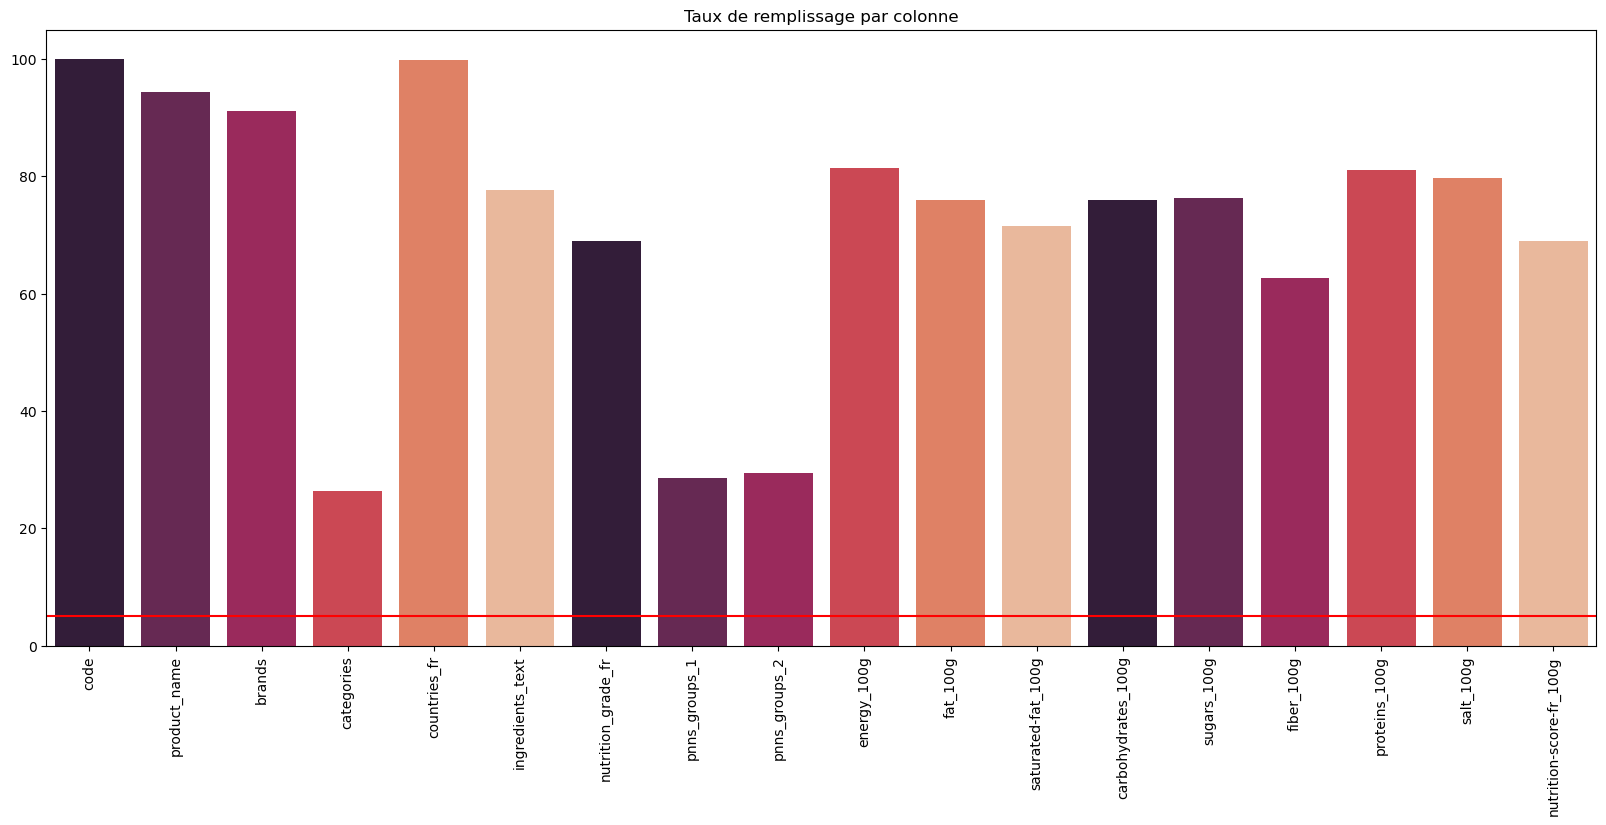

In [18]:
# Utilisation de la fonction
barplot_fill_rate(df_column_selected, 5)

# Selection des produits Français <a class="anchor" id="selection"></a>

[Retour au sommaire](#sommaire)

In [19]:
countries_fr = df_column_selected["countries_fr"]
countries_fr.sample(5)

302208    France,Pays-Bas
218726             France
125427         États-Unis
3236           États-Unis
204929             France
Name: countries_fr, dtype: object

In [20]:
countries_fr = df_column_selected["countries_fr"] == 'France'
df_countries_fr = df_column_selected[countries_fr]
df_countries_fr.sample(5)

code                               product_name  \
229214  3372900031581                            Mousse chocolat   
280477  5449000179661                               Limon & Nada   
233735  3450970049405                    Filet de pomme de terre   
208313  3252920015658  Beurre de baratte biologique, au lait cru   
253838  3760131162042                               Nectar pomme   

                 brands                                         categories  \
229214      Marie Morin                                                NaN   
280477      Minute Maid                                         Citronnade   
233735             eco+              Légumes,Légumes frais,Pommes de terre   
208313  Grandeur nature  Beurres,Matières grasses animales,Matières gra...   
253838   Émile Vergeois                                                NaN   

       countries_fr                                   ingredients_text  \
229214       France  eggs, pure cocoa butter chocolate 42% (soy-lec...   
280477       France  Eau ; jus de citron à base de concentré (13%) ...   
233735       France                             pomme de terre marilyn   
208313       France  Crème de lait, ferments lactiques sélectionnée...   
253838       France                                                NaN   

       nutrition_grade_fr         pnns_groups_1        pnns_groups_2  \
229214                  e               unknown              unknown   
280477                NaN             Beverages  Sweetened beverages   
233735                NaN  Cereals and potatoes             Potatoes   
208313                NaN        Fat and sauces                 Fats   
253838                NaN                   NaN                  NaN   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
229214       1431.0      23.2                14.8                22.7   
280477        192.0       0.0                 0.0                10.8   
233735          NaN       NaN                 NaN                 NaN   
208313          NaN      80.0                 NaN                 NaN   
253838          NaN       NaN                 NaN                 NaN   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  \
229214         19.2         NaN            8.7     0.3400   
280477         10.8         0.0            NaN     0.0254   
233735          NaN         NaN            NaN        NaN   
208313          NaN         NaN            NaN        NaN   
253838          NaN         NaN            NaN        NaN   

        nutrition-score-fr_100g  
229214                     19.0  
280477                      NaN  
233735                      NaN  
208313                      NaN  
253838                      NaN

In [21]:
df_countries_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94392 entries, 0 to 320770
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     94392 non-null  object 
 1   product_name             87398 non-null  object 
 2   brands                   82530 non-null  object 
 3   categories               58752 non-null  object 
 4   countries_fr             94392 non-null  object 
 5   ingredients_text         50492 non-null  object 
 6   nutrition_grade_fr       58501 non-null  object 
 7   pnns_groups_1            61635 non-null  object 
 8   pnns_groups_2            63636 non-null  object 
 9   energy_100g              61434 non-null  float64
 10  fat_100g                 44591 non-null  float64
 11  saturated-fat_100g       59390 non-null  float64
 12  carbohydrates_100g       44179 non-null  float64
 13  sugars_100g              59488 non-null  float64
 14  fiber_100g           

# Création de colonnes suplémentaire <a class="anchor" id="creation"></a>

[Retour au sommaire](#sommaire)

In [22]:
search_df(df_countries_fr, 'ingredients_text', 'café')

code                      product_name  \
226     0000040608754             Pepsi, Nouveau goût !   
112150         018312                   Miel de Caféier   
123471       06731906                    Coca-Cola Zero   
163139  0855461003240       Aeroshot Energy Green Apple   
174918       12375116                          Expresso   
...               ...                               ...   
317947  9002490219574       Red Bull The Silver Edition   
317949  9002490227944                      Energy Drink   
317954  9002490232528   Boisson énergisante regular Red   
318340       90376863  red bull zero calories - redbull   
318621  9214360045163                     Café soluble    

                                       brands  \
226                                     Pepsi   
112150                           Famille Mary   
123471                              Coca-Cola   
163139  Aeroshot,AeroDesigns,AeroDesigns Inc.   
174918                         Les cafés Sati   
...                                       ...   
317947                               Red Bull   
317949                               Red Bull   
317954                               Red Bull   
318340                       red bull,redbull   
318621                              Tradition   

                                               categories countries_fr  \
226                                         Sodas au cola       France   
112150  Petit-déjeuners,Produits à tartiner,Produits à...       France   
123471             en:non-sugared-beverages, en:beverages       France   
163139                               Produits énergisants       France   
174918  Boissons,Boissons chaudes,Cafés,Café en dosett...       France   
...                                                   ...          ...   
317947  Boissons énergisantes,Boissons,Sodas,Boissons ...       France   
317949                              Boissons énergisantes       France   
317954                              Boissons énergisantes       France   
318340           energy drink,boisson énergisante,redbull       France   
318621                                       Café soluble       France   

                                         ingredients_text nutrition_grade_fr  \
226     Eau gazéifiée, sucre, colorant caramel E150d, ...                  e   
112150                             Miel de Caféier (100%)                NaN   
123471  CARBONATfD WATER, CARAMEL COLOUR, CITRATE,AŒSU...                  e   
163139  Caféine, arôme pomme naturel, extrait d'arhat,...                NaN   
174918                        Café arabica torréfié moulu                NaN   
...                                                   ...                ...   
317947  Eau gazéifiée, saccharose, glucose, correcteur...                  e   
317949  Eau gazéifiée, saccharose, glucose, acidifiant...                  e   
317954  Eau gazéifiée, saccharose, glucose, correcteur...                  e   
318340  eau gazéifiée, taurine (0.4%), acidifiant (aci...                  b   
318621                                 100% café soluble.                NaN   

        pnns_groups_1                     pnns_groups_2  energy_100g  \
226         Beverages               Sweetened beverages        177.0   
112150  Sugary snacks                            Sweets          NaN   
123471      Beverages             Non-sugared beverages          0.0   
163139        unknown                           unknown        567.0   
174918      Beverages             Non-sugared beverages          NaN   
...               ...                               ...          ...   
317947      Beverages               Sweetened beverages        192.0   
317949      Beverages               Sweetened beverages        194.0   
317954      Beverages             Non-sugared beverages        192.0   
318340      Beverages  Artificially sweetened beverages          1.8   
318621      Beverages             Non-sugared beverages          NaN   

    

In [23]:
search_df(df_countries_fr, 'ingredients_text', 'gluten')

code                                    product_name  \
509          00023092                      Maple syrup & pecan cookie   
13085        00161589       Wood fired pizza italian cured meats 421g   
25051   0029981004067               Pandoro - Italian Speciality Cake   
35814   0039047002128                      Walkers Fine Oatcakes 280G   
54697   0042272008605     4 Steaks aux légumes, au quinoa et aux noix   
...               ...                                             ...   
316425  8801128542661                        110G XL Cup Boeuf M. min   
316859  8850643002617  Assaisonnement pour soupe de canard instantané   
318124  9004617062902                         Bio-Kokos-Marille Müsli   
318592  9175681028111         galettes quinoa & boulghour à la tomate   
320113  9335805000384          Bounce Coconut & Macadamia Energy Ball   

                       brands  \
509           Marks & Spencer   
13085                     M&S   
25051   Pasticciera Dei Fiori   
35814                 Walkers   
54697           Amy's Kitchen   
...                       ...   
316425                Mr. Min   
316859               Por Kwan   
318124                Verival   
318592             Céréal Bio   
320113                 Bounce   

                                               categories countries_fr  \
509                                                   NaN       France   
13085                                                 NaN       France   
25051                        Gâteaux,patisserie au levain       France   
35814                                                 NaN       France   
54697   Surgelés,Plats préparés,Plats cuisinés surgelé...       France   
...                                                   ...          ...   
316425                                                NaN       France   
316859                             Sauces,Assaisonnements       France   
318124  Aliments et boissons à base de végétaux,Alimen...       France   
318592  Plant-based foods and beverages,Plant-based fo...       France   
320113                                                NaN       France   

                                         ingredients_text nutrition_grade_fr  \
509     }ookles syrup INGREDIENTS Wheatflour contains ...                  d   
13085   pâte à pizza recouverte de sauce tomate, de fr...                  d   
25051   PATISSERIE AU LEVAIN NATUREL.   INGREDIENTS: F...                  d   
35814   Farine d'avoine (87%), huile de colza, lait éc...                  b   
54697   Légumes 33% (oignons, céleri, carottes, purée ...                  c   
...                                                   ...                ...   
316425  Nouilles: Farine de blé (céréales contenant du...                  d   
316859  Ail, eau, sel, sucre, sauce de soja (haricot d...                NaN   
318124  Glutenfreie Haferflocken, Glutenfreies Crunchy...                  d   
318592  Boulgour de blé complet précuit 45,5%, quinoa ...                  b   
320113  Blue Agave Syrup, Inulin (Dietary Fibre), Cash...                  c   

               pnns_groups_1         pnns_groups_2  energy_100g  fat_100g  \
509                  unknown               unknown       2033.0      26.8   
13085                unknown               unknown       1146.0      13.1   
25051          Sugary snacks    Biscuits and cakes       1618.0      17.5   
35814                unknown               unknown       1866.0      16.4   
54697        Composite foods        One-dish meals        510.0       4.2   
...                      ...                   ...          ...       ...   
316425               unknown               unknown       1810.0      17.3   
316859        Fat and sauces  Dressings and sauces          NaN       NaN   
318124  Cereals and potatoes     Breakfast cereals       1678.0      13.0   
318592  Cereals and potatoes               Cereals       1007.0      11.0   
320113               unknown               unk

In [24]:
df_cafeine = search_df(df_countries_fr, 'ingredients_text', 'café')

In [25]:
df_gluten = search_df(df_countries_fr, 'ingredients_text', 'gluten')

In [26]:
# Création d'une copie du DataFrame df_countries_fr
df_final = df_countries_fr.copy(deep=True)

In [27]:
# Supposons que vous ayez déjà créé les DataFrames df_cafeine et df_gluten

# Créez des séries booléennes pour la présence de caféine et de gluten
df_final['cafeine'] = df_final['code'].isin(df_cafeine['code']).astype(int)
df_final['gluten'] = df_final['code'].isin(df_gluten['code']).astype(int)

df_final.head(20)

code                           product_name            brands  \
0    0000000003087                     Farine de blé noir   Ferme t'y R'nao   
46   0000000024600                          Filet de bœuf               NaN   
48   0000000027205                                    NaN               NaN   
136  0000000039259                                Twix x2               NaN   
182  0000005200016                      lentilles vertes   Bertrand Lejeune   
183  0000007020254                                    NaN               A&W   
184  0000007730009      Biscuits sablés fourrage au cacao         St Michel   
187  0000009336247                                    NaN               NaN   
188  0000010090206  Thé de Noël aromatisé orange-cannelle      Alice Délice   
189  0000010127735           Sirops pour ganache macarons      Alice Délice   
190  0000010187319                         Mini Confettis      Alice Délice   
191  0000010207260             Praliné Amande Et Noisette      Alice Délice   
194  0000020004552                  Côte du Rhône village               NaN   
224  0000030053014                           Bonbon Vichy               NaN   
225  0000040144078                    M&m's peanut butter            M&m's    
226  0000040608754                  Pepsi, Nouveau goût !             Pepsi   
227  0000050157846                                    NaN               NaN   
232  0000069016165                    BoFrost Nudelpfanne               NaN   
234  0000069161025              Tarte Poireaux Et Lardons          Bo Frost   
240  0000087177756                                    7Up       7Up,Pepsico   

                                            categories countries_fr  \
0                                                  NaN       France   
46                                       Filet de bœuf       France   
48                                                 NaN       France   
136                                                NaN       France   
182  Aliments et boissons à base de végétaux,Alimen...       France   
183                                          Root bier       France   
184  Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés       France   
187                                            Bonbons       France   
188  Aliments et boissons à base de végétaux,Boisso...       France   
189                         Sirops,Sirops pour ganache       France   
190                                                NaN       France   
191                                                NaN       France   
194                                                NaN       France   
224                                                NaN       France   
225                                                NaN       France   
226                                      Sodas au cola       France   
227                                                NaN       France   
232                                                NaN       France   
234                                                NaN       France   
240                   Sodas au citron,Boissons sucrées       France   

                                      ingredients_text nutrition_grade_fr  \
0                                                  NaN                NaN   
46                                                 NaN                NaN   
48                                                 NaN                NaN   
136                                                NaN                NaN   
182                                   lentilles vertes                NaN   
183                                                NaN                NaN   
184  Sucre, farine de _Blé_, graisse et huiles végé...                NaN   
187                                                NaN                NaN   
188  Thé noir de Chine, zestes d'oranges 7,5 %, arô...                NaN   
189  Sirop saveur pistache 5 cl : sirop 99,16 % (su...                NaN   
190            

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94392 entries, 0 to 320770
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     94392 non-null  object 
 1   product_name             87398 non-null  object 
 2   brands                   82530 non-null  object 
 3   categories               58752 non-null  object 
 4   countries_fr             94392 non-null  object 
 5   ingredients_text         50492 non-null  object 
 6   nutrition_grade_fr       58501 non-null  object 
 7   pnns_groups_1            61635 non-null  object 
 8   pnns_groups_2            63636 non-null  object 
 9   energy_100g              61434 non-null  float64
 10  fat_100g                 44591 non-null  float64
 11  saturated-fat_100g       59390 non-null  float64
 12  carbohydrates_100g       44179 non-null  float64
 13  sugars_100g              59488 non-null  float64
 14  fiber_100g           

In [29]:
# Compter le nombre de 1 dans la colonne "cafeine"
count_cafeine = df_final['cafeine'].sum()

# Compter le nombre de 1 dans la colonne "gluten"
count_gluten = df_final['gluten'].sum()

print(f"Nombre de produits contenant de la caféine : {count_cafeine}")
print(f"Nombre de produits contenant du gluten : {count_gluten}")

Nombre de produits contenant de la caféine : 880
Nombre de produits contenant du gluten : 3452


In [30]:
print(df_cafeine.shape[0])
print(df_gluten.shape[0])

880
3452


# Nettoyage des données nutritionnelles<a class="anchor" id="nettoyage"></a>

[Retour au sommaire](#sommaire)

Dans le cadre de notre analyse des données nutritionnelles, nous devons prendre en compte certaines contraintes liées aux valeurs nutritionnelles par portion. Les valeurs nutritionnelles fournies sont généralement pour 100 grammes de produit, et nous devons nous assurer que ces valeurs respectent les normes alimentaires. Pour ce faire, nous effectuerons un nettoyage des données en supprimant les valeurs qui ne sont pas conformes.

1) Glucides, Sucre, Fibres, Protéines et Sel :

* Les valeurs nutritionnelles pour les glucides, le sucre, les fibres, les protéines et le sel ne peuvent pas dépasser 100 grammes, car cela dépasserait la quantité totale du produit. Par conséquent, nous supprimerons les lignes de données qui ont des valeurs supérieures à 100 grammes dans ces catégories.
* De plus, des valeurs négatives n'ont pas de sens dans ce contexte, donc nous éliminerons également les lignes avec des valeurs négatives.

2) Énergie en kcal :

* Les aliments les plus caloriques peuvent contenir jusqu'à 900 calories par portion. Nous allons donc supprimer les lignes de données avec des valeurs supérieures à 900 calories, car cela dépasserait les limites alimentaires recommandées.
* De même, les valeurs d'énergie négatives n'ont pas de sens, et nous supprimerons donc les lignes avec des valeurs négatives.

Ce processus de nettoyage des données nous permettra de nous assurer que les valeurs nutritionnelles sont cohérentes et respectent les normes alimentaires pour une analyse plus précise.

*Source : [sante-sur-le-net](https://www.sante-sur-le-net.com/nutrition-bien-etre/nutrition/tableau-des-calories/) 

## Identification et Traitement des Valeurs Aberrantes <a class="anchor" id="traitement"></a>

[Retour au sommaire](#sommaire)

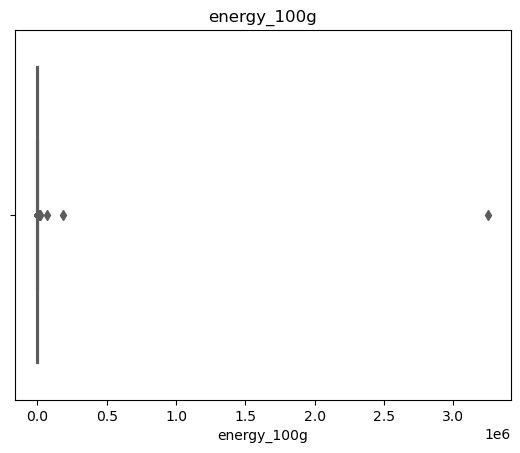

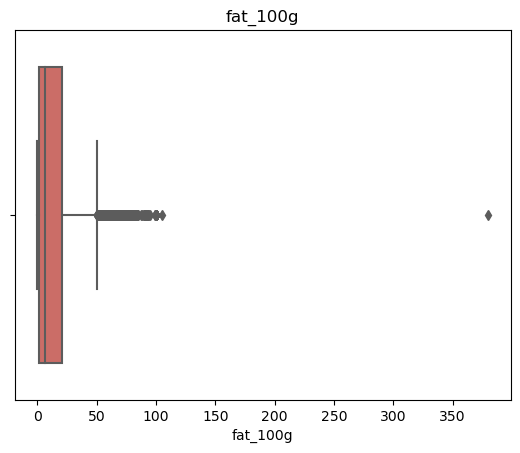

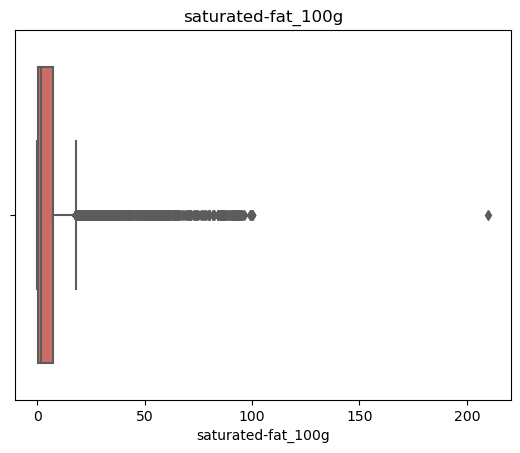

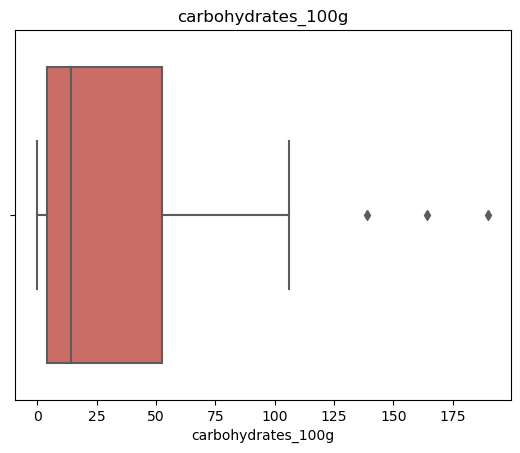

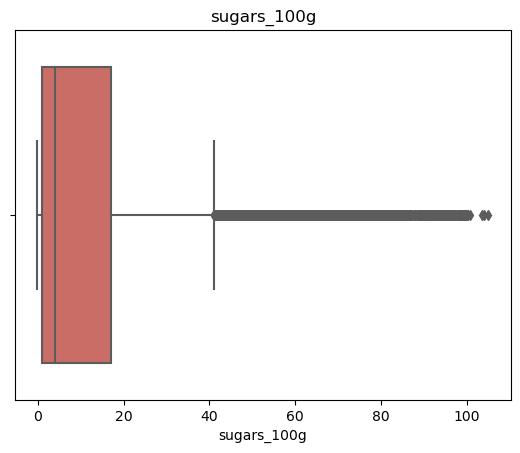

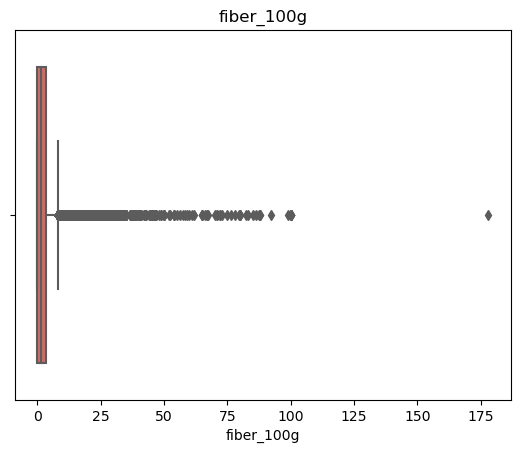

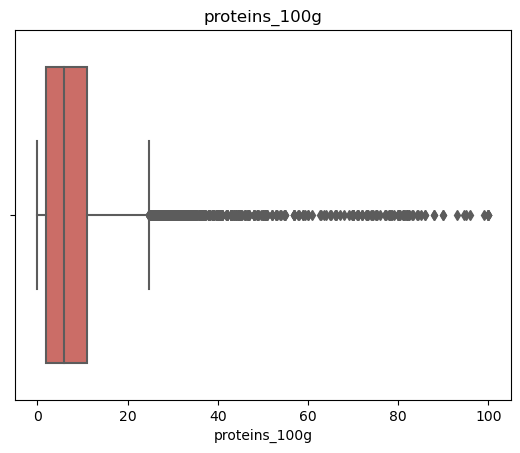

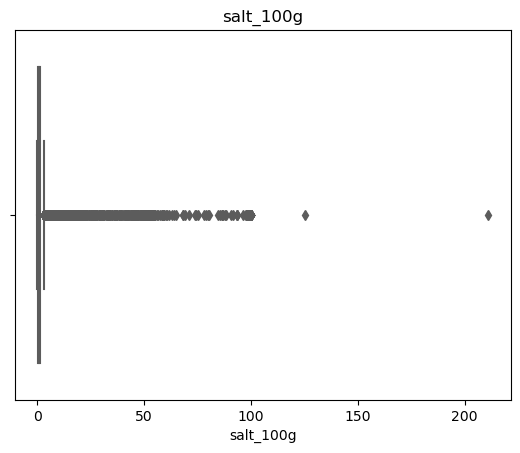

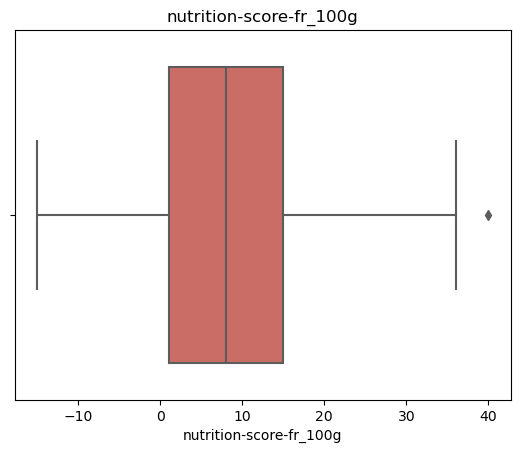

In [31]:
sns_boxplot_quantitative(df_final)

### 1) Supression des valeurs abbérantes Glucides, Sucre, Fibres, Protéines et Sel :

In [32]:
columns_gr = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', "fiber_100g", "proteins_100g", "salt_100g"]

for col in columns_gr : 
    value_deleted = df_final.loc[(df_final[col] < 0) | (df_final[col] > 100)].index.to_list()
    df_final.drop(index=value_deleted, inplace=True)

### 2)  Supression des valeurs abbérantes Énergie en kcal :

In [33]:
columns_kcal = ["energy_100g"]
# Conversion des valeurs en kilojoules si elles dépassent 900 kcal
df_final.loc[df_final['energy_100g'] > 900, 'energy_100g'] *= 4.184

# Suppression des valeurs en dehors de la plage acceptable
columns_kcal = ["energy_100g"]

for col in columns_kcal : 
    value_deleted = df_final.loc[(df_final[col] < 0) | (df_final[col] > 900)].index.to_list()
    df_final.drop(index=value_deleted, inplace=True)

In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60909 entries, 0 to 320770
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     60909 non-null  object 
 1   product_name             54077 non-null  object 
 2   brands                   49214 non-null  object 
 3   categories               35010 non-null  object 
 4   countries_fr             60909 non-null  object 
 5   ingredients_text         28548 non-null  object 
 6   nutrition_grade_fr       26493 non-null  object 
 7   pnns_groups_1            36308 non-null  object 
 8   pnns_groups_2            38288 non-null  object 
 9   energy_100g              27951 non-null  float64
 10  fat_100g                 20980 non-null  float64
 11  saturated-fat_100g       26863 non-null  float64
 12  carbohydrates_100g       20663 non-null  float64
 13  sugars_100g              27038 non-null  float64
 14  fiber_100g           

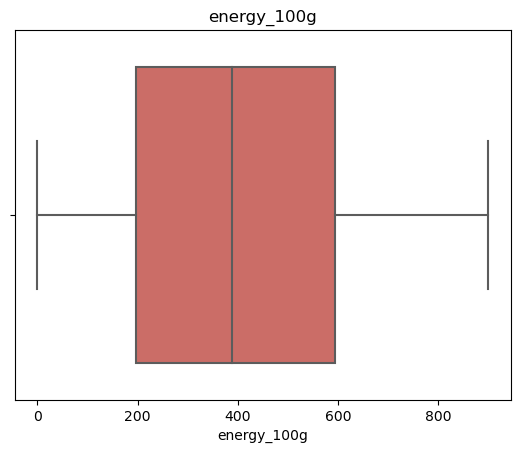

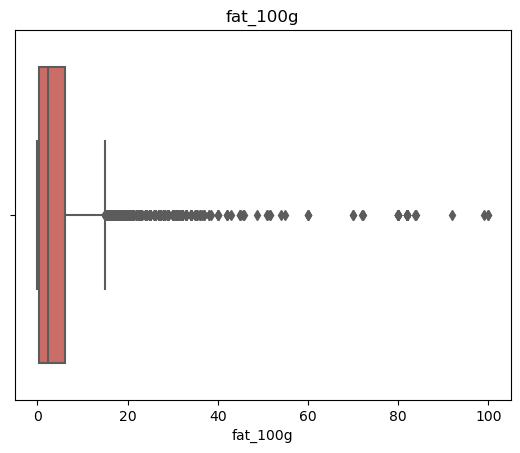

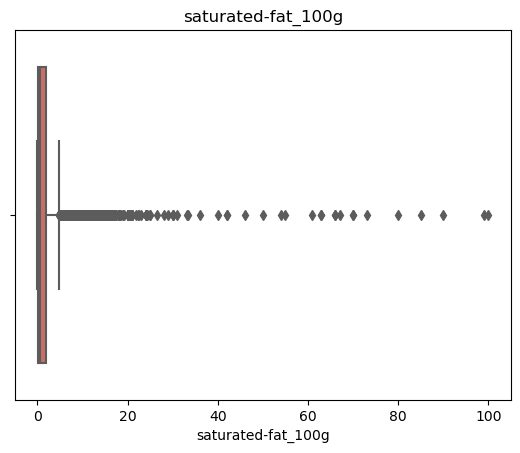

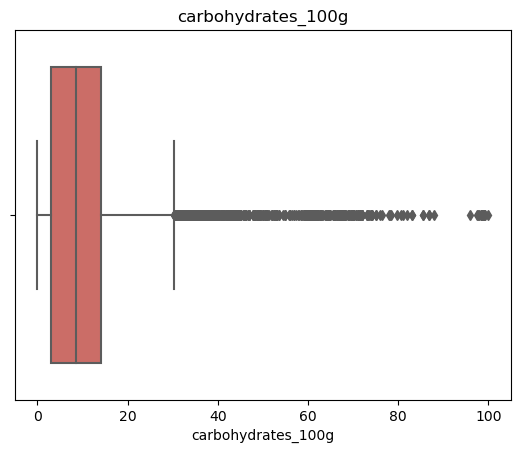

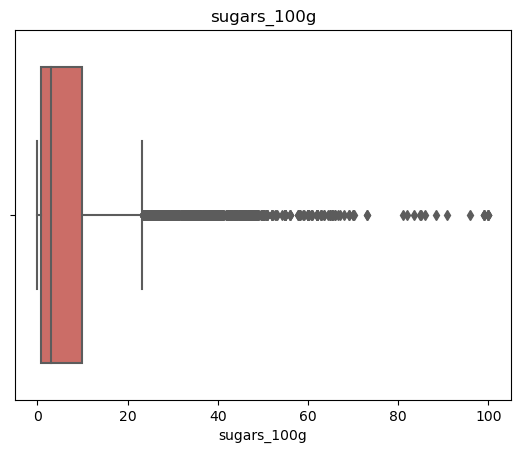

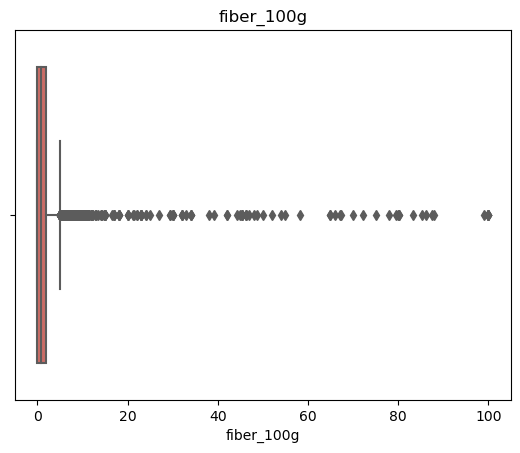

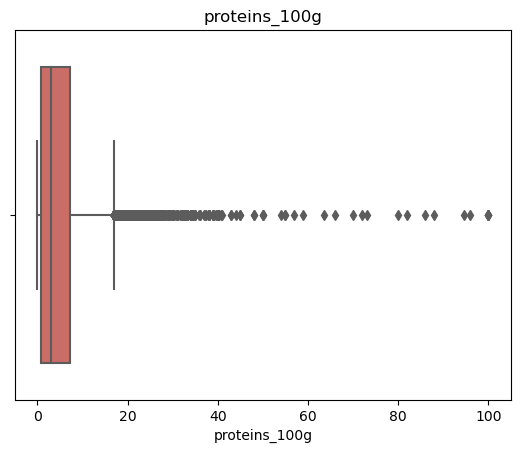

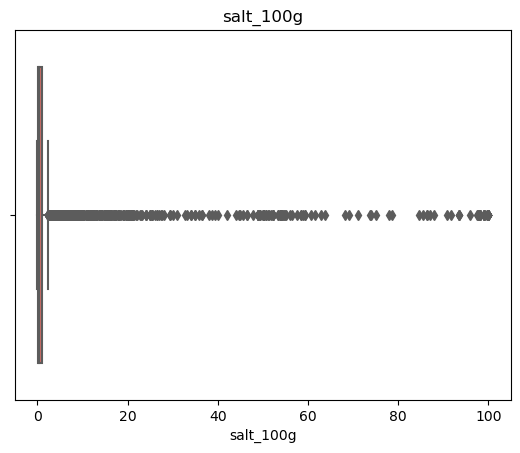

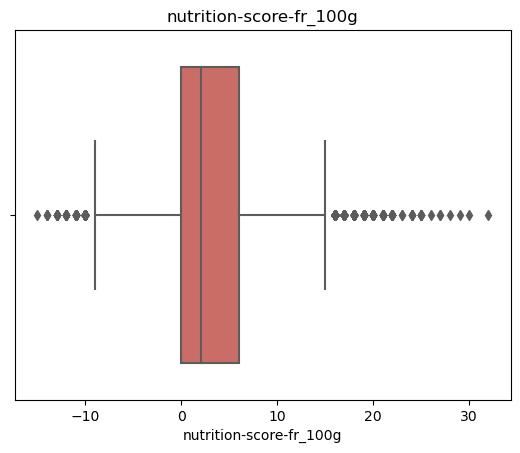

In [35]:
sns_boxplot_quantitative(df_final)

## Identification et Traitement des Valeurs manquantes<a class="anchor" id="miss_values"></a>

[Retour au sommaire](#sommaire) 

Affichage en % des valeurs manquantes par colonnes


0  Nb Valeurs Manquantes
code                      0.00                      0
cafeine                   0.00                      0
countries_fr              0.00                      0
gluten                    0.00                      0
product_name             11.22                   6832
brands                   19.20                  11695
pnns_groups_2            37.14                  22621
pnns_groups_1            40.39                  24601
categories               42.52                  25899
ingredients_text         53.13                  32361
energy_100g              54.11                  32958
proteins_100g            54.28                  33064
salt_100g                55.55                  33834
sugars_100g              55.61                  33871
saturated-fat_100g       55.90                  34046
nutrition_grade_fr       56.50                  34416
nutrition-score-fr_100g  56.50                  34416
fat_100g                 65.56                  39929
carbohydrates_100g       66.08                  40246
fiber_100g               67.28                  40982

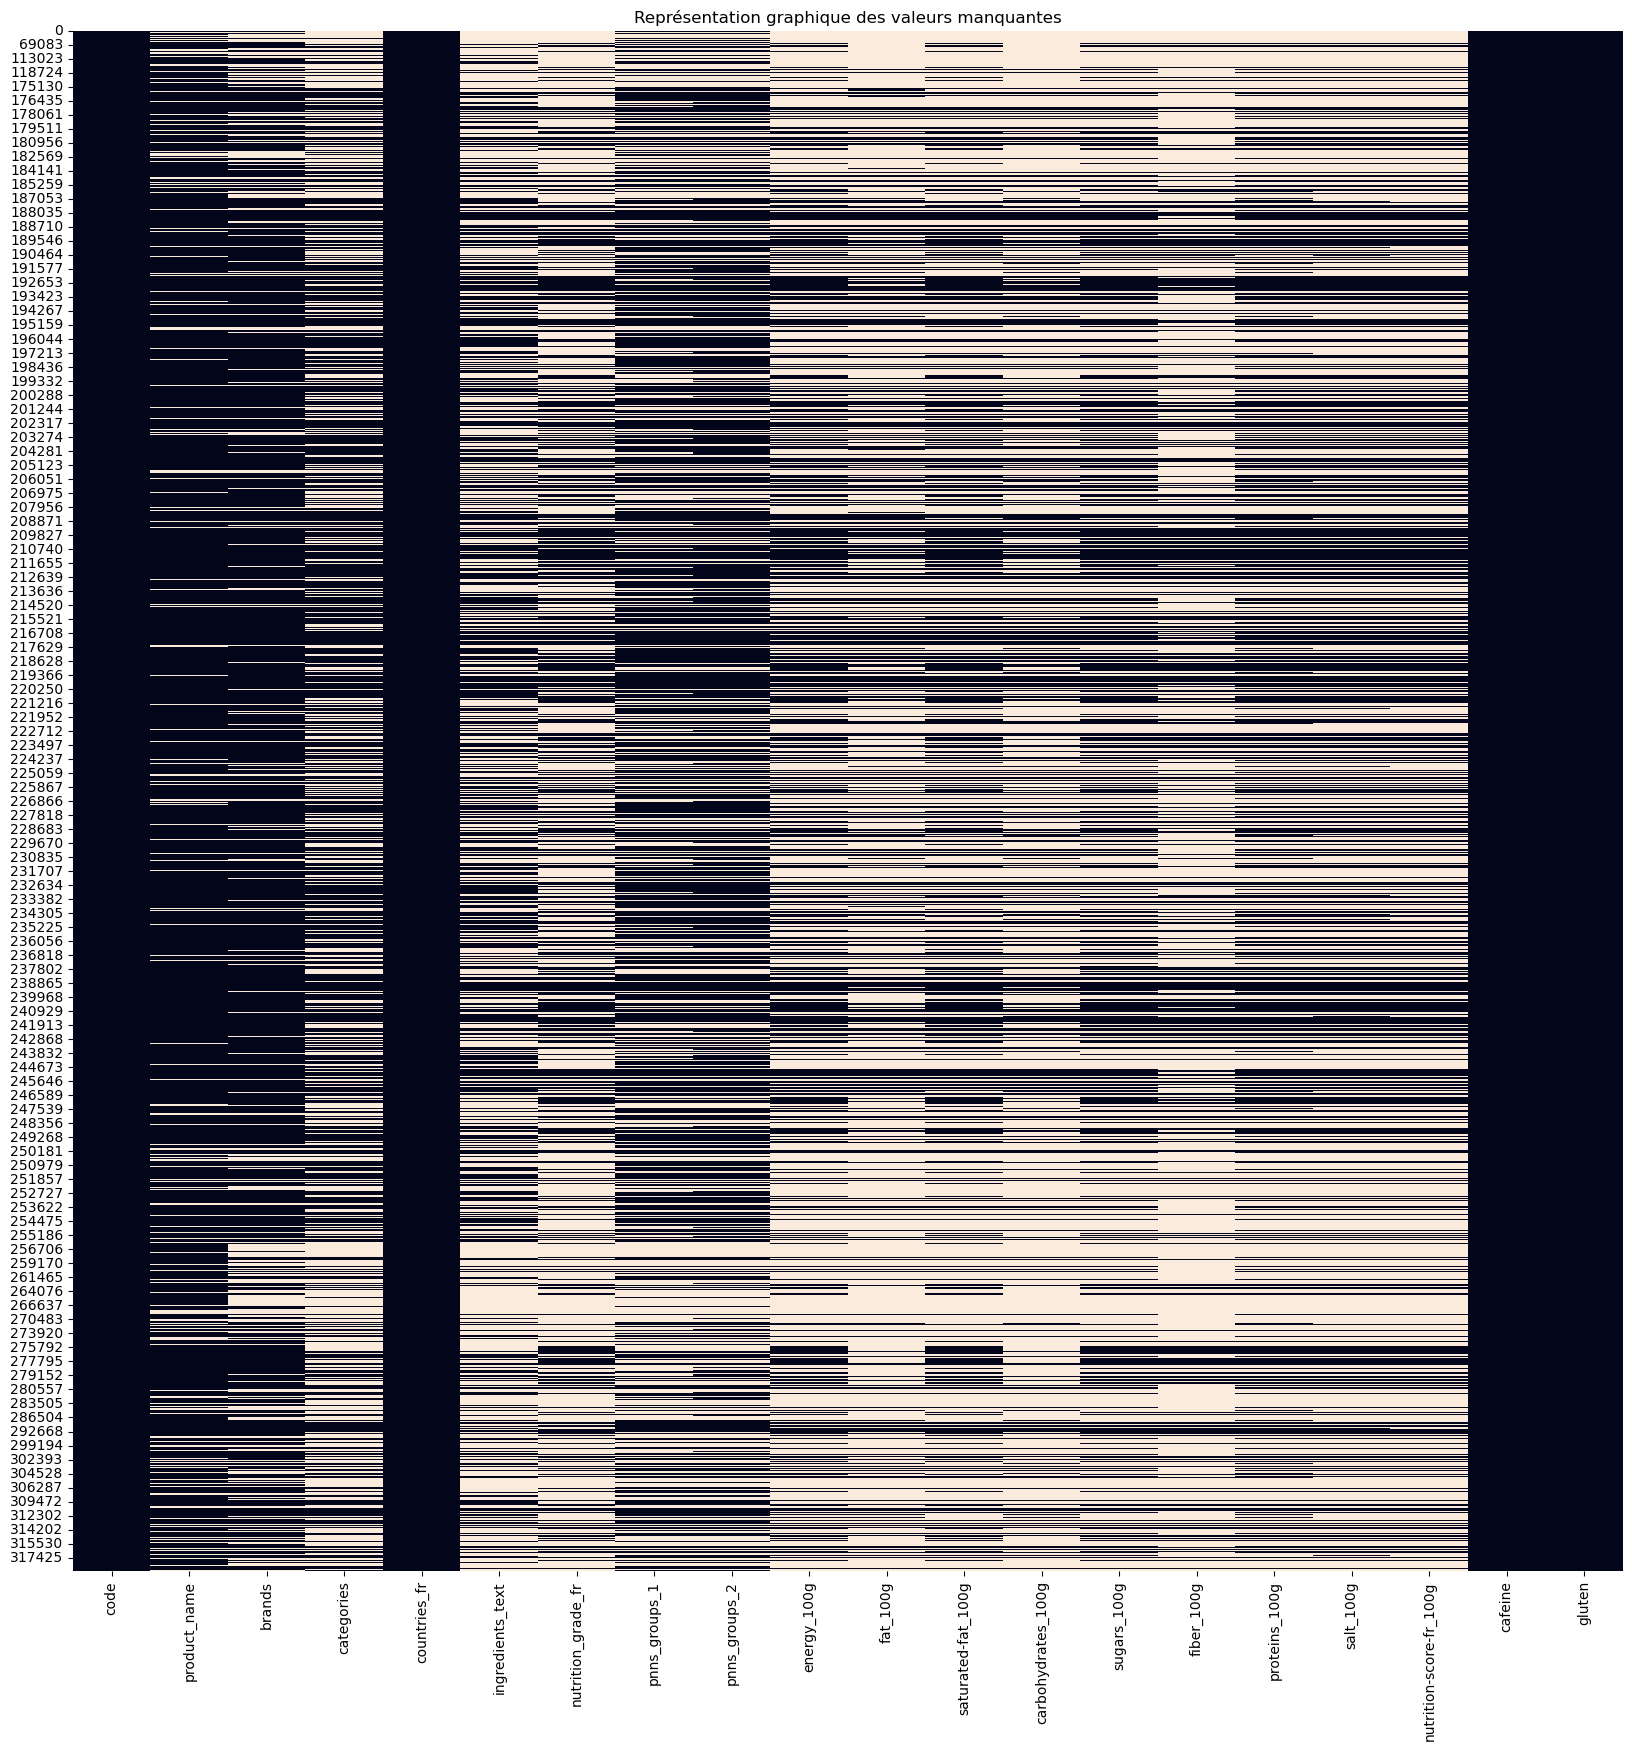

In [36]:
my_valeurs_manquantes(df_final)

In [37]:
df_final_clean = df_final.dropna(subset=['ingredients_text'])
df_final_clean.shape[0]
df_final_clean.sample(3)

code                              product_name        brands  \
298252  7622210121967  7 chewing-gums parfum cocktail de fruits     Hollywood   
216954  3263859581619                           Jambon de Dinde  Leader Price   
190587  3041090012143               Mon 1er Petit Pot Artichaut       Blédina   

                                               categories countries_fr  \
298252              Snacks sucrés,Confiseries,Chewing-gum       France   
216954  Jambons de Dinde,Viandes de dinde,Viandes,Jamb...       France   
190587        Dès 4 mois,Dès 6 mois,Petits pots pour bébé       France   

                                         ingredients_text nutrition_grade_fr  \
298252  Edulcorants (Sorbitol, Xylitol, Maltitol, Siro...                  c   
216954  Viande de haut de cuisse de dinde 92 %, eau, s...                  c   
190587  Artichauts 38,0% - Eau de cuisson - Pommes de ...                  a   

         pnns_groups_1 pnns_groups_2  energy_100g  fat_100g  \
298252   Sugary snacks        Sweets        730.0       3.1   
216954  Fish Meat Eggs          Meat        488.0       3.9   
190587         unknown       unknown        133.0       0.1   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
298252                2.60                58.1          0.0         NaN   
216954                1.10                 0.5          0.5         NaN   
190587                0.02                 5.5          0.8         2.1   

        proteins_100g  salt_100g  nutrition-score-fr_100g  cafeine  gluten  
298252            0.5       0.02                      4.0        0       0  
216954           19.7       1.60                      3.0        0       0  
190587            1.1       0.05                     -2.0        0       0

In [38]:
df_final_clean.describe()

energy_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  19248.000000  19196.000000        18246.000000        18913.000000   
mean     408.599369      4.258838            1.384817           10.259252   
std      239.105933      6.035793            2.194056           10.437229   
min        0.000000      0.000000            0.000000            0.000000   
25%      199.000000      0.300000            0.100000            3.000000   
50%      390.000000      2.400000            0.600000            8.400000   
75%      591.000000      6.200000            2.000000           13.870000   
max      900.000000    100.000000           66.000000          100.000000   

        sugars_100g    fiber_100g  proteins_100g     salt_100g  \
count  18402.000000  11971.000000   19161.000000  18431.000000   
mean       5.865270      1.576106       5.802836      1.126037   
std        7.916014      3.061950       6.980000      5.031967   
min        0.000000      0.000000       0.000000      0.000000   
25%        0.800000      0.200000       0.800000      0.070000   
50%        2.800000      1.000000       3.200000      0.530000   
75%        9.500000      2.100000       7.500000      1.016000   
max      100.000000    100.000000      86.000000    100.000000   

       nutrition-score-fr_100g       cafeine        gluten  
count             17917.000000  28548.000000  28548.000000  
mean                  2.864486      0.024170      0.040178  
std                   5.829769      0.153579      0.196380  
min                 -15.000000      0.000000      0.000000  
25%                  -1.000000      0.000000      0.000000  
50%                   2.000000      0.000000      0.000000  
75%                   6.000000      0.000000      0.000000  
max                  26.000000      1.000000      1.000000

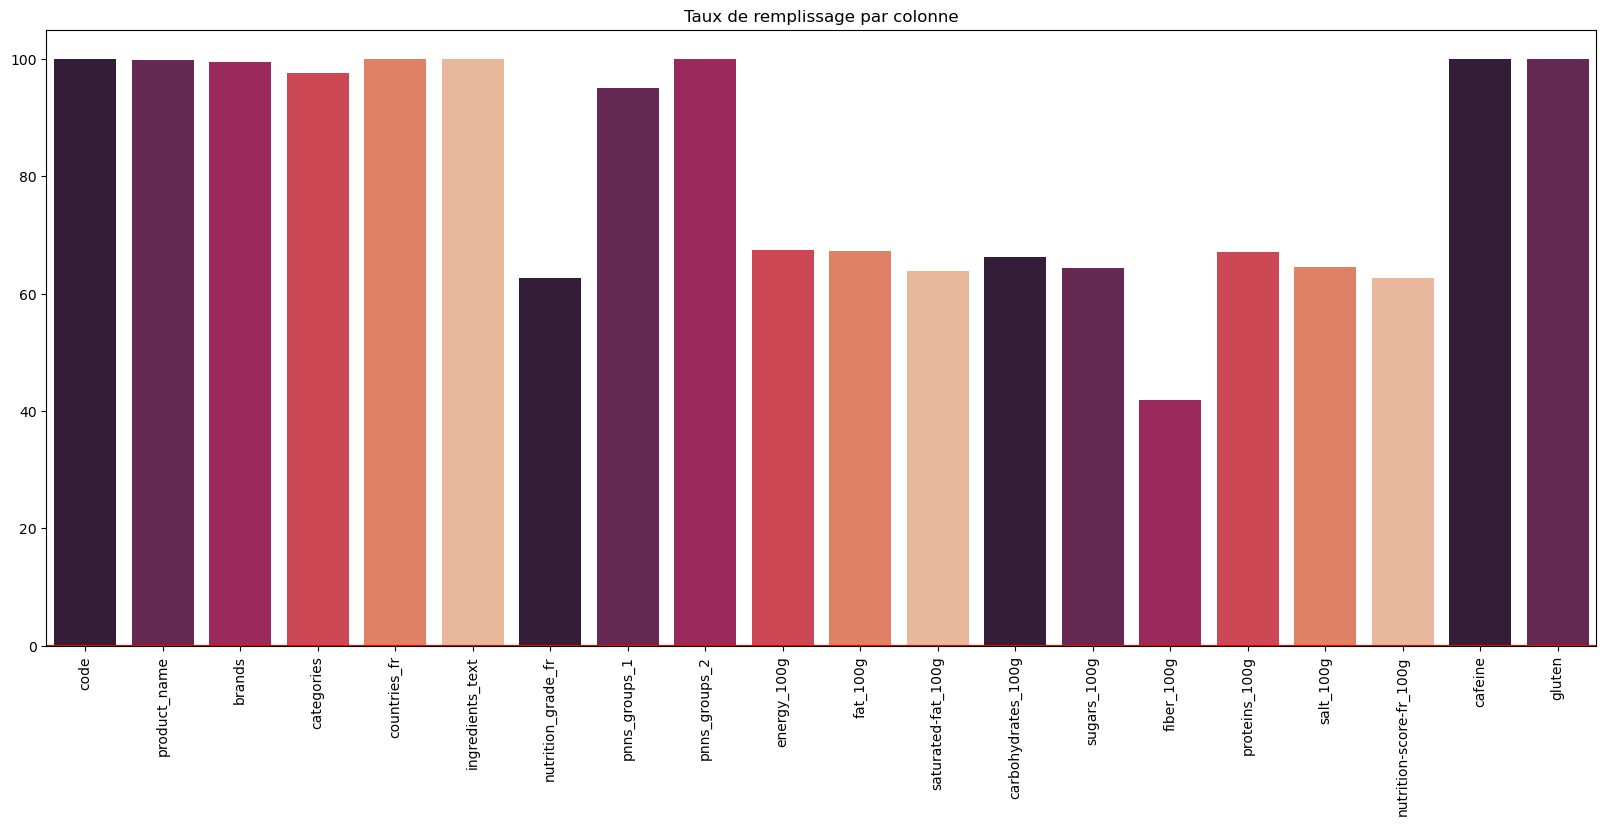

In [39]:
barplot_fill_rate(df_final_clean, 0)

In [40]:
columns_qualitative = ["product_name","nutrition_grade_fr","brands","pnns_groups_1", "pnns_groups_2", "categories"]
for col in columns_qualitative:
    df_final_clean = df_final_clean.drop(df_final_clean[df_final_clean[col].isnull()].index)
df_final_clean.reset_index(drop=True, inplace=True)

Affichage en % des valeurs manquantes par colonnes


0  Nb Valeurs Manquantes
code                      0.00                      0
nutrition-score-fr_100g   0.00                      0
cafeine                   0.00                      0
pnns_groups_2             0.00                      0
pnns_groups_1             0.00                      0
nutrition_grade_fr        0.00                      0
gluten                    0.00                      0
countries_fr              0.00                      0
categories                0.00                      0
brands                    0.00                      0
product_name              0.00                      0
ingredients_text          0.00                      0
saturated-fat_100g        0.30                     52
sugars_100g               0.30                     52
proteins_100g             0.30                     52
salt_100g                 0.30                     52
energy_100g               0.30                     52
carbohydrates_100g        1.82                    315
fat_100g                  1.96                    339
fiber_100g               35.33                   6118

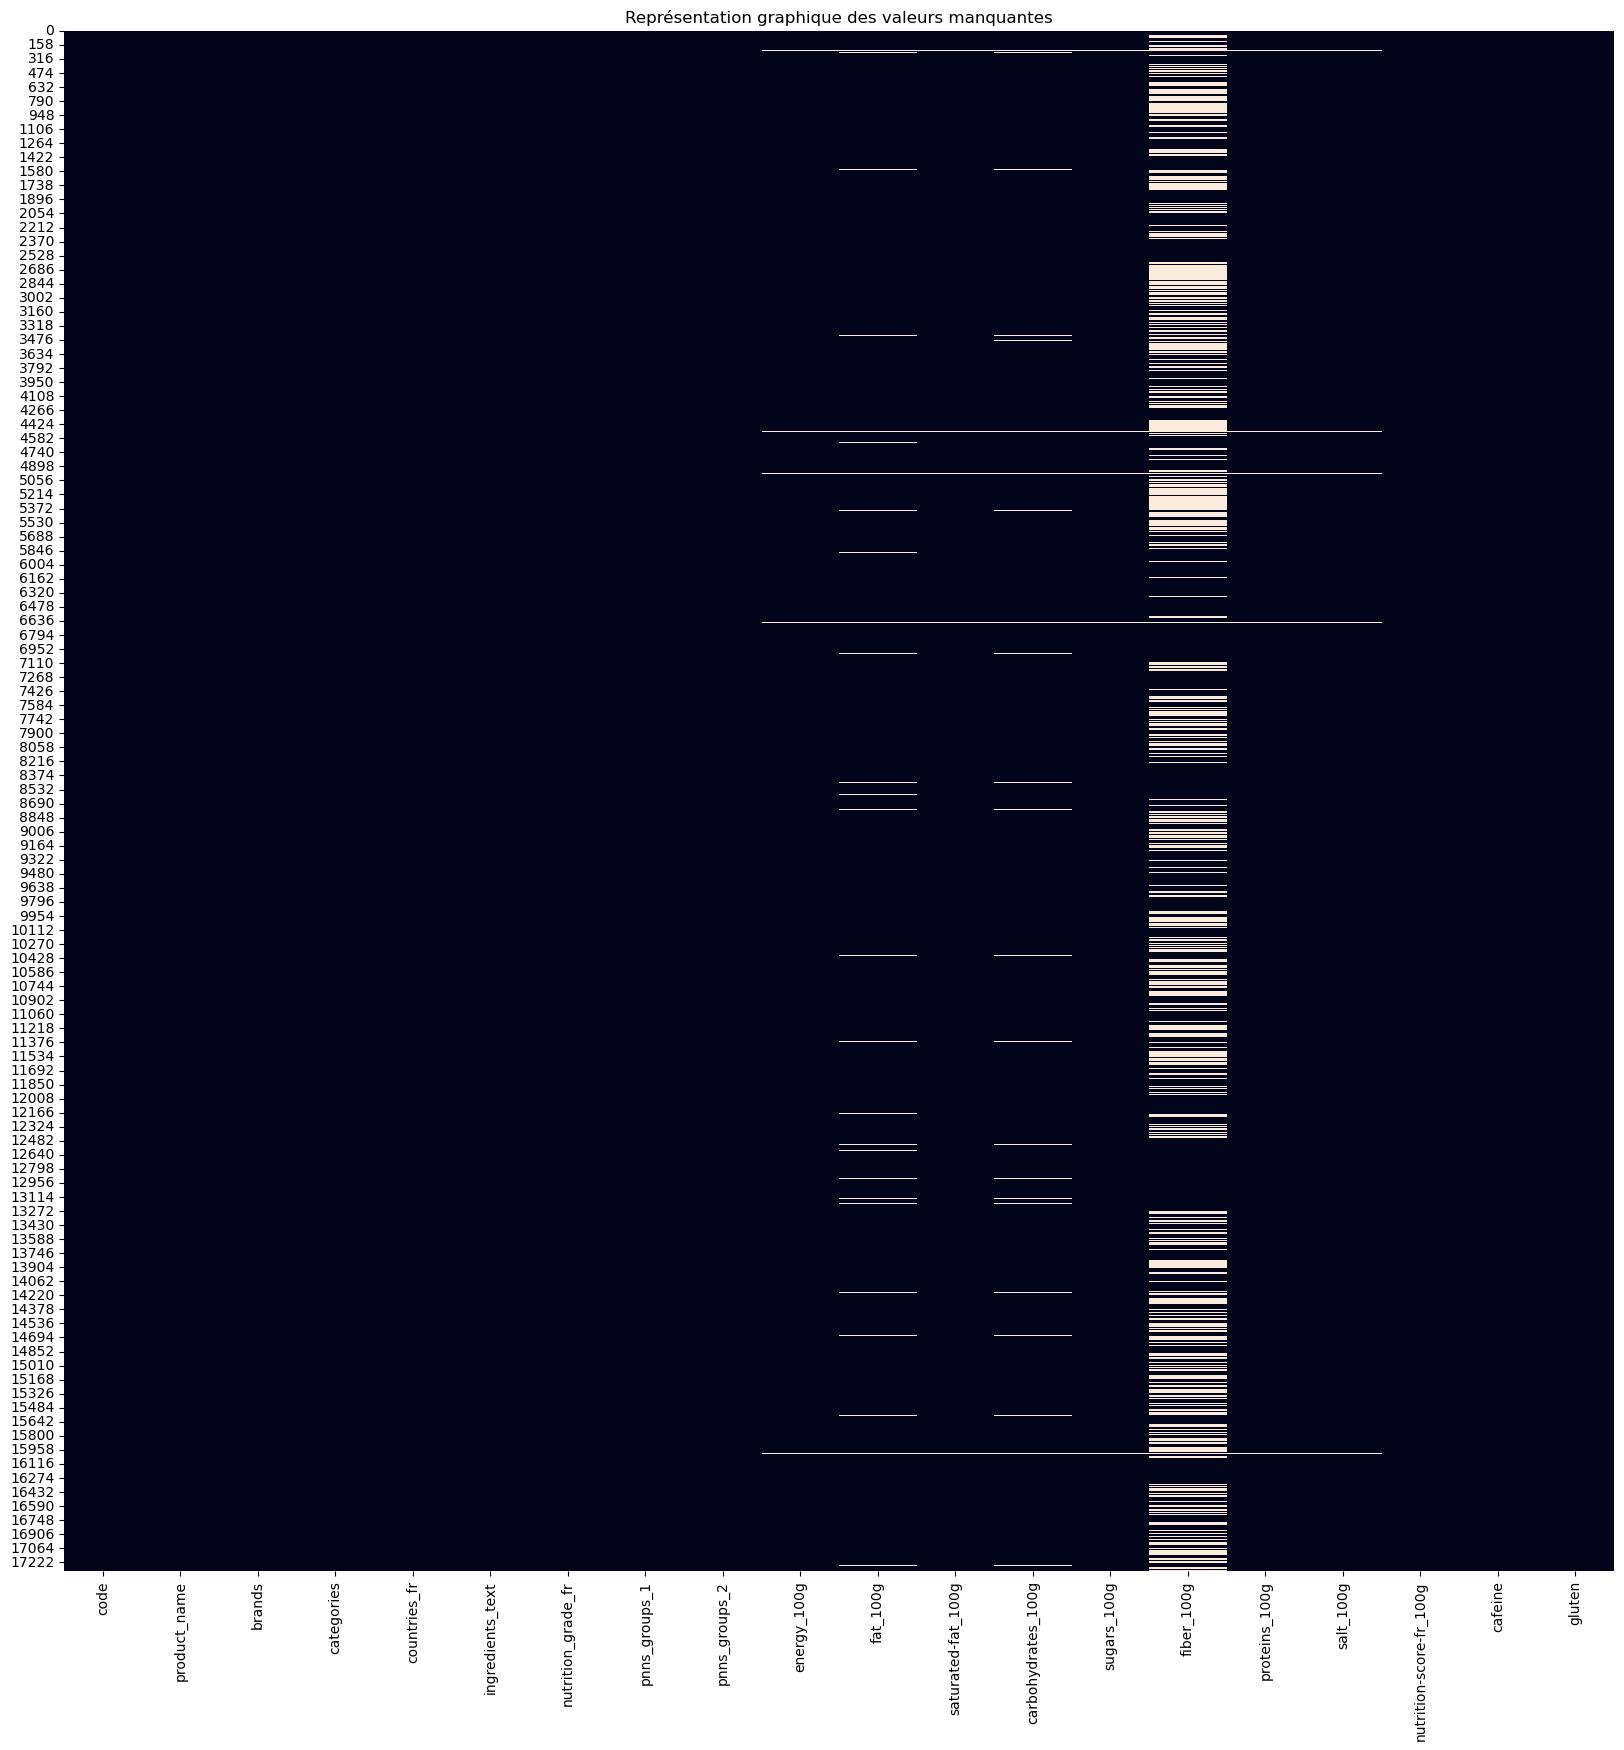

In [41]:
my_valeurs_manquantes(df_final_clean)

In [42]:
df_final_clean.shape[0]

17318

In [43]:
doublons(df_final_clean)

0 doublons


In [44]:
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17318 entries, 0 to 17317
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     17318 non-null  object 
 1   product_name             17318 non-null  object 
 2   brands                   17318 non-null  object 
 3   categories               17318 non-null  object 
 4   countries_fr             17318 non-null  object 
 5   ingredients_text         17318 non-null  object 
 6   nutrition_grade_fr       17318 non-null  object 
 7   pnns_groups_1            17318 non-null  object 
 8   pnns_groups_2            17318 non-null  object 
 9   energy_100g              17266 non-null  float64
 10  fat_100g                 16979 non-null  float64
 11  saturated-fat_100g       17266 non-null  float64
 12  carbohydrates_100g       17003 non-null  float64
 13  sugars_100g              17266 non-null  float64
 14  fiber_100g            

### Imputation des Données Manquantes dans l'Analyse Nutritionnelle <a class="anchor" id="imputation"></a>

[Retour au sommaire](#sommaire) 

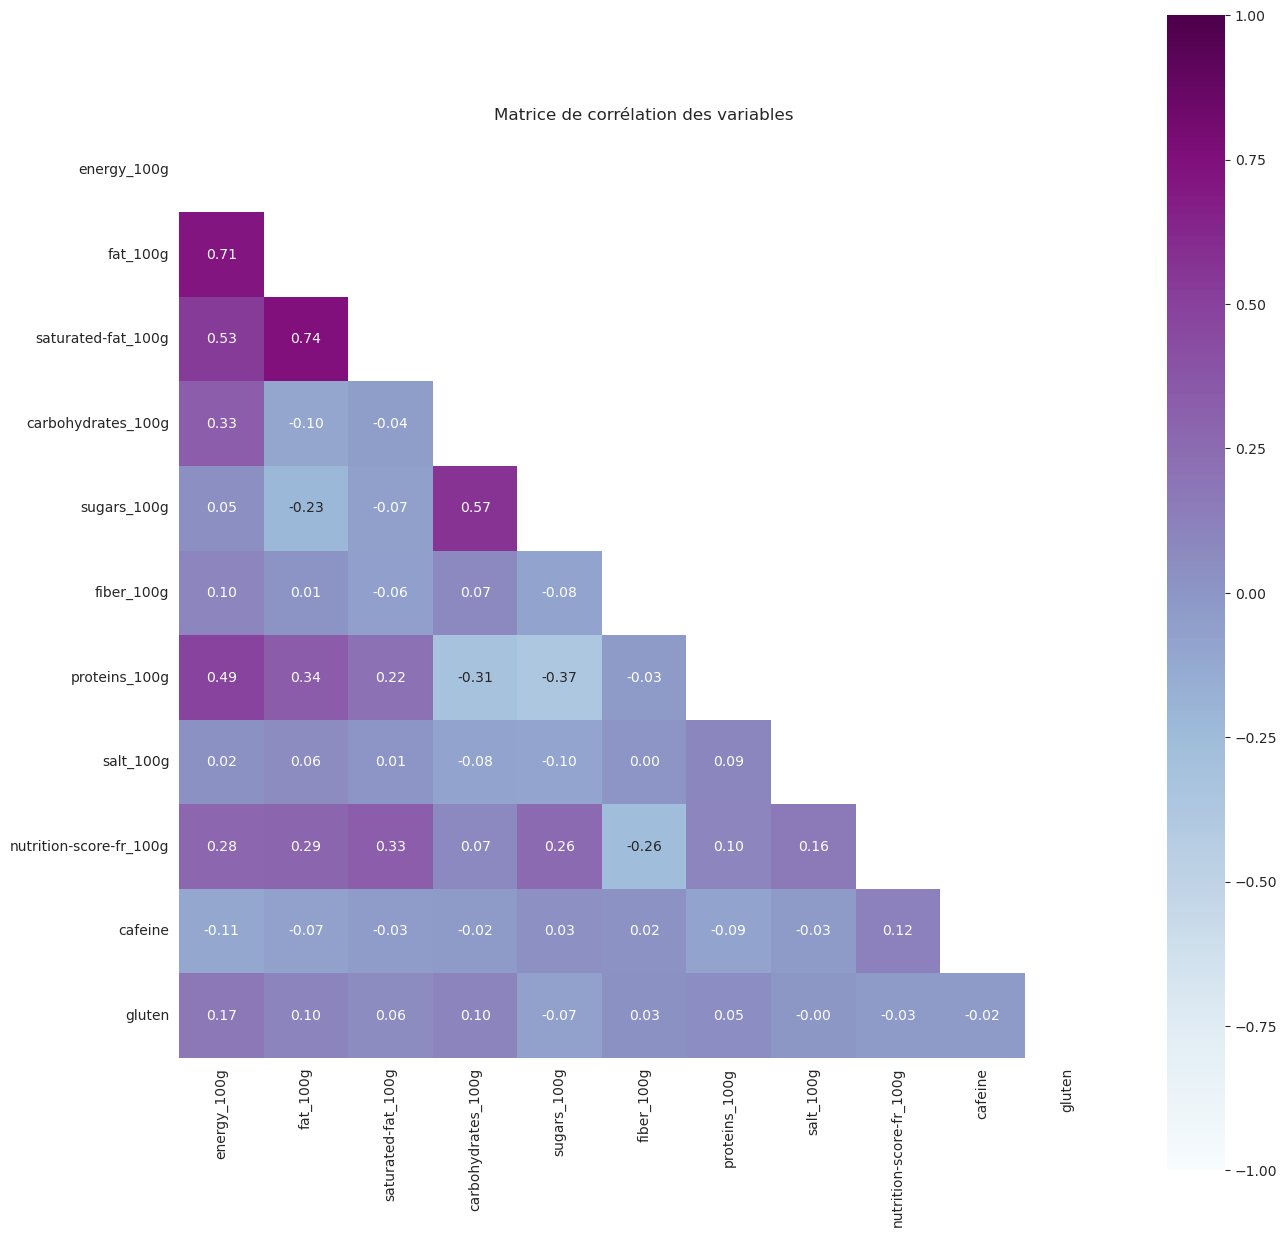

In [45]:
correlation_matrix(df_final_clean, "Matrice de corrélation des variables", (15,15))

In [46]:
df_final_clean.isna().sum()

code                          0
product_name                  0
brands                        0
categories                    0
countries_fr                  0
ingredients_text              0
nutrition_grade_fr            0
pnns_groups_1                 0
pnns_groups_2                 0
energy_100g                  52
fat_100g                    339
saturated-fat_100g           52
carbohydrates_100g          315
sugars_100g                  52
fiber_100g                 6118
proteins_100g                52
salt_100g                    52
nutrition-score-fr_100g       0
cafeine                       0
gluten                        0
dtype: int64

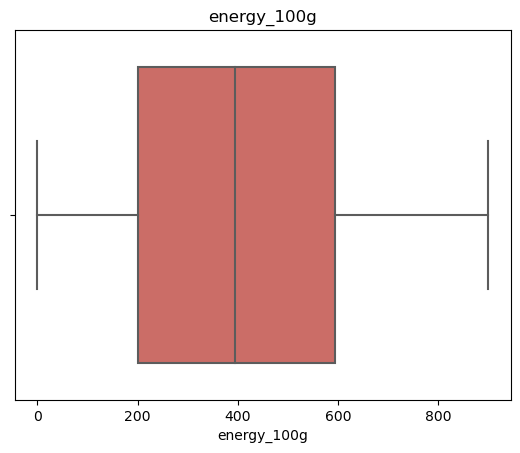

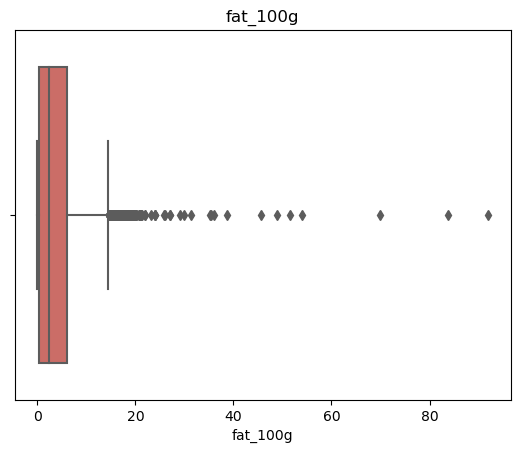

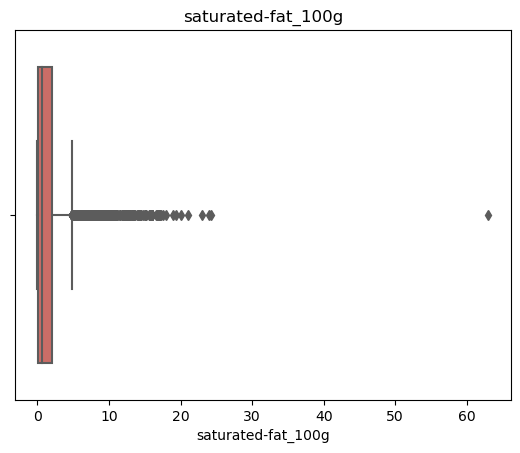

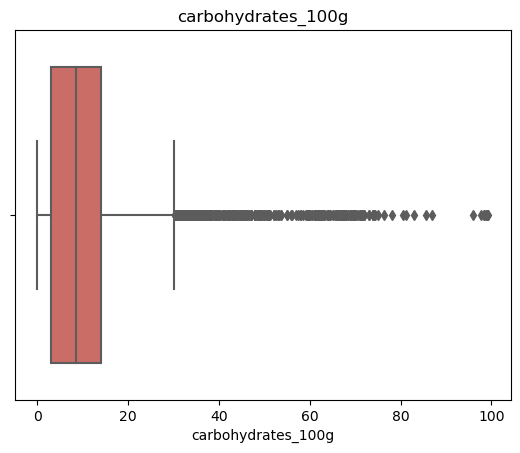

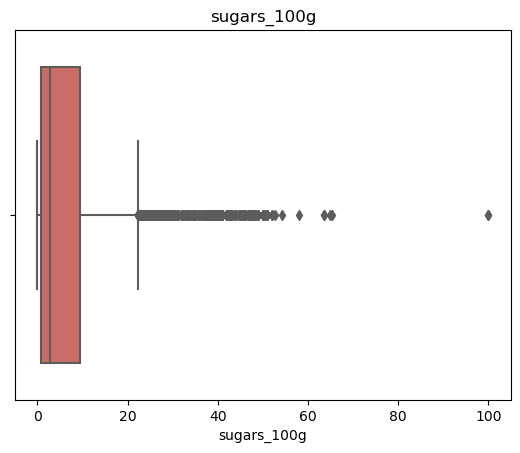

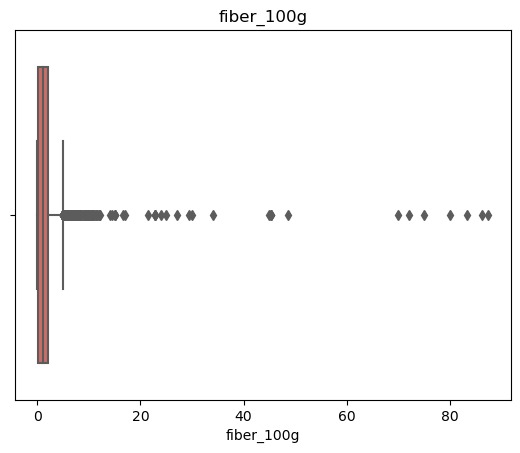

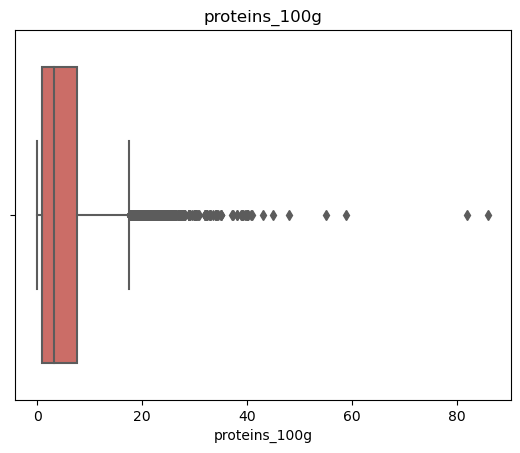

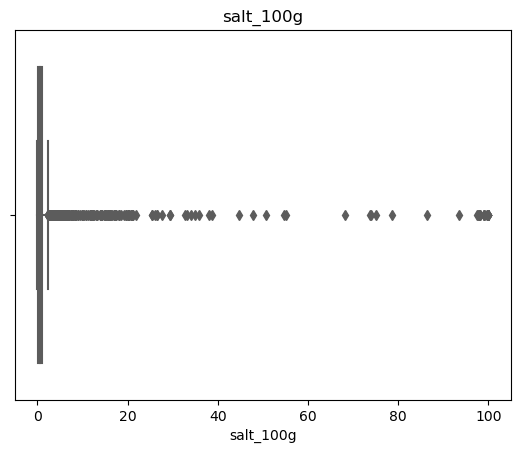

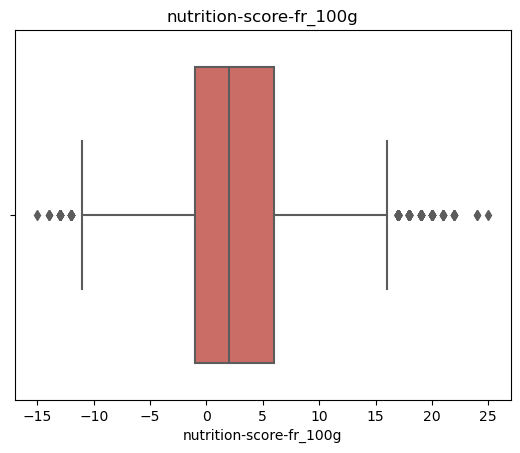

In [47]:
sns_boxplot_quantitative(df_final_clean)

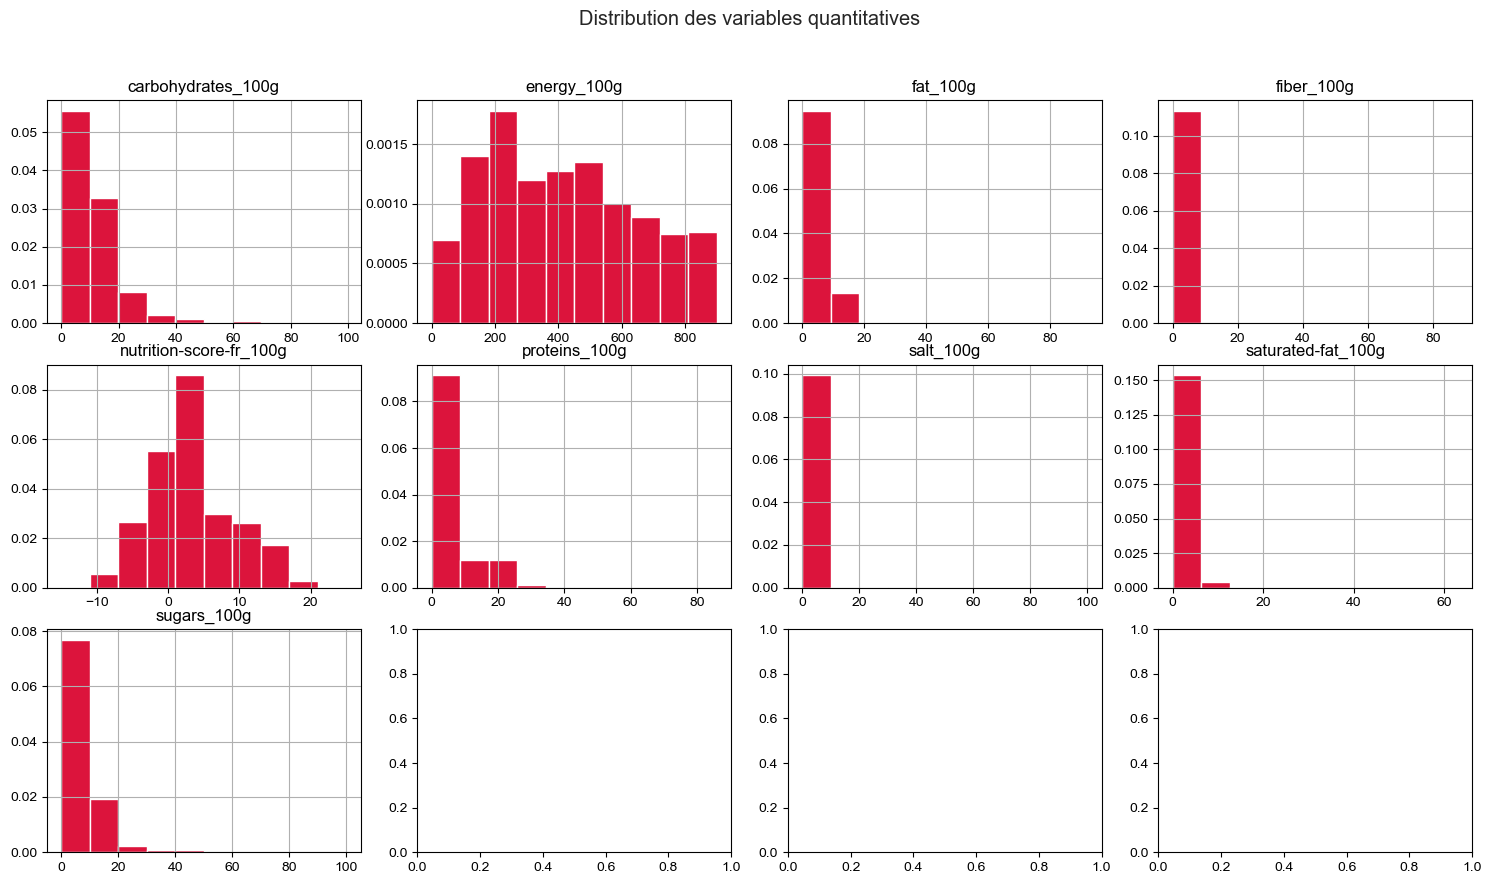

In [48]:
plot_distribution_quantitative_variables(df_final_clean)

In [49]:
# Sélection des colonnes de type "category" dans le DataFrame
colonnes_categories = list(df_final_clean.select_dtypes(include=['category']).columns)

# Initialisation d'une liste pour stocker les noms de colonnes pertinentes pour l'imputation
colonnes_pertinentes_imputation = []

# Parcours des colonnes de type "category"
for colonne in colonnes_categories:
    # Calcul du nombre d'éléments uniques dans la colonne
    nombre_elements_uniques = len(df_final_clean[colonne].unique().to_list())
    
    # Vérification si le nombre d'éléments uniques est inférieur à 150
    if nombre_elements_uniques < 150:
        # Ajout du nom de la colonne à la liste des colonnes pertinentes
        colonnes_pertinentes_imputation.append(colonne)

# Affichage des colonnes pertinentes pour l'imputation
colonnes_pertinentes_imputation


[]

In [50]:
# Création de variables factices (dummies) pour les colonnes pertinentes
variables_factices = pd.get_dummies(df_final_clean, columns=colonnes_pertinentes_imputation)

# Sélection des colonnes numériques
colonnes_numeriques = list(variables_factices.select_dtypes(include=['uint8', 'float']).columns)

# Affichage des noms des colonnes numériques
colonnes_numeriques


['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g']

In [51]:
from sklearn.impute import SimpleImputer

df_imputer_test_mean = df_final_clean.copy(deep=True)

# objet SimpleImputer avec la stratégie 'mean' pour imputer la moyenne.
imputer = SimpleImputer(strategy='mean')

# l'imputation sur le DataFrame en sélectionnant les colonnes appropriées.
# Utilisation de fit_transform pour remplacer les valeurs manquantes par la moyenne.
df_imputer_test_mean[colonnes_numeriques] = imputer.fit_transform(df_imputer_test_mean[colonnes_numeriques])
df_imputer_test_mean.head()

code                  product_name       brands  \
0  0000040608754         Pepsi, Nouveau goût !        Pepsi   
1  0000087177756                           7Up  7Up,Pepsico   
2       00031858  Pur Soup' Velouté de légumes       Liebig   
3  0016229001919                  Lait de coco       Aroy d   
4  0016229004507         Foco basil seed drink         Foco   

                                          categories countries_fr  \
0                                      Sodas au cola       France   
1                   Sodas au citron,Boissons sucrées       France   
2  Aliments et boissons à base de végétaux,Alimen...       France   
3                                      Laits de coco       France   
4  Beverages,Carbonated drinks,Sodas,Sugared beve...       France   

                                    ingredients_text nutrition_grade_fr  \
0  Eau gazéifiée, sucre, colorant caramel E150d, ...                  e   
1  Eau gazéifiée, sucre, acidifiants (acide citri...                  e   
2  eau, légumes 38% (jus de tomates à base de con...                  b   
3  Extrait de noix de coco 60%, eau, emulsifiant ...                  d   
4  Eau, graines de basilic, sucre (10%), arôme ar...                  e   

           pnns_groups_1          pnns_groups_2  energy_100g  fat_100g  \
0              Beverages    Sweetened beverages        177.0  0.000000   
1              Beverages    Sweetened beverages        177.0  0.000000   
2  Fruits and vegetables                  Soups        188.0  2.100000   
3              Beverages  Non-sugared beverages        774.0  3.797789   
4              Beverages    Sweetened beverages        266.0  0.000000   

   saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0                 0.0           10.400000         10.4    0.000000   
1                 0.0           10.400000         10.4    1.555991   
2                 0.7            5.300000          2.4    0.800000   
3                17.0           10.256514          2.0    0.000000   
4                 0.0           15.800000         13.3    0.303000   

   proteins_100g  salt_100g  nutrition-score-fr_100g  cafeine  gluten  
0            0.0     0.0254                     13.0        1       0  
1            0.0     0.1000                     13.0        0       0  
2            0.8     0.7500                      2.0        0       0  
3            1.6     0.0500                     12.0        0       0  
4            0.0     0.0231                     18.0        0       0

Affichage en % des valeurs manquantes par colonnes


0  Nb Valeurs Manquantes
code                     0.0                      0
nutrition-score-fr_100g  0.0                      0
salt_100g                0.0                      0
proteins_100g            0.0                      0
fiber_100g               0.0                      0
sugars_100g              0.0                      0
carbohydrates_100g       0.0                      0
saturated-fat_100g       0.0                      0
fat_100g                 0.0                      0
energy_100g              0.0                      0
pnns_groups_2            0.0                      0
pnns_groups_1            0.0                      0
nutrition_grade_fr       0.0                      0
ingredients_text         0.0                      0
countries_fr             0.0                      0
categories               0.0                      0
brands                   0.0                      0
product_name             0.0                      0
cafeine                  0.0                      0
gluten                   0.0                      0

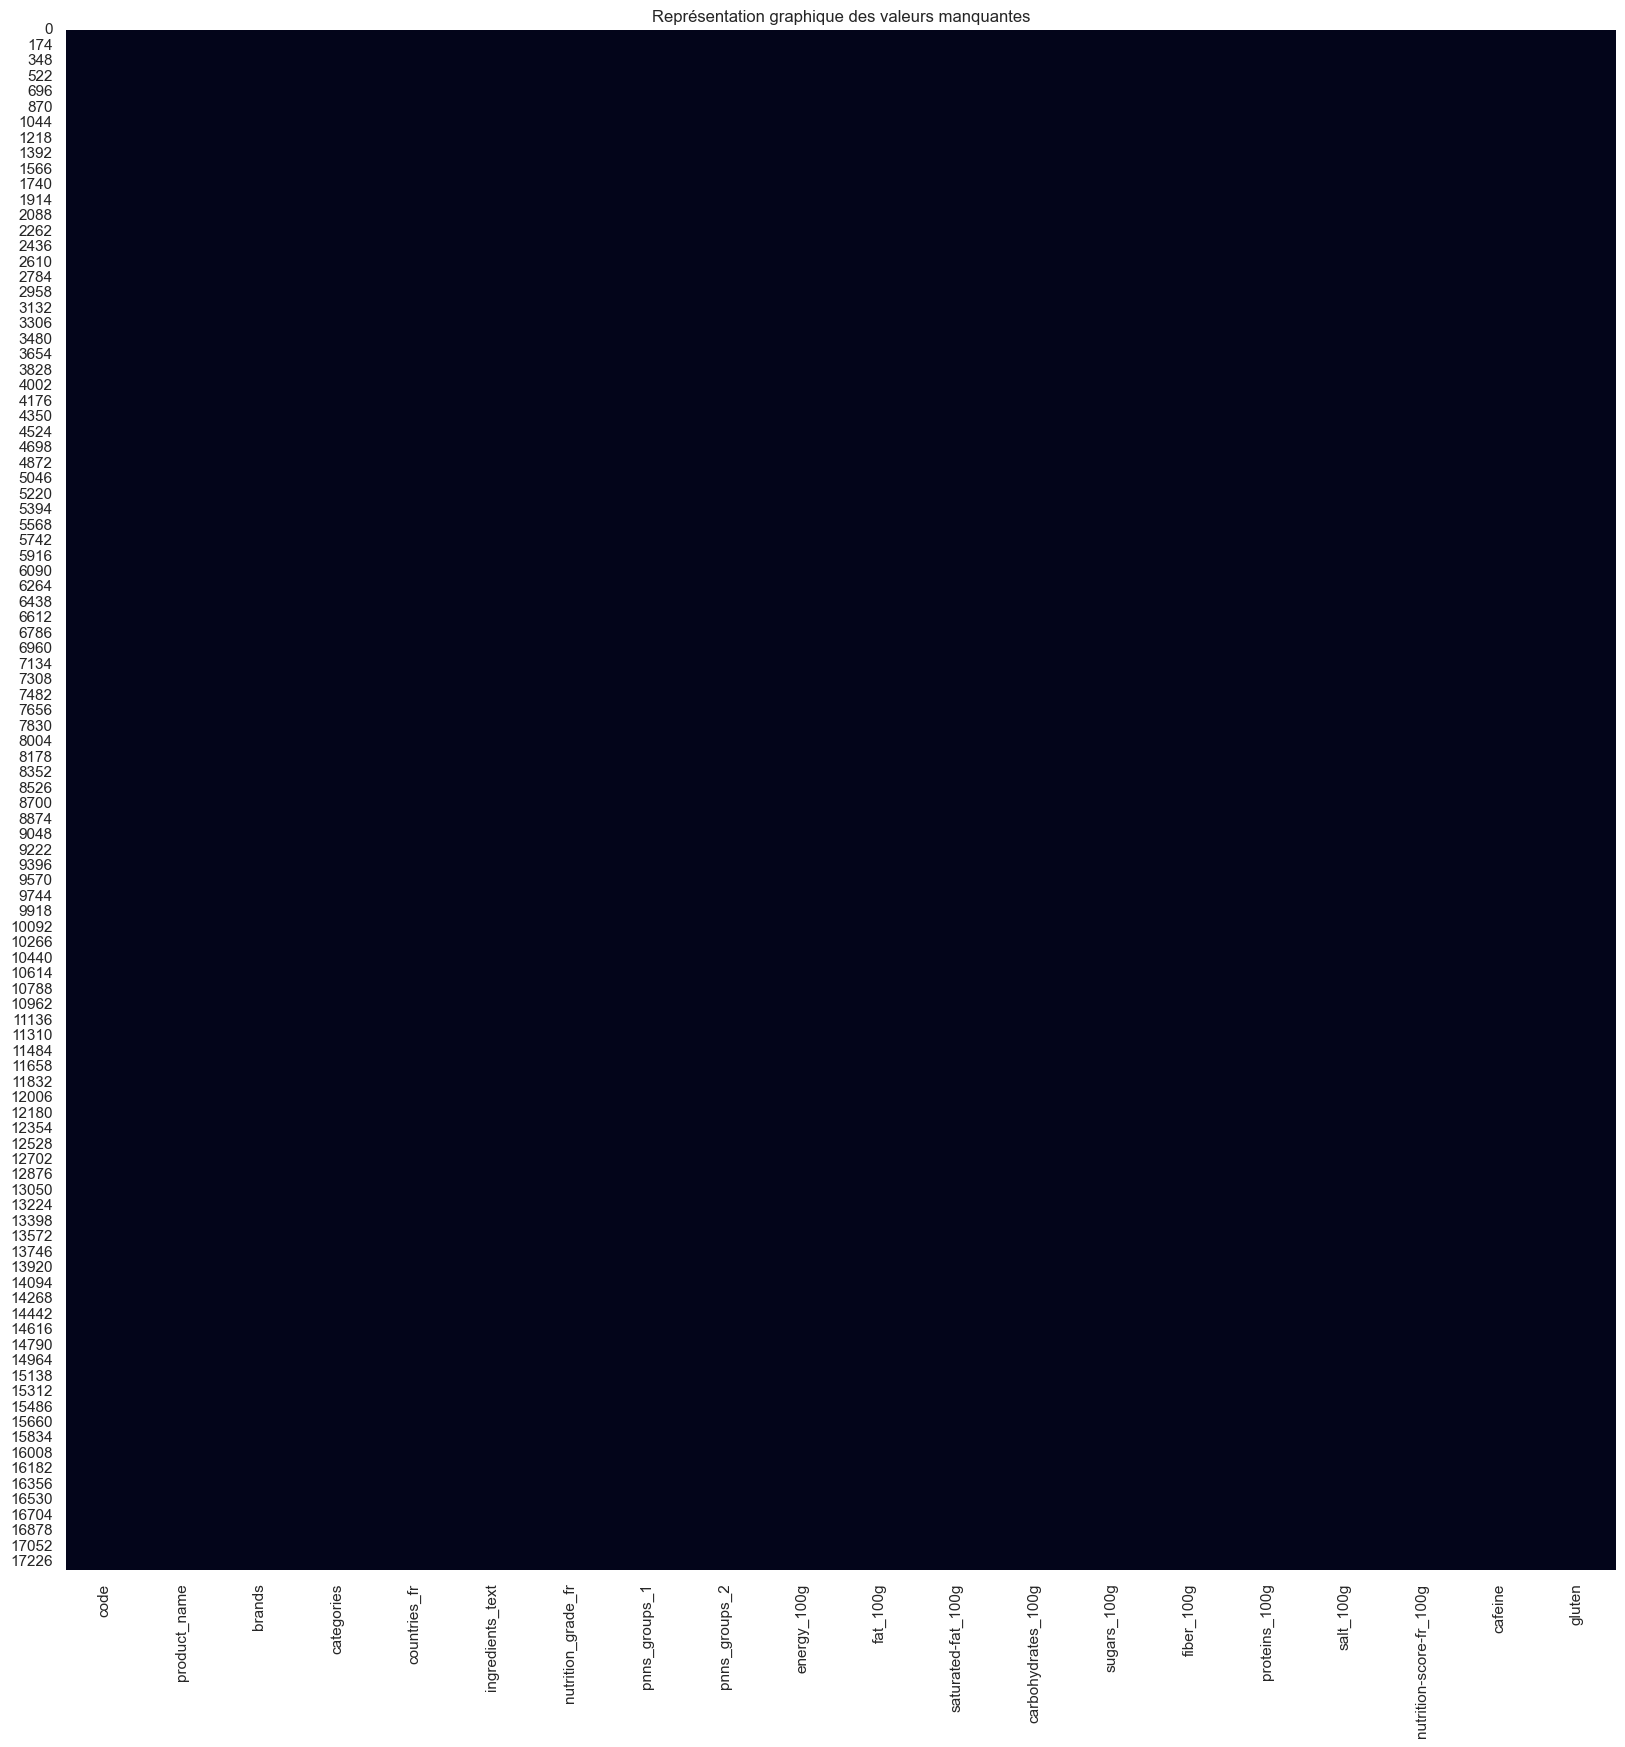

In [52]:
my_valeurs_manquantes(df_imputer_test_mean)

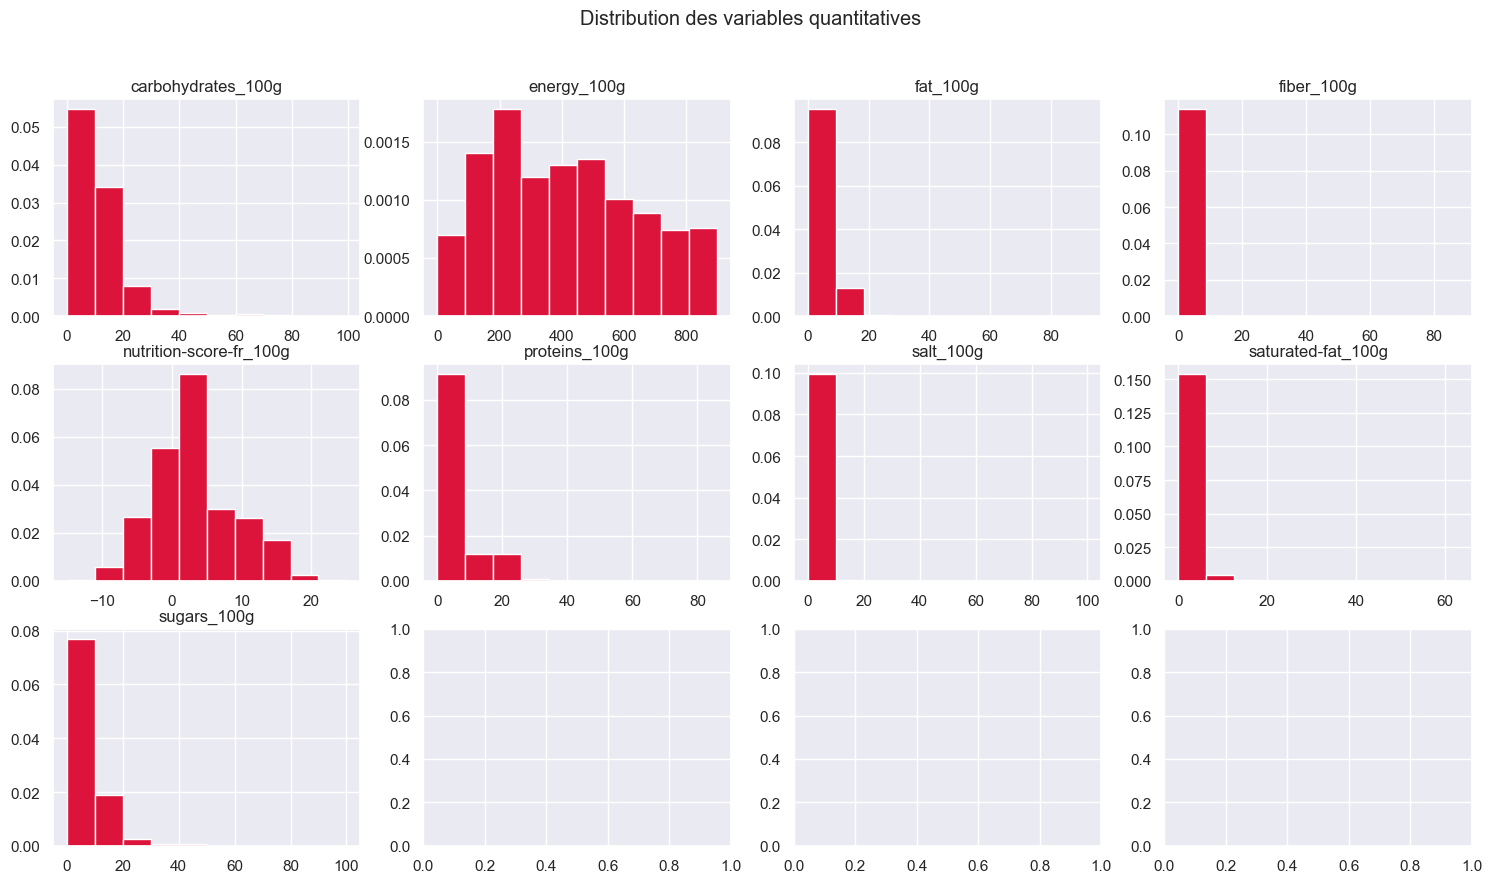

In [53]:
plot_distribution_quantitative_variables(df_imputer_test_mean)

In [54]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_imputer_test_iterative = df_final_clean.copy(deep=True)

# Créez une instance de IterativeImputer
imputer = IterativeImputer()

# Effectuez l'imputation sur les données numériques
donnees_imputer = imputer.fit_transform(df_imputer_test_iterative[colonnes_numeriques])

# Remplacez les colonnes numériques imputées dans votre DataFrame
df_imputer_test_iterative[colonnes_numeriques] = donnees_imputer
df_imputer_test_iterative.head()

C:\Users\Farid\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


code                  product_name       brands  \
0  0000040608754         Pepsi, Nouveau goût !        Pepsi   
1  0000087177756                           7Up  7Up,Pepsico   
2       00031858  Pur Soup' Velouté de légumes       Liebig   
3  0016229001919                  Lait de coco       Aroy d   
4  0016229004507         Foco basil seed drink         Foco   

                                          categories countries_fr  \
0                                      Sodas au cola       France   
1                   Sodas au citron,Boissons sucrées       France   
2  Aliments et boissons à base de végétaux,Alimen...       France   
3                                      Laits de coco       France   
4  Beverages,Carbonated drinks,Sodas,Sugared beve...       France   

                                    ingredients_text nutrition_grade_fr  \
0  Eau gazéifiée, sucre, colorant caramel E150d, ...                  e   
1  Eau gazéifiée, sucre, acidifiants (acide citri...                  e   
2  eau, légumes 38% (jus de tomates à base de con...                  b   
3  Extrait de noix de coco 60%, eau, emulsifiant ...                  d   
4  Eau, graines de basilic, sucre (10%), arôme ar...                  e   

           pnns_groups_1          pnns_groups_2  energy_100g   fat_100g  \
0              Beverages    Sweetened beverages        177.0   0.000000   
1              Beverages    Sweetened beverages        177.0   0.000000   
2  Fruits and vegetables                  Soups        188.0   2.100000   
3              Beverages  Non-sugared beverages        774.0  24.177183   
4              Beverages    Sweetened beverages        266.0   0.000000   

   saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0                 0.0           10.400000         10.4    0.000000   
1                 0.0           10.400000         10.4   -0.439352   
2                 0.7            5.300000          2.4    0.800000   
3                17.0           -0.895396          2.0    0.000000   
4                 0.0           15.800000         13.3    0.303000   

   proteins_100g  salt_100g  nutrition-score-fr_100g  cafeine  gluten  
0            0.0     0.0254                     13.0        1       0  
1            0.0     0.1000                     13.0        0       0  
2            0.8     0.7500                      2.0        0       0  
3            1.6     0.0500                     12.0        0       0  
4            0.0     0.0231                     18.0        0       0

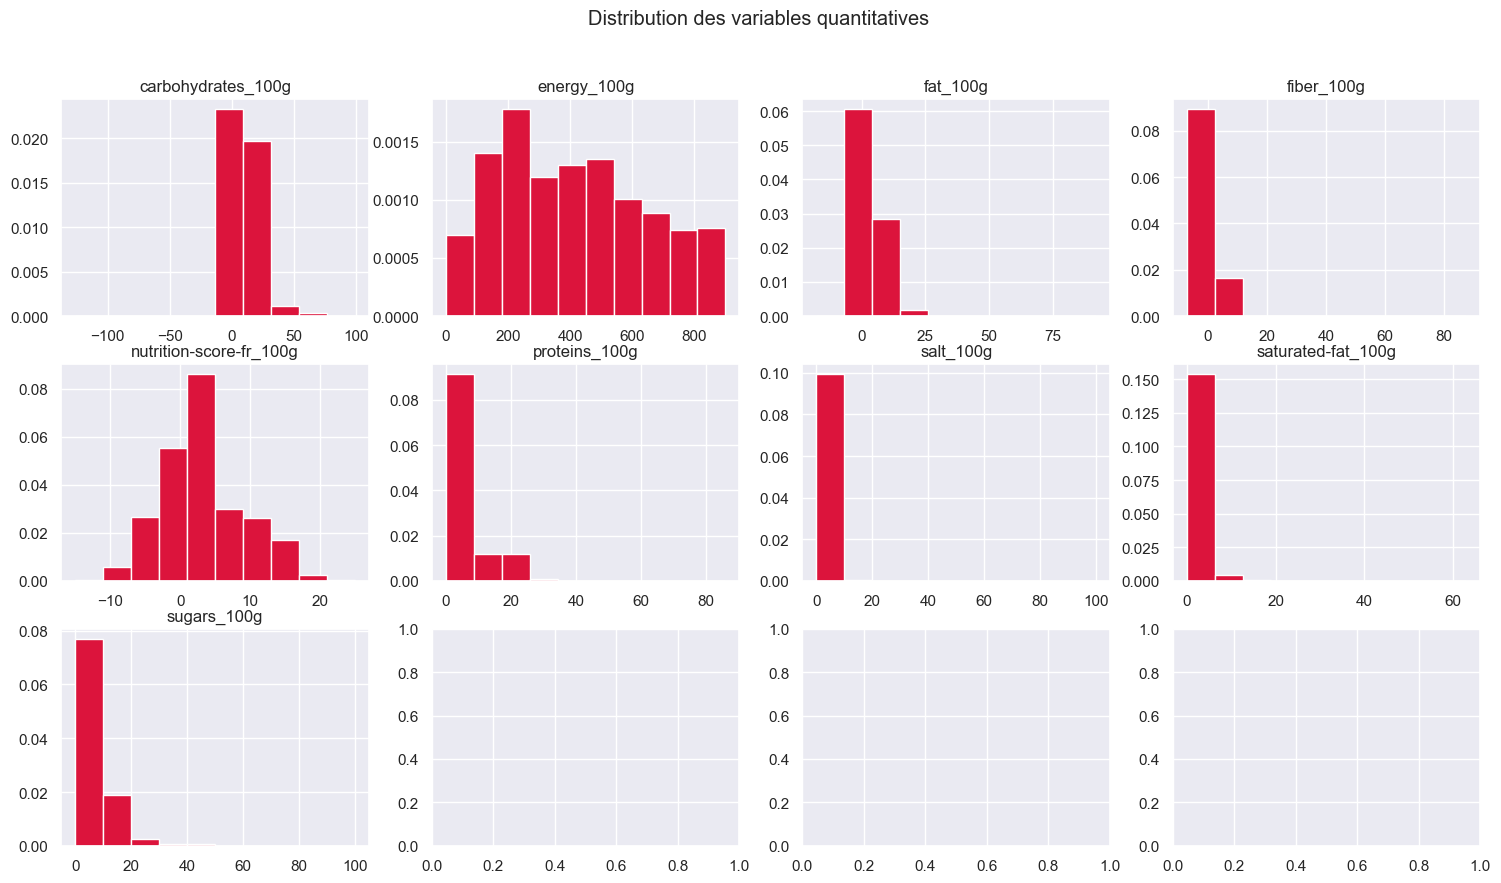

In [55]:
plot_distribution_quantitative_variables(df_imputer_test_iterative)

In [56]:
from sklearn.impute import KNNImputer

# Copie du DataFrame
df_imputer_test_knn = df_final_clean.copy()

# Créez une instance de KNNImputer avec 3 voisins
imputer = KNNImputer(n_neighbors=3)

# Effectuez l'imputation sur les données numériques
donnees_imputees = imputer.fit_transform(df_imputer_test_knn[colonnes_numeriques])

# Remplacez les colonnes numériques imputées dans votre DataFrame
df_imputer_test_knn[colonnes_numeriques] = donnees_imputees
df_imputer_test_knn.head()

code                  product_name       brands  \
0  0000040608754         Pepsi, Nouveau goût !        Pepsi   
1  0000087177756                           7Up  7Up,Pepsico   
2       00031858  Pur Soup' Velouté de légumes       Liebig   
3  0016229001919                  Lait de coco       Aroy d   
4  0016229004507         Foco basil seed drink         Foco   

                                          categories countries_fr  \
0                                      Sodas au cola       France   
1                   Sodas au citron,Boissons sucrées       France   
2  Aliments et boissons à base de végétaux,Alimen...       France   
3                                      Laits de coco       France   
4  Beverages,Carbonated drinks,Sodas,Sugared beve...       France   

                                    ingredients_text nutrition_grade_fr  \
0  Eau gazéifiée, sucre, colorant caramel E150d, ...                  e   
1  Eau gazéifiée, sucre, acidifiants (acide citri...                  e   
2  eau, légumes 38% (jus de tomates à base de con...                  b   
3  Extrait de noix de coco 60%, eau, emulsifiant ...                  d   
4  Eau, graines de basilic, sucre (10%), arôme ar...                  e   

           pnns_groups_1          pnns_groups_2  energy_100g  fat_100g  \
0              Beverages    Sweetened beverages        177.0       0.0   
1              Beverages    Sweetened beverages        177.0       0.0   
2  Fruits and vegetables                  Soups        188.0       2.1   
3              Beverages  Non-sugared beverages        774.0      39.6   
4              Beverages    Sweetened beverages        266.0       0.0   

   saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0                 0.0           10.400000         10.4       0.000   
1                 0.0           10.400000         10.4       0.000   
2                 0.7            5.300000          2.4       0.800   
3                17.0            4.233333          2.0       0.000   
4                 0.0           15.800000         13.3       0.303   

   proteins_100g  salt_100g  nutrition-score-fr_100g  cafeine  gluten  
0            0.0     0.0254                     13.0        1       0  
1            0.0     0.1000                     13.0        0       0  
2            0.8     0.7500                      2.0        0       0  
3            1.6     0.0500                     12.0        0       0  
4            0.0     0.0231                     18.0        0       0

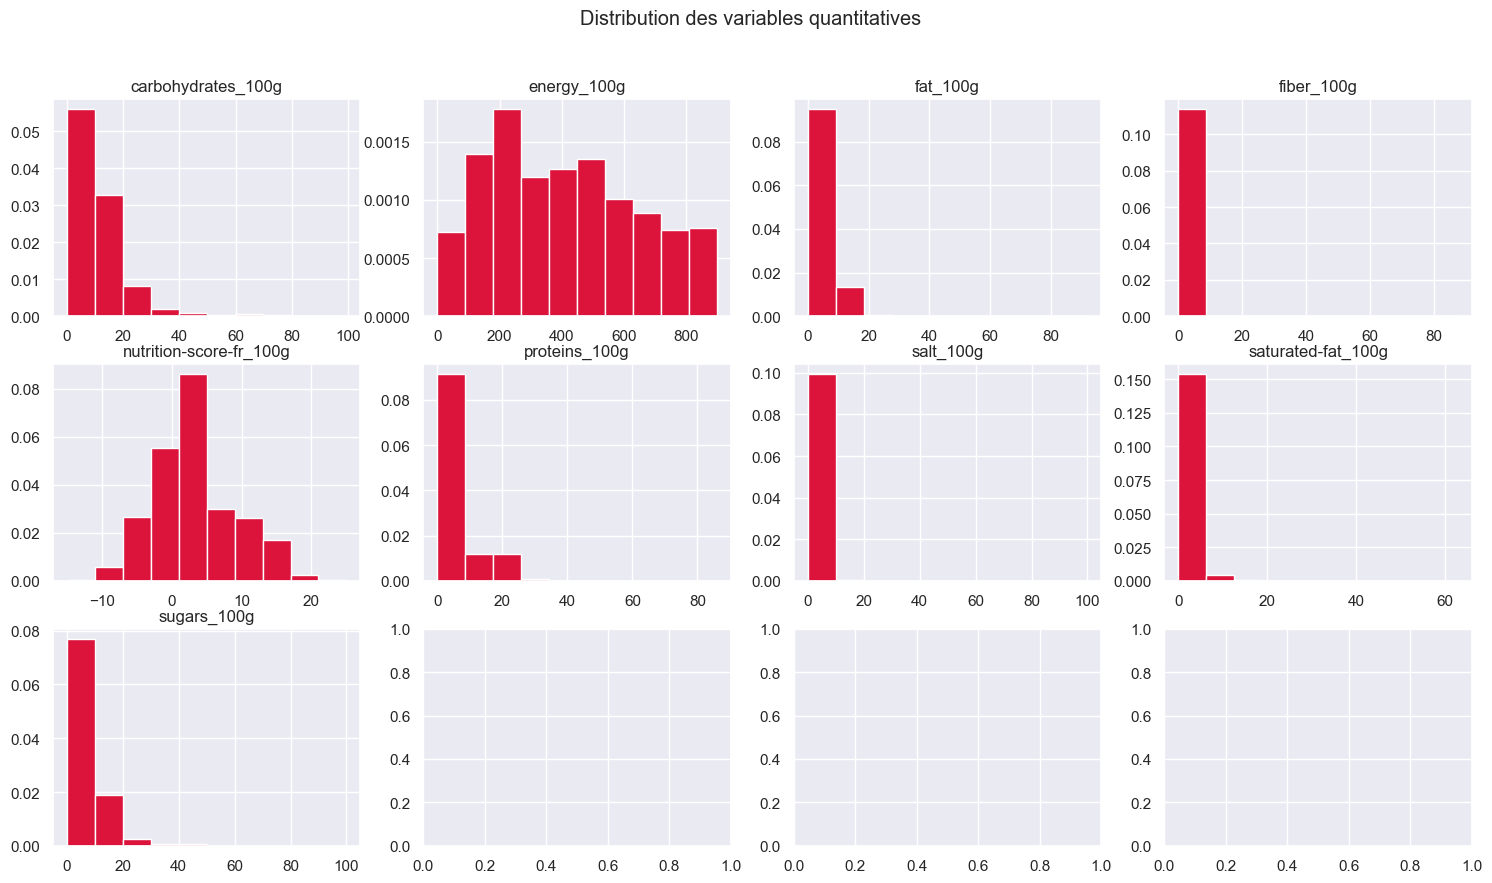

In [57]:
plot_distribution_quantitative_variables(df_imputer_test_knn)

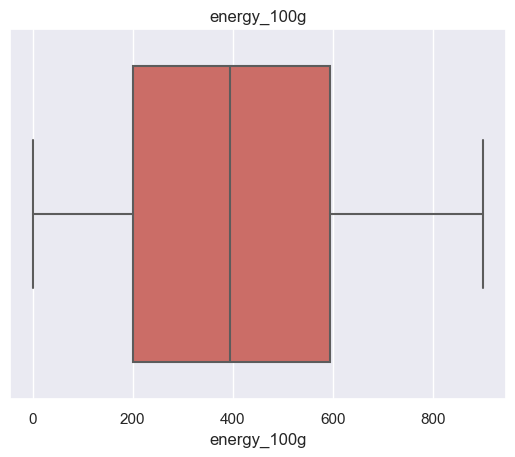

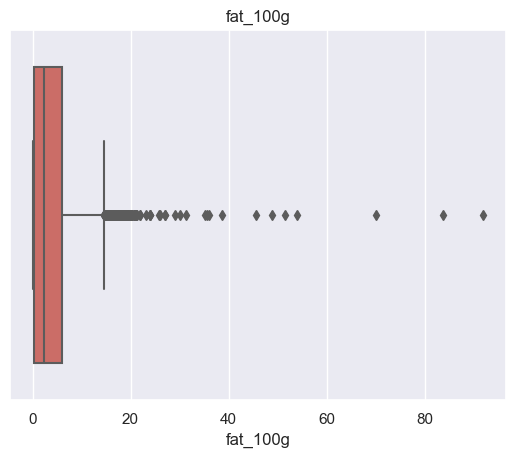

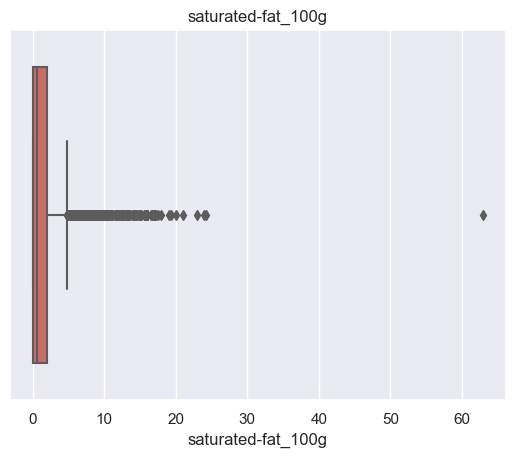

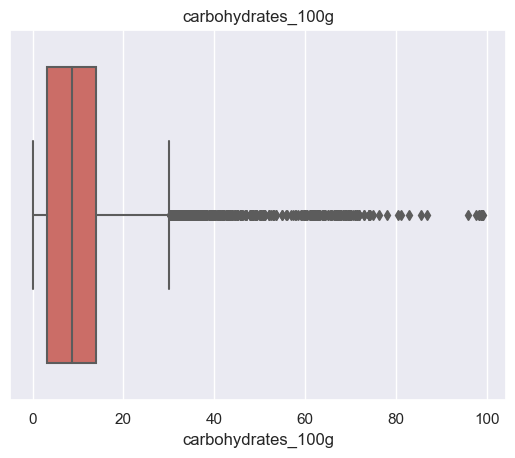

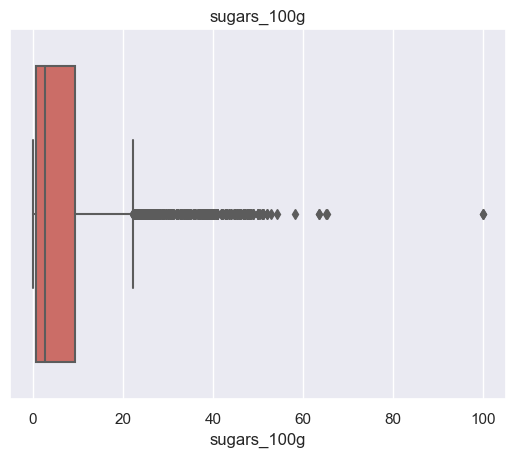

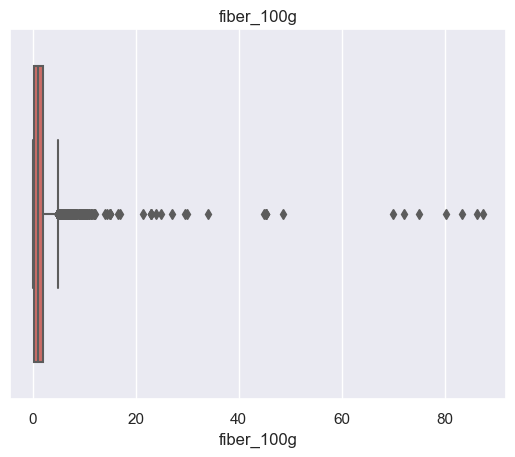

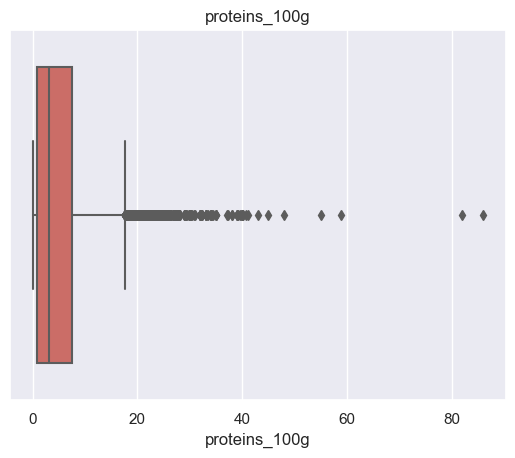

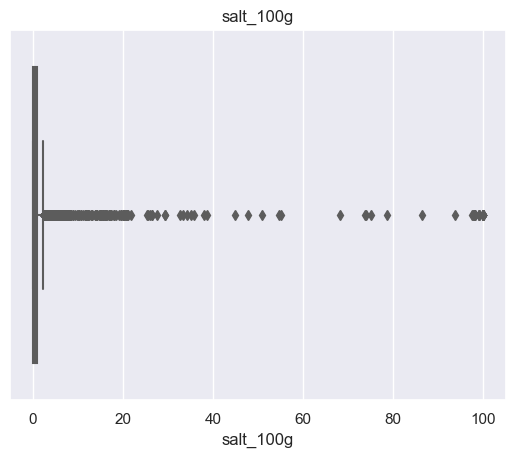

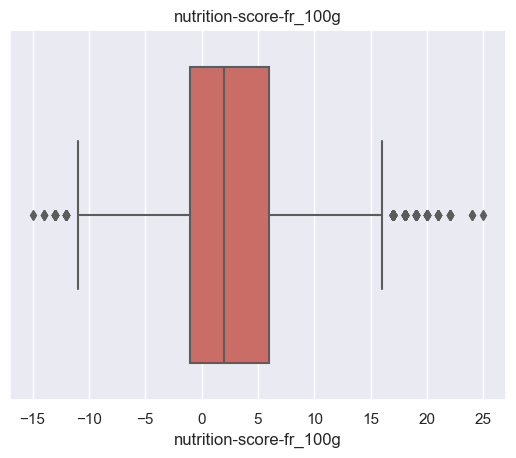

In [58]:
sns_boxplot_quantitative(variables_factices)

Affichage en % des valeurs manquantes par colonnes


0  Nb Valeurs Manquantes
code                     0.0                      0
nutrition-score-fr_100g  0.0                      0
salt_100g                0.0                      0
proteins_100g            0.0                      0
fiber_100g               0.0                      0
sugars_100g              0.0                      0
carbohydrates_100g       0.0                      0
saturated-fat_100g       0.0                      0
fat_100g                 0.0                      0
energy_100g              0.0                      0
pnns_groups_2            0.0                      0
pnns_groups_1            0.0                      0
nutrition_grade_fr       0.0                      0
ingredients_text         0.0                      0
countries_fr             0.0                      0
categories               0.0                      0
brands                   0.0                      0
product_name             0.0                      0
cafeine                  0.0                      0
gluten                   0.0                      0

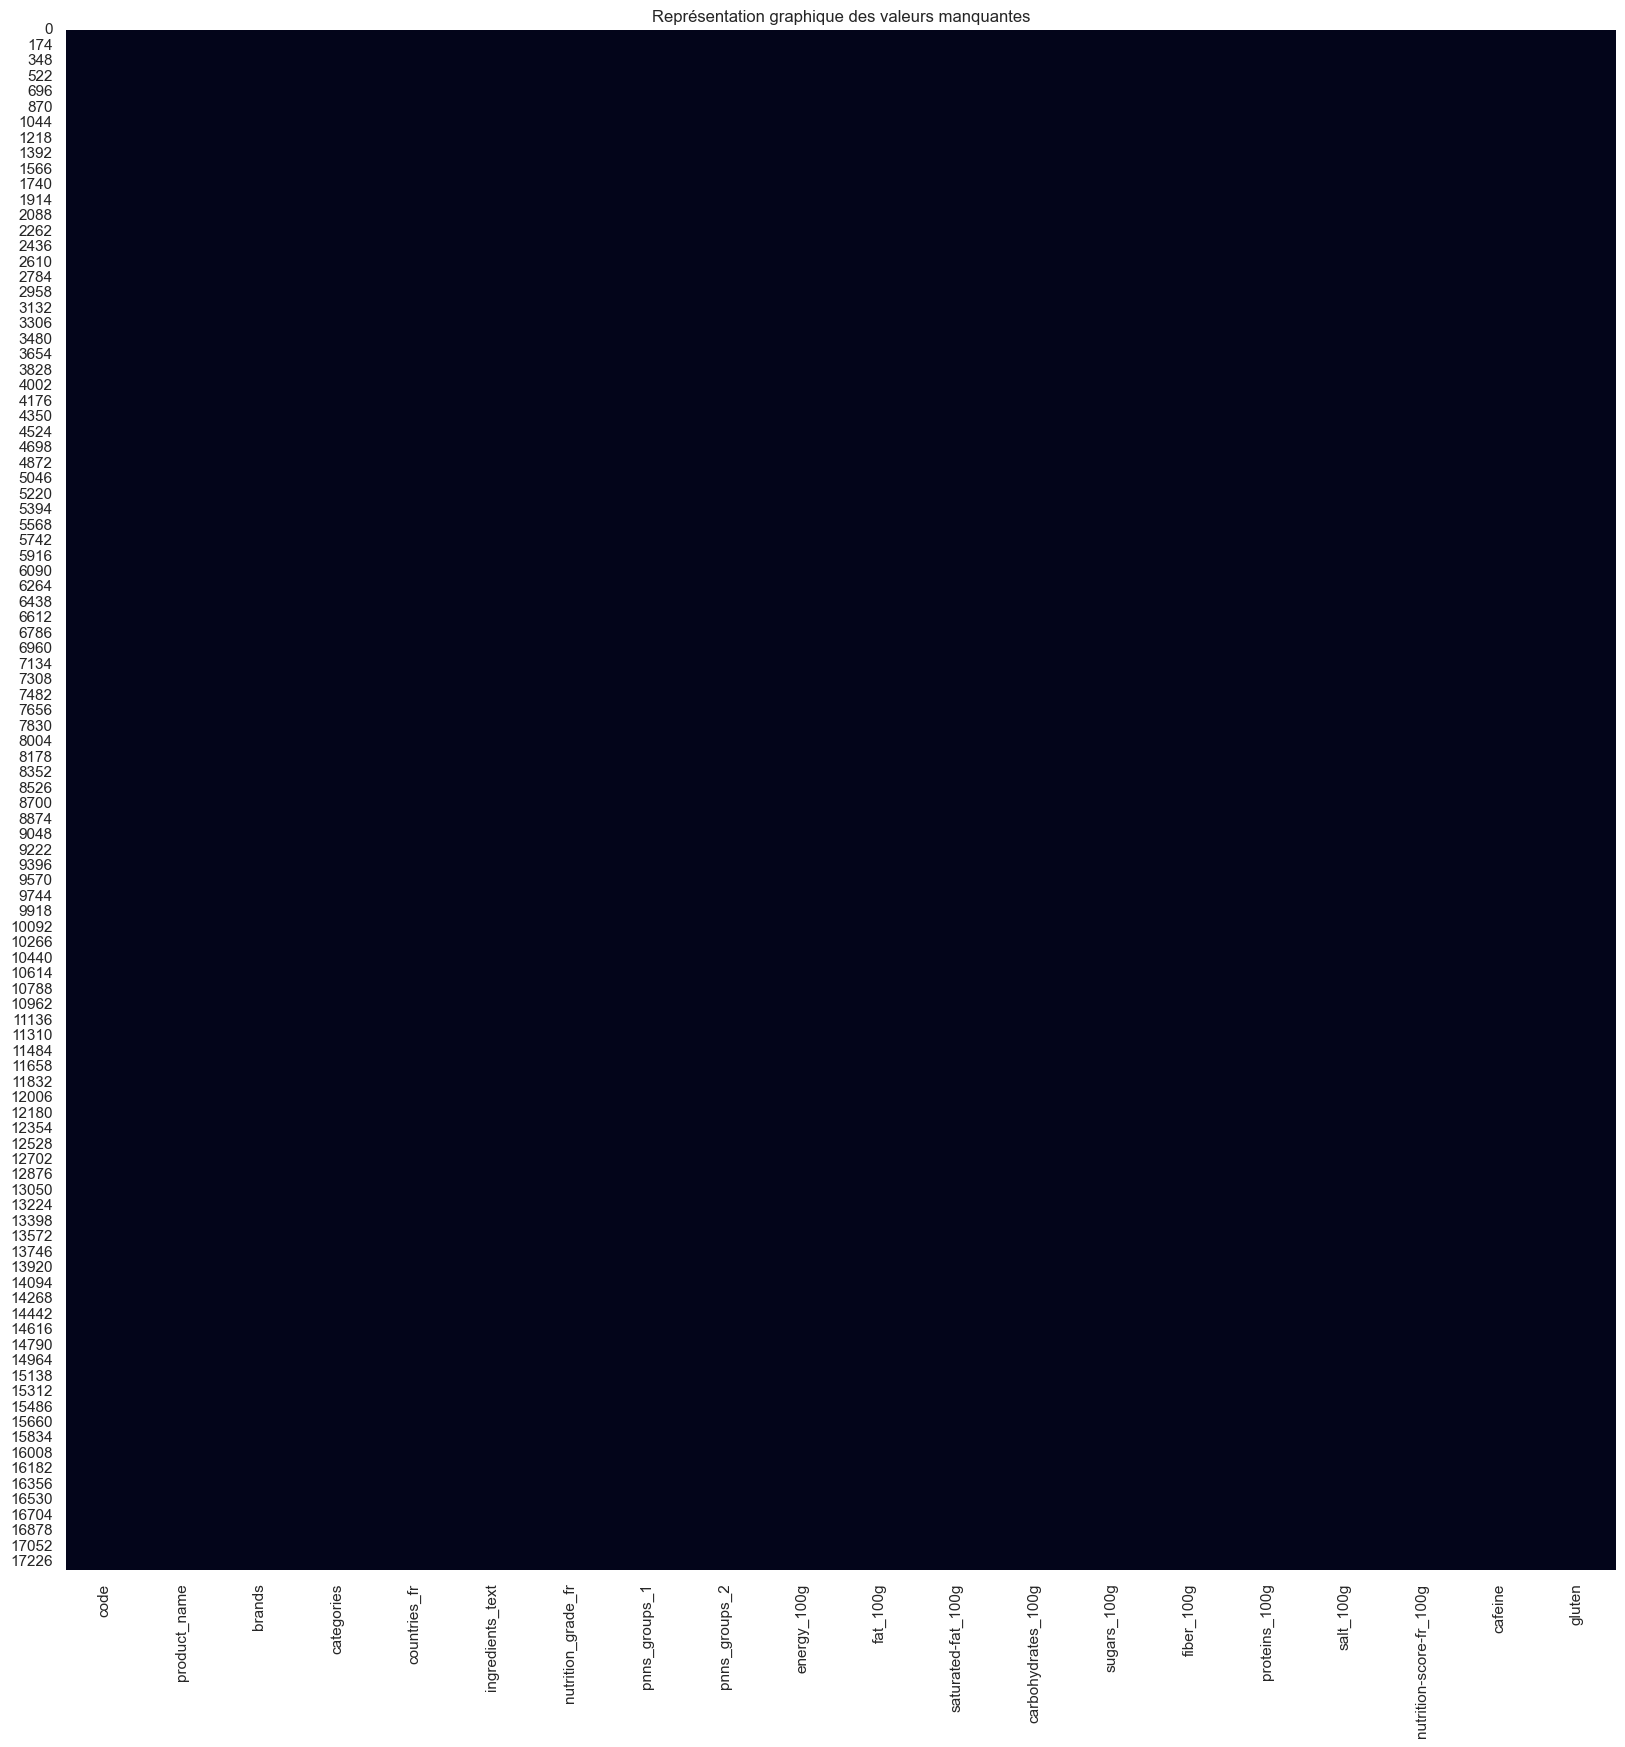

In [104]:
my_valeurs_manquantes(df_imputer_test_knn)

In [60]:
# Sauvegarde du fichier
variables_factices.to_csv('df_finale.csv',sep=',',index=False) 

In [61]:
products_food = pd.read_csv(path + '/df_finale.csv',sep=',')

In [62]:
products_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17318 entries, 0 to 17317
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     17318 non-null  int64  
 1   product_name             17318 non-null  object 
 2   brands                   17318 non-null  object 
 3   categories               17318 non-null  object 
 4   countries_fr             17318 non-null  object 
 5   ingredients_text         17318 non-null  object 
 6   nutrition_grade_fr       17318 non-null  object 
 7   pnns_groups_1            17318 non-null  object 
 8   pnns_groups_2            17318 non-null  object 
 9   energy_100g              17318 non-null  float64
 10  fat_100g                 17318 non-null  float64
 11  saturated-fat_100g       17318 non-null  float64
 12  carbohydrates_100g       17318 non-null  float64
 13  sugars_100g              17318 non-null  float64
 14  fiber_100g            

In [63]:
products_food.drop(['gluten', 'countries_fr'], axis=1)

code                   product_name       brands  \
0           40608754          Pepsi, Nouveau goût !        Pepsi   
1           87177756                            7Up  7Up,Pepsico   
2              31858   Pur Soup' Velouté de légumes       Liebig   
3        16229001919                   Lait de coco       Aroy d   
4        16229004507          Foco basil seed drink         Foco   
...              ...                            ...          ...   
17313  9556156040038        Boisson au chrysanthème        Yeo's   
17314  9556156040182                   Lychee Drink        Yeo's   
17315  9556156046399  Boisson au soja (soy bean 8%)        Yeo's   
17316  9577283844672        100% Pur Jus 4 agrumes          Cora   
17317       99111250             Thé vert Earl grey      Lobodis   

                                              categories  \
0                                          Sodas au cola   
1                       Sodas au citron,Boissons sucrées   
2      Aliments et boissons à base de végétaux,Alimen...   
3                                          Laits de coco   
4      Beverages,Carbonated drinks,Sodas,Sugared beve...   
...                                                  ...   
17313                        Boissons à base de végétaux   
17314  Boissons,Boissons à base de végétaux,Boissons ...   
17315        Boissons,Boissons non sucrées,Laits de soja   
17316  Aliments et boissons à base de végétaux,Boisso...   
17317                                         thés verts   

                                        ingredients_text nutrition_grade_fr  \
0      Eau gazéifiée, sucre, colorant caramel E150d, ...                  e   
1      Eau gazéifiée, sucre, acidifiants (acide citri...                  e   
2      eau, légumes 38% (jus de tomates à base de con...                  b   
3      Extrait de noix de coco 60%, eau, emulsifiant ...                  d   
4      Eau, graines de basilic, sucre (10%), arôme ar...                  e   
...                                                  ...                ...   
17313  Eau, extrait de chrysanthème (12%), sucre de c...                  d   
17314  Eau, sucre de canne, jus de litchi (2,5 %), ar...                  e   
17315  Eau, extrait de _soja_ (_soja_ 8 %), sucre de ...                  b   
17316  Jus d'orange (dont pulpe 1,6%), jus de clément...                  c   
17317  thé vert, arôme naturel bergamote avec autres ...                  c   

               pnns_groups_1          pnns_groups_2  energy_100g  fat_100g  \
0                  Beverages    Sweetened beverages        177.0       0.0   
1                  Beverages    Sweetened beverages        177.0       0.0   
2      Fruits and vegetables                  Soups        188.0       2.1   
3                  Beverages  Non-sugared beverages        774.0      39.6   
4                  Beverages    Sweetened beverages        266.0       0.0   
...                      ...                    ...          ...       ...   
17313              Beverages    Sweetened beverages        119.0       0.0   
17314              Beverages    Sweetened beverages        173.0       0.0   
17315              Beverages    Sweetened beverages        214.0       1.1   
17316              Beverages           Fruit juices        192.0       0.5   
17317              Beverages  Non-sugared beverages         21.0       0.2   

       saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0                     0.0           10.400000         10.4       0.000   
1                     0.0           10.400000         10.4       0.000   
2                     0.7            5.300000          2.4       0.800   
3                    17.0            4.233333          2.0       0.000   
4                     0.0           15.800000         13.3       0.303   
...                   ...                 ...          ...         ...   
17313                 0.0            7.000000          7.0       0.000   


# Analyse univariée <a class="anchor" id="univariée"></a>

[Retour au sommaire](#sommaire) 

In [64]:
products_food.describe()

code   energy_100g      fat_100g  saturated-fat_100g  \
count  1.731800e+04  17318.000000  17318.000000        17318.000000   
mean   3.651641e+12    410.757062      3.799611            1.363138   
std    4.193034e+12    238.391394      4.515134            2.087055   
min    1.321400e+04      0.000000      0.000000            0.000000   
25%    3.228881e+12    201.000000      0.300000            0.100000   
50%    3.270161e+12    393.000000      2.300000            0.600000   
75%    3.564701e+12    593.000000      6.000000            1.900000   
max    3.564707e+14    900.000000     92.000000           63.000000   

       carbohydrates_100g   sugars_100g    fiber_100g  proteins_100g  \
count        17318.000000  17318.000000  17318.000000   17318.000000   
mean            10.212450      5.672794      1.289882       5.785484   
std             10.204314      7.309954      2.341213       6.939417   
min              0.000000      0.000000      0.000000       0.000000   
25%              3.000000      0.800000      0.166667       0.800000   
50%              8.500000      2.800000      0.833333       3.200000   
75%             13.800000      9.300000      1.800000       7.400000   
max             99.300000    100.000000     87.500000      86.000000   

          salt_100g  nutrition-score-fr_100g       cafeine        gluten  
count  17318.000000             17318.000000  17318.000000  17318.000000  
mean       1.013729                 2.858586      0.017554      0.044578  
std        4.273715                 5.842353      0.131327      0.206381  
min        0.000000               -15.000000      0.000000      0.000000  
25%        0.076200                -1.000000      0.000000      0.000000  
50%        0.510000                 2.000000      0.000000      0.000000  
75%        1.016000                 6.000000      0.000000      0.000000  
max      100.000000                25.000000      1.000000      1.000000

## Distribution des variables quantitatives <a class="anchor" id="distrib_quantitative"></a>

[Retour au sommaire](#sommaire)

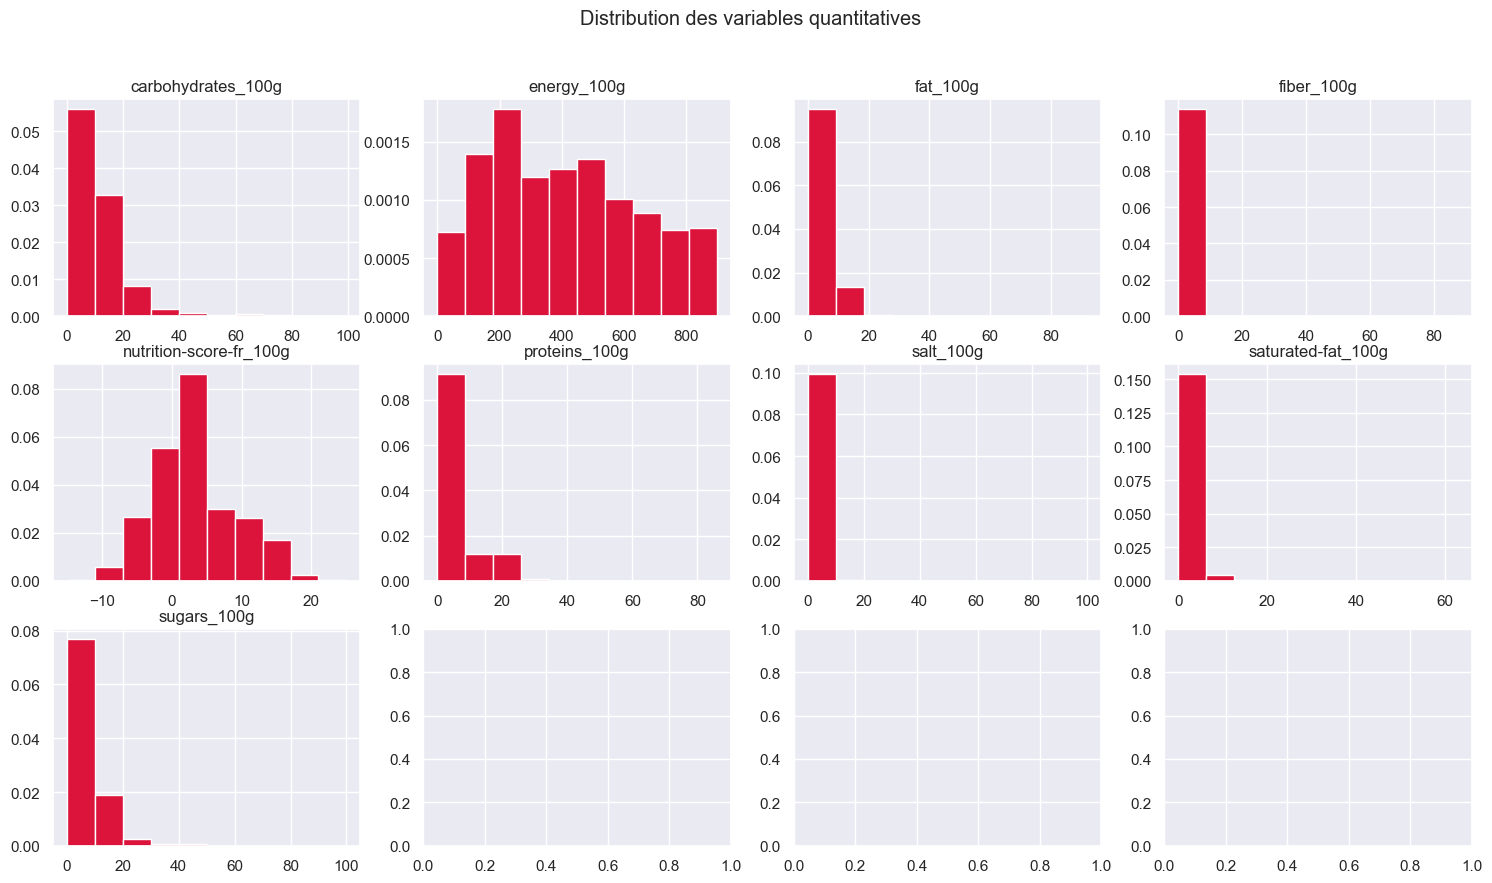

In [65]:
# Utilisation de la fonction plot_distribution_quantitative_variables(dataframe)
plot_distribution_quantitative_variables(products_food)

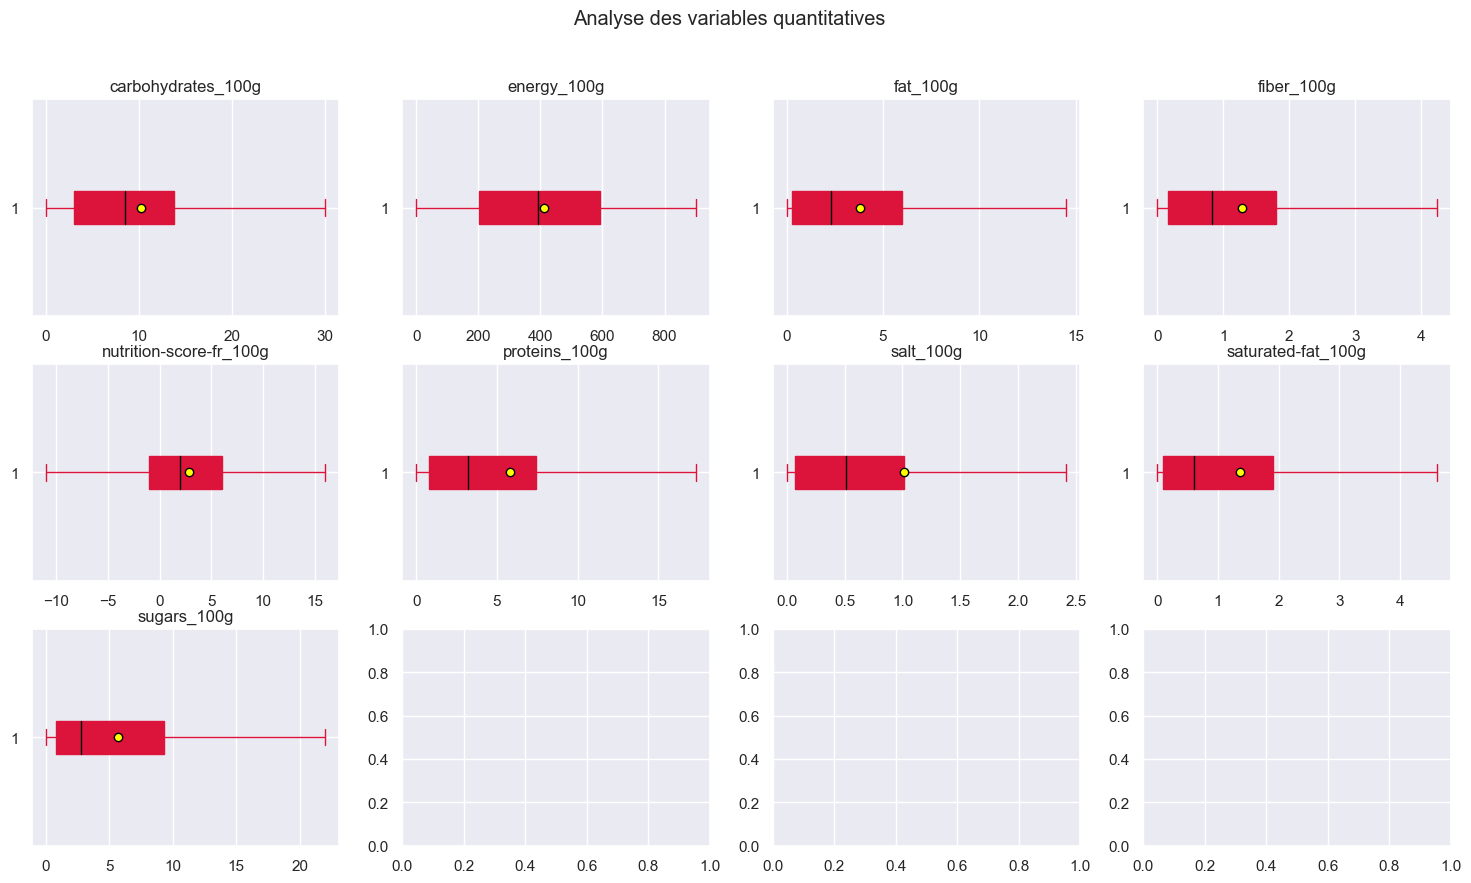

In [66]:
# Utilisation de la fonction en spécifiant les couleurs
plot_quantitative_variable_analysis(products_food, boxplot_color='#DC143C', median_color='black', mean_color='yellow')

## Distribution des variables qualitatives <a class="anchor" id="distrib_qualitative"></a>

[Retour au sommaire](#sommaire) 

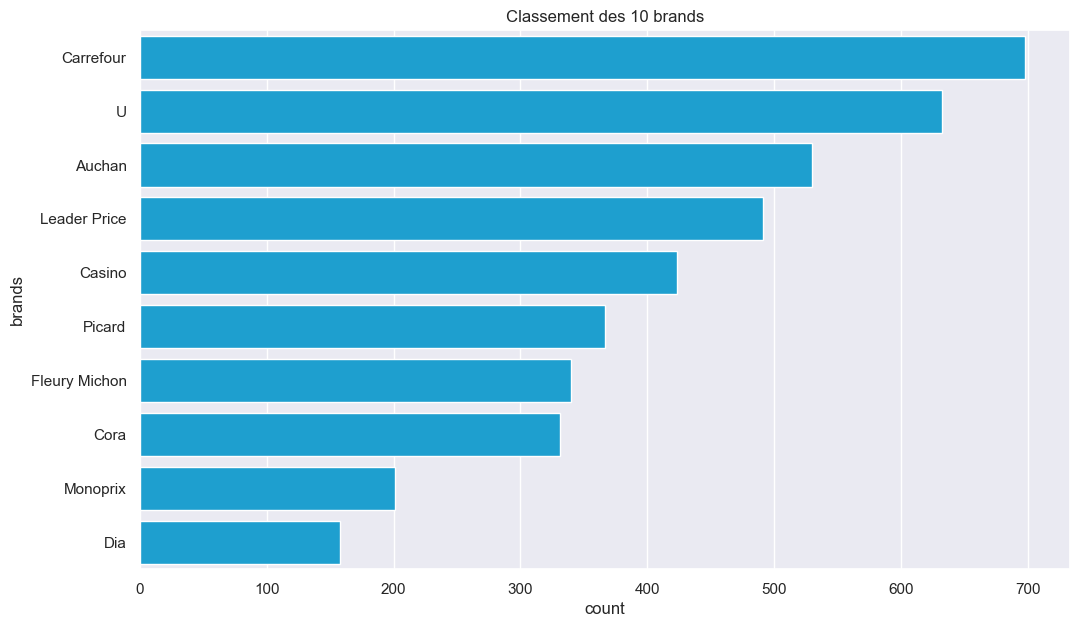

In [67]:
# Utilisation de la fonction avec la variable et la couleur souhaitée.
plot_countplot(products_food, variable='brands', n=10, countplot_color='#00ACED')

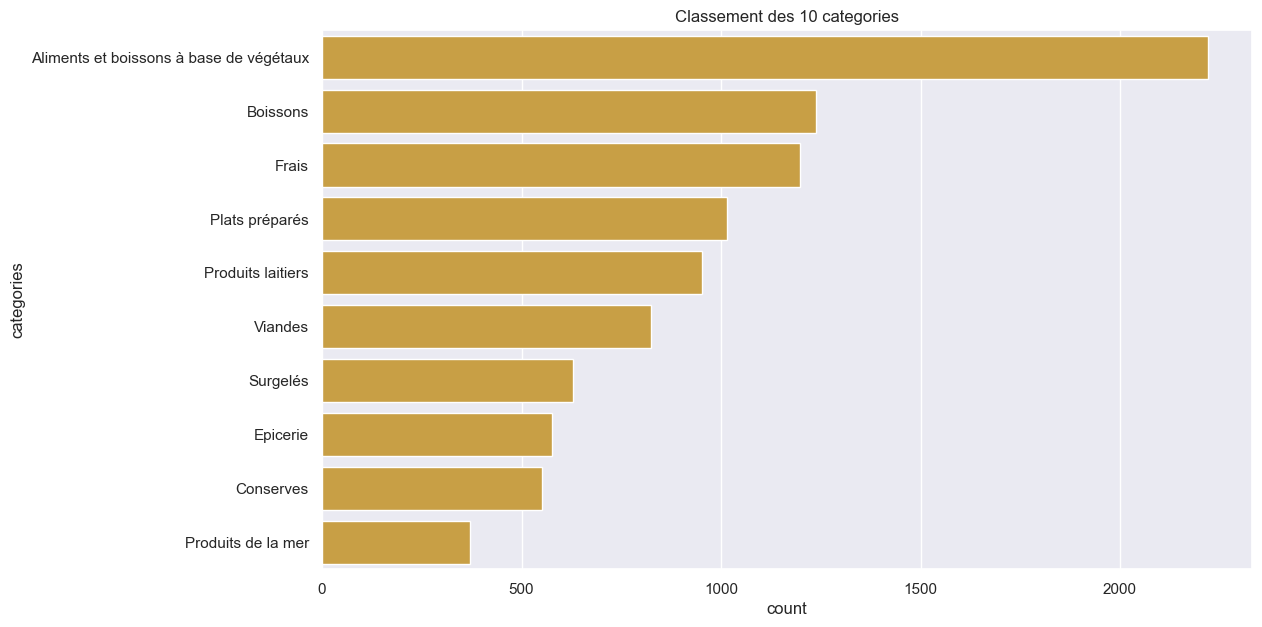

In [68]:
products_food['categories'] = products_food['categories'].str.split(',').str[0]
plot_countplot(products_food, variable='categories', n=10, countplot_color='#DEA72F')

In [69]:
products_food['pnns_groups_1'].value_counts()

Composite foods            3358
Beverages                  2925
Fish Meat Eggs             2578
Milk and dairy products    2340
Fruits and vegetables      2043
unknown                    1546
Fat and sauces             1010
Cereals and potatoes        659
Sugary snacks               445
fruits-and-vegetables       362
Salty snacks                 50
sugary-snacks                 1
cereals-and-potatoes          1
Name: pnns_groups_1, dtype: int64

In [70]:
unwanted_values = ["fruits-and-vegetables", "sugary-snacks", "cereals-and-potatoes", "salty-snacks", "unknown"]

products_food = products_food[~products_food['pnns_groups_1'].isin(unwanted_values)]
products_food['pnns_groups_1'].value_counts()

Composite foods            3358
Beverages                  2925
Fish Meat Eggs             2578
Milk and dairy products    2340
Fruits and vegetables      2043
Fat and sauces             1010
Cereals and potatoes        659
Sugary snacks               445
Salty snacks                 50
Name: pnns_groups_1, dtype: int64

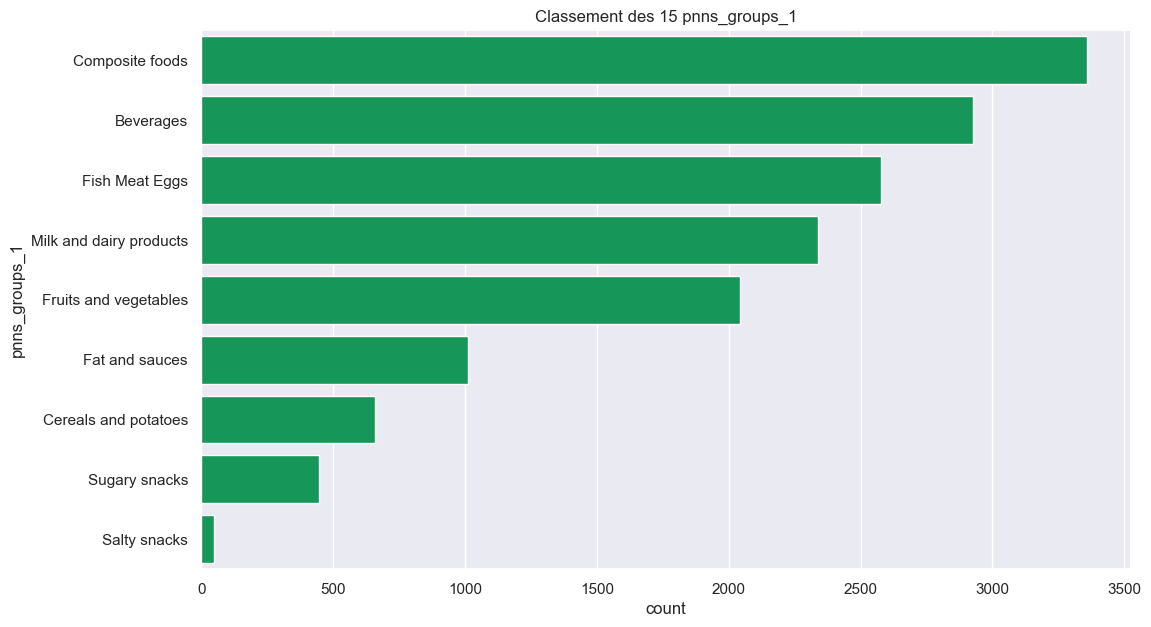

In [71]:
plot_countplot(products_food, variable='pnns_groups_1', n=15, countplot_color='#01AB59')

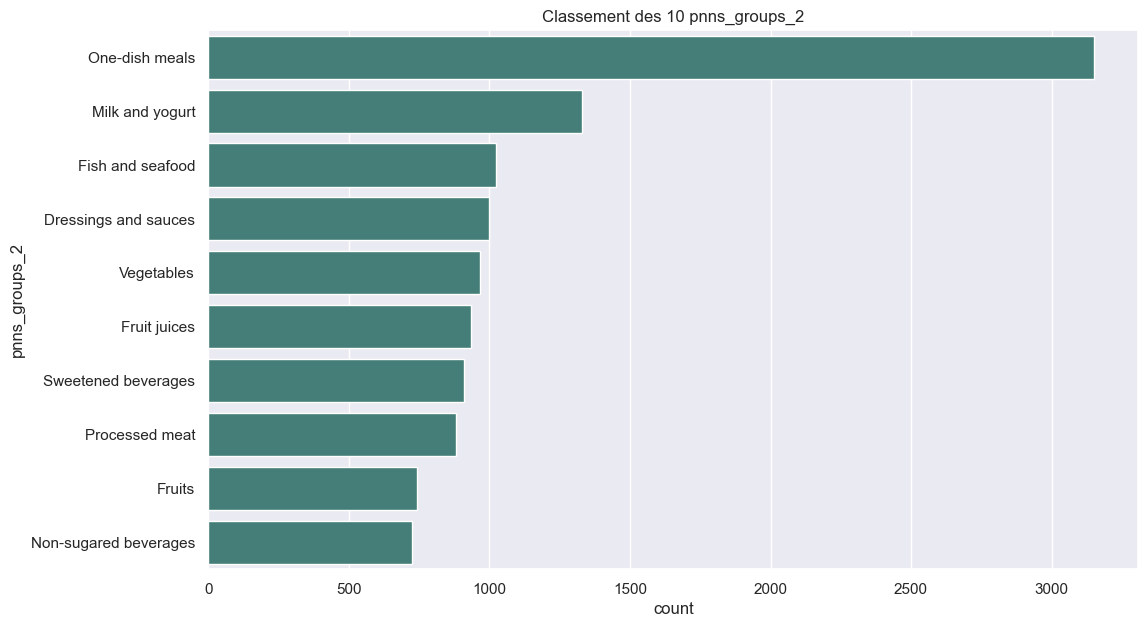

In [72]:
plot_countplot(products_food, variable='pnns_groups_2', n=10, countplot_color='#3B8880')

In [73]:
nutri_grade = products_food.groupby('nutrition_grade_fr').size()
nutri_grade

nutrition_grade_fr
a    3879
b    3794
c    4801
d    1922
e    1012
dtype: int64

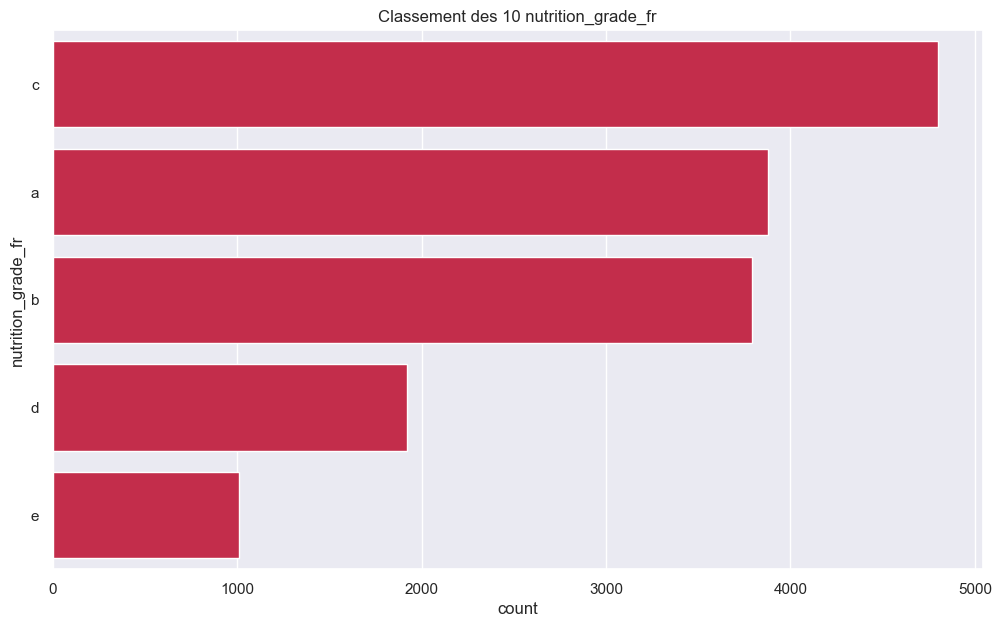

In [74]:
plot_countplot(products_food, variable='nutrition_grade_fr', n=10, countplot_color='#DC143C')

In [75]:
products_food.groupby('cafeine').size()

cafeine
0    15109
1      299
dtype: int64

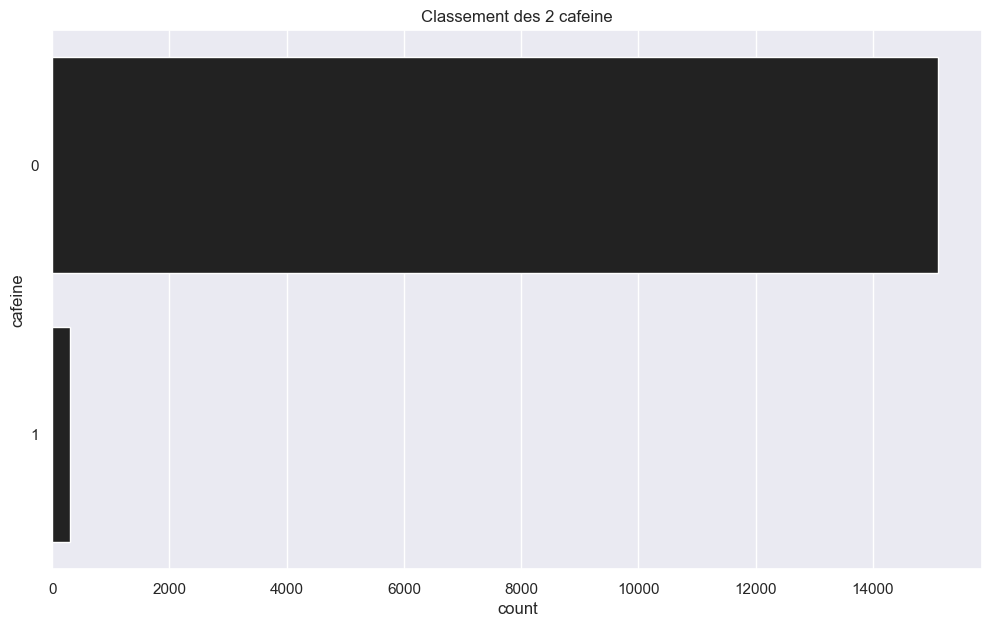

In [76]:
plot_countplot(products_food, variable='cafeine', n=2, countplot_color='#2222')

# Analyse bivariées <a class="anchor" id="analyse_bivariées"></a>

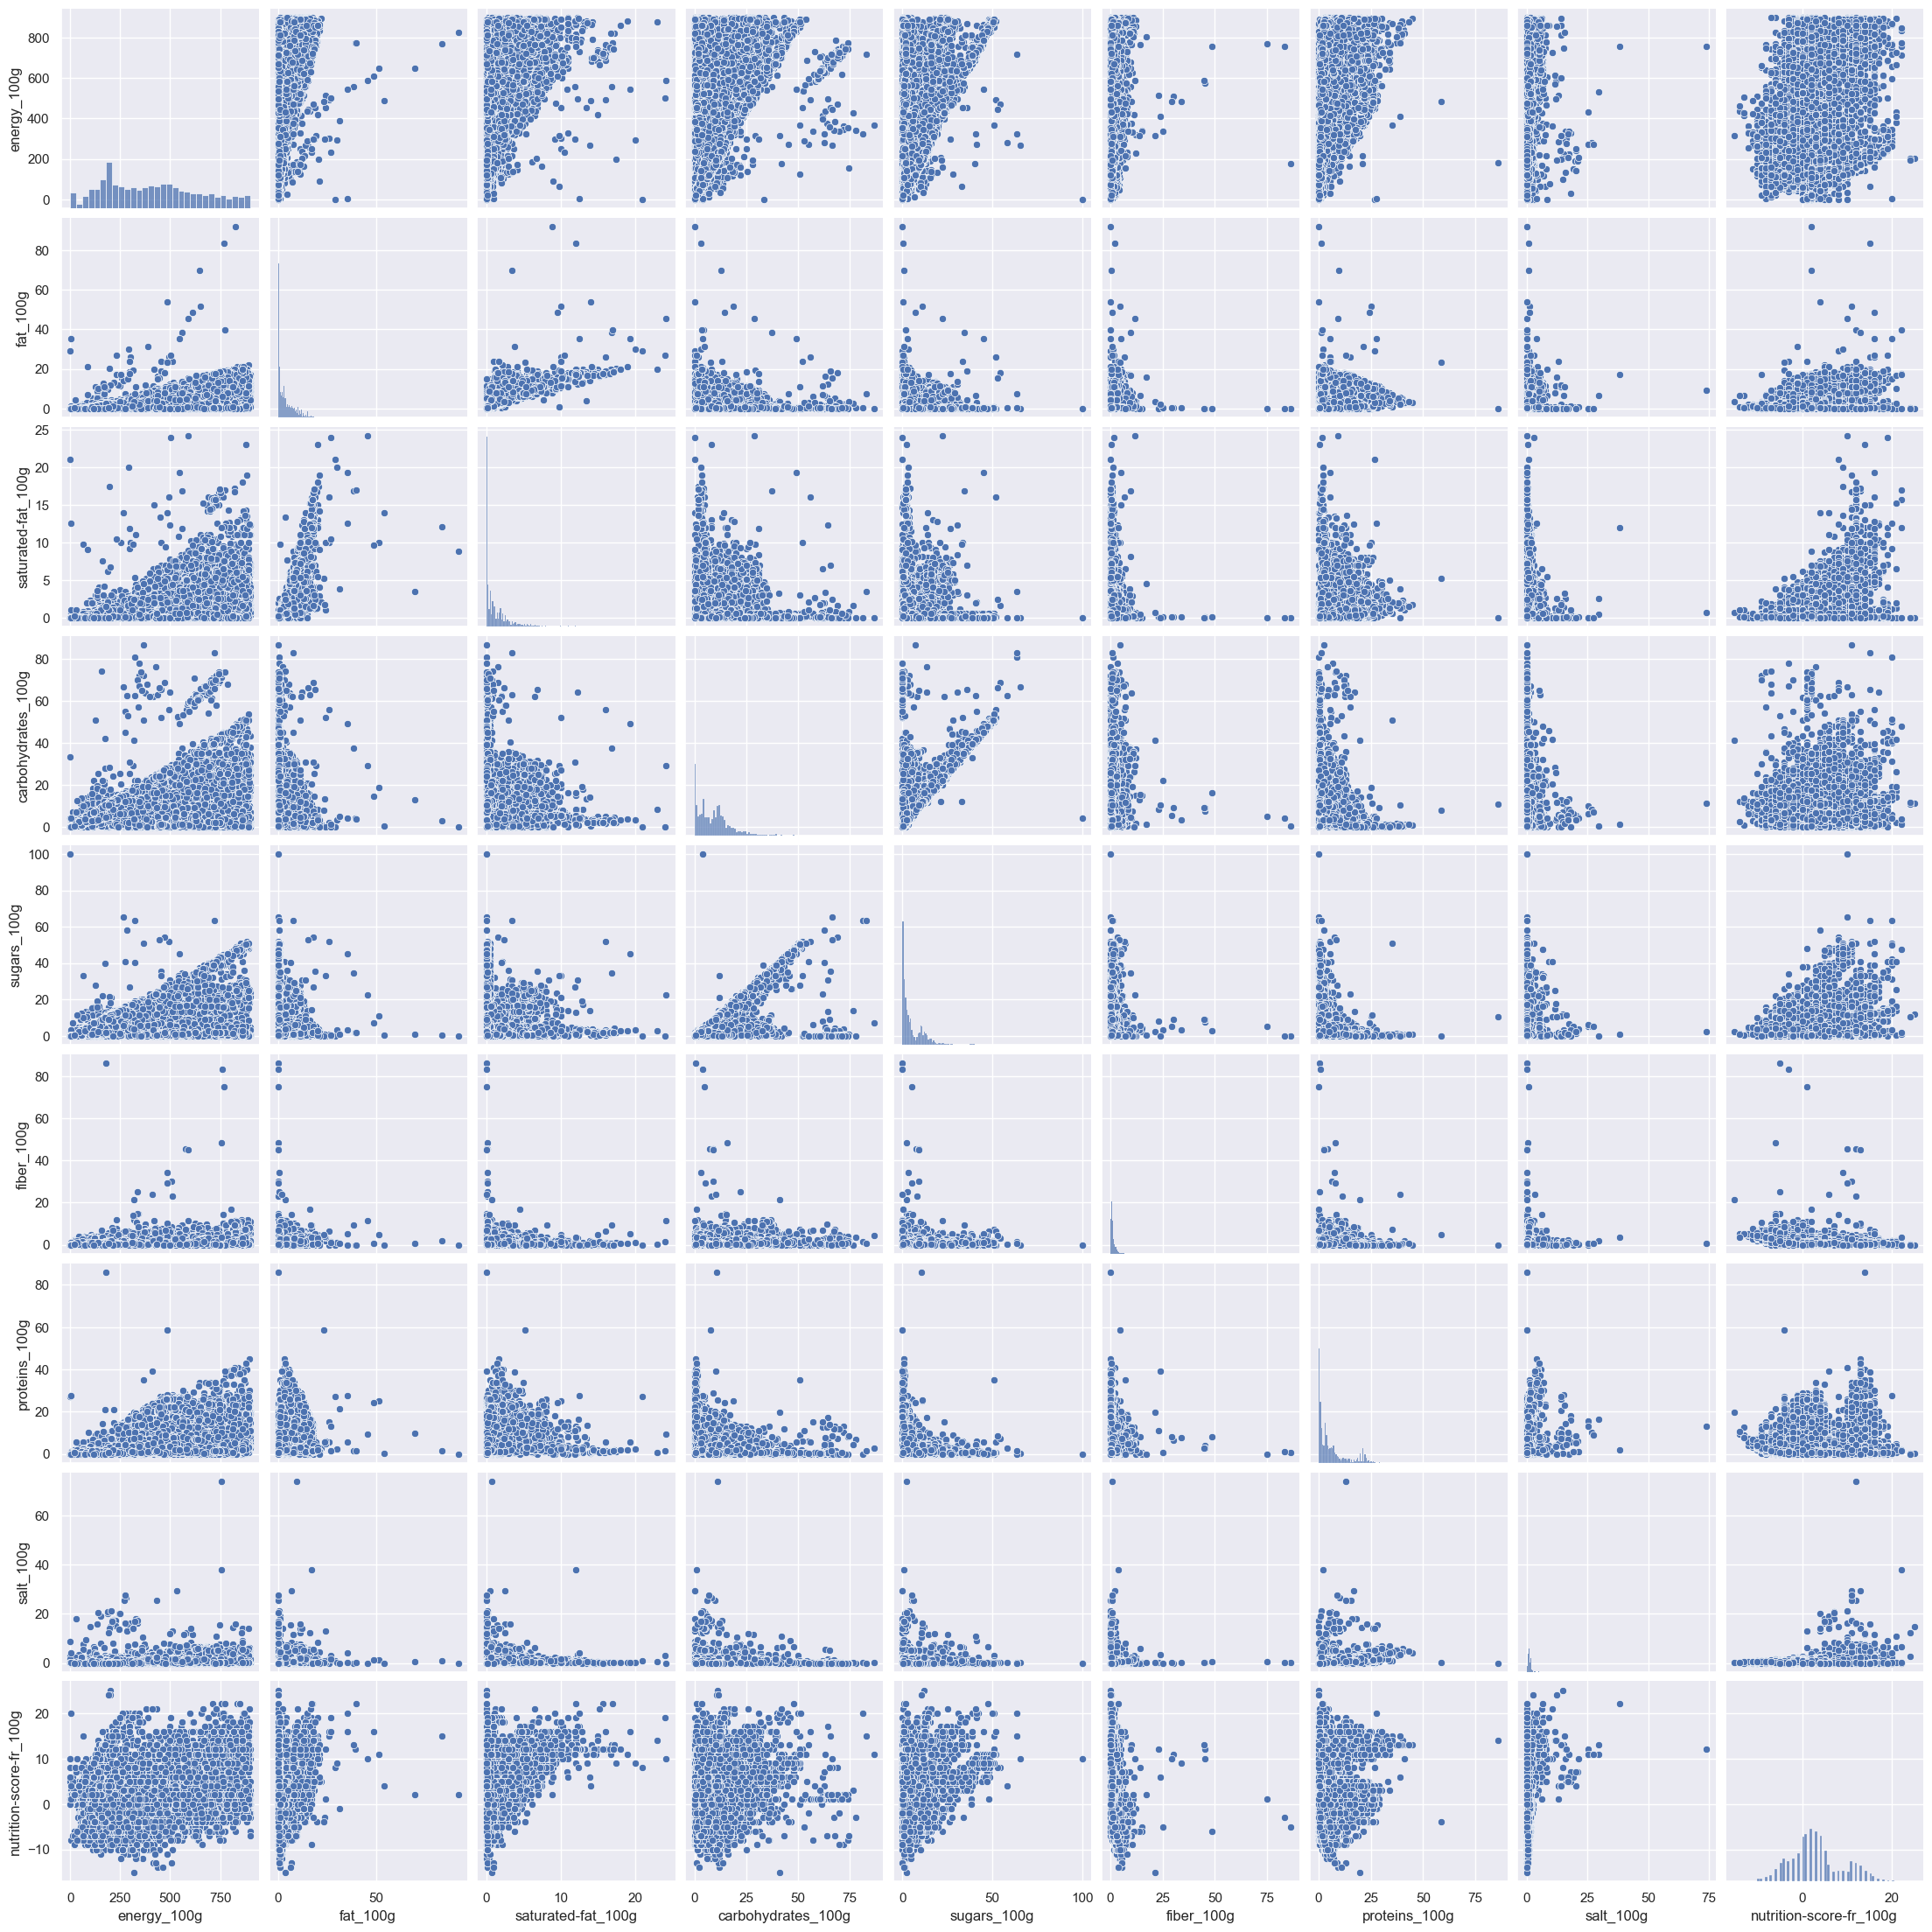

In [77]:
sns.pairplot(products_food[colonnes_numeriques])

Text(0.5, 0.98, 'Diagramme de dispersion des quantités')

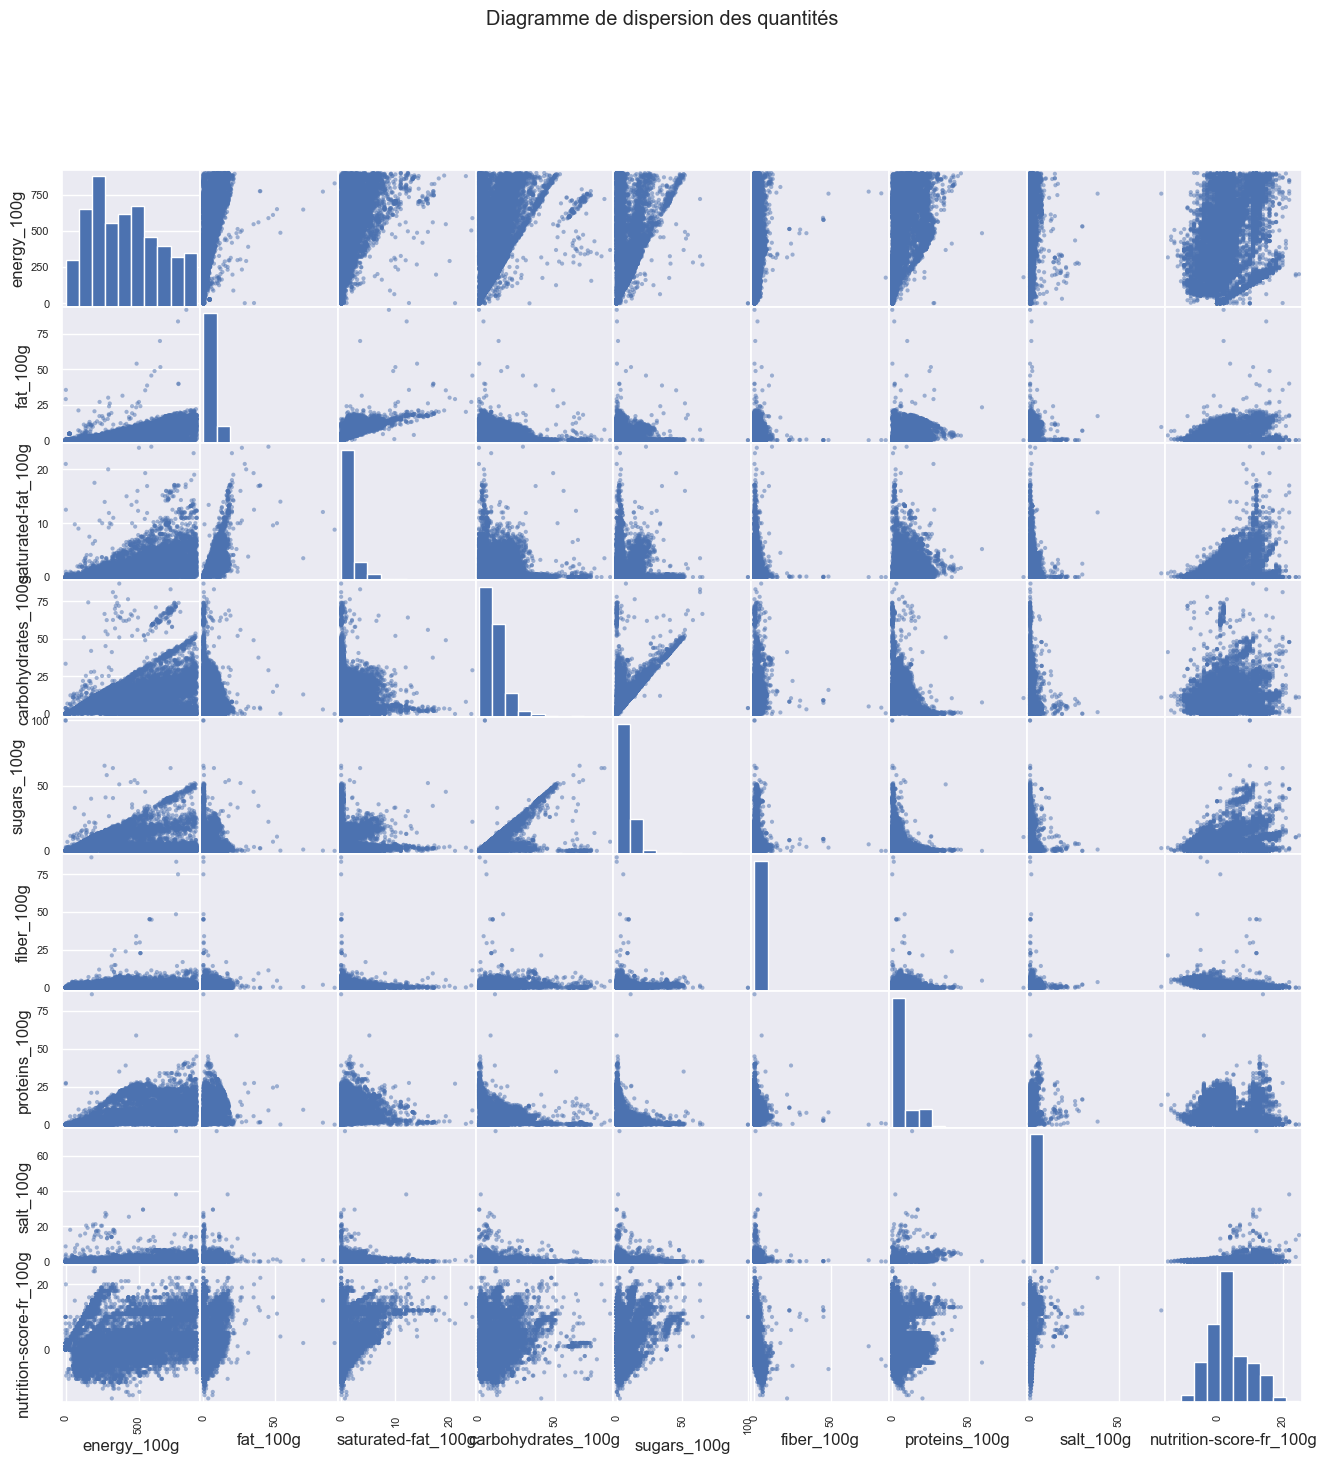

In [78]:
scatter_matrix(products_food[colonnes_numeriques], figsize=(16,16))
plt.suptitle('Diagramme de dispersion des quantités')

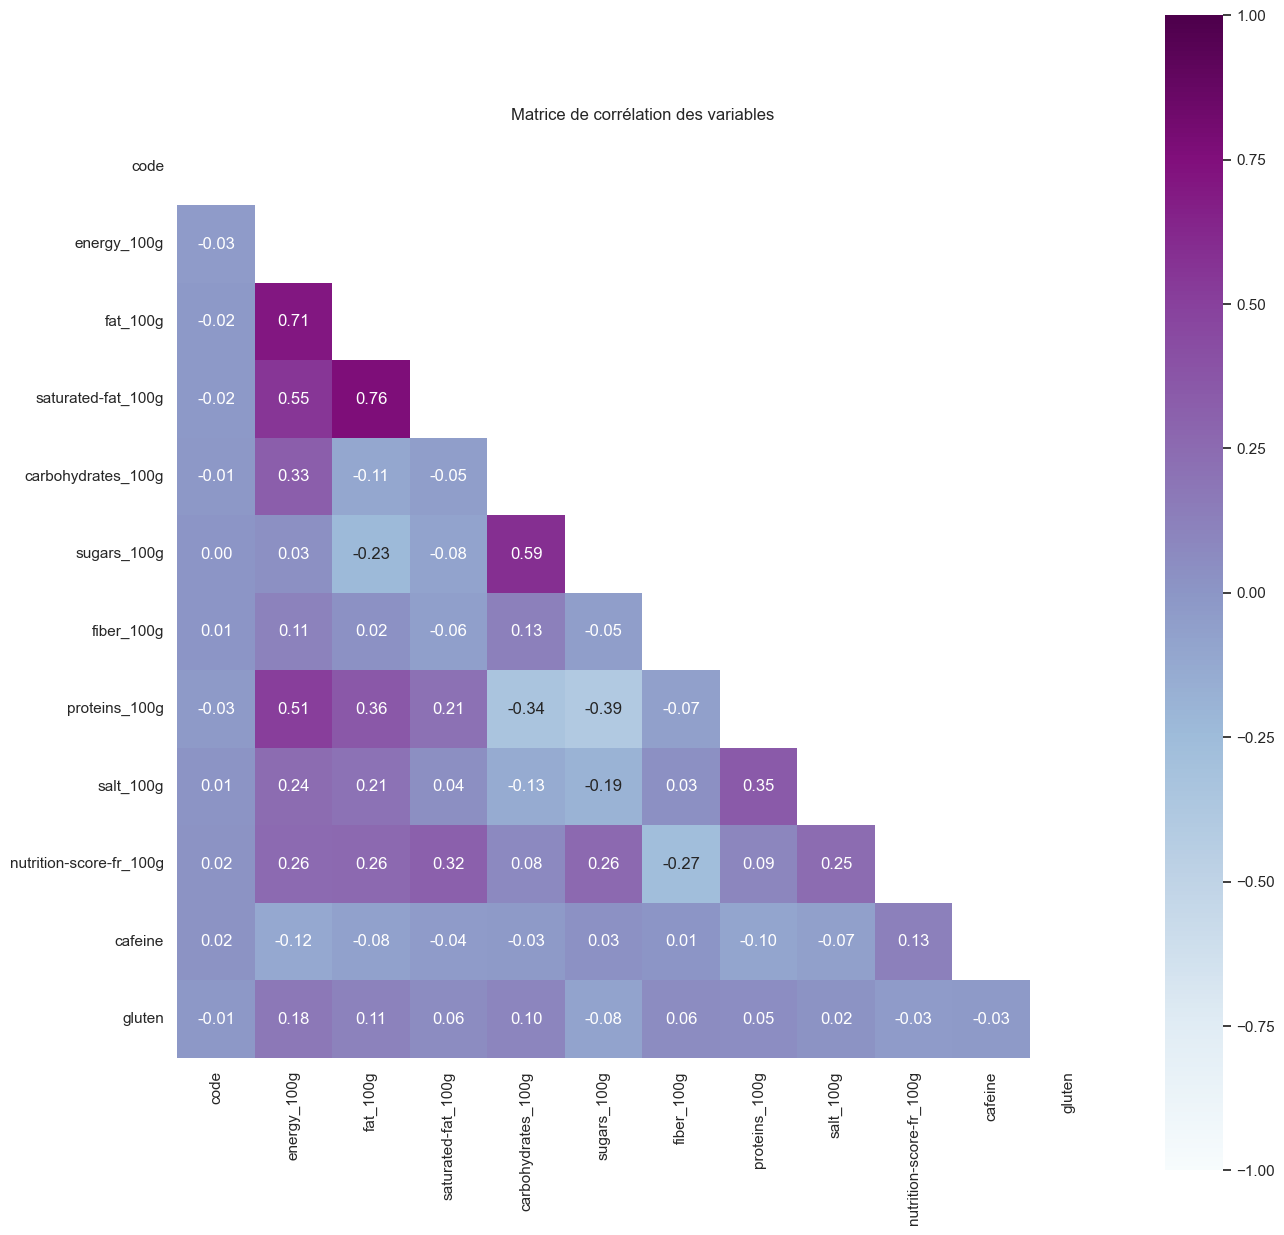

In [79]:
correlation_matrix(products_food, "Matrice de corrélation des variables", (15,15))

Cette analyse des données a révélé des corrélations significatives entre plusieurs variables clés de notre jeu de données nutritionnel. Plus précisément, j'ai observé une corrélation positive de 0,71 entre ``energy_100g`` et ``fat_100g``. Cette forte corrélation est cohérente avec le fait que les graisses contribuent de manière significative à l'apport énergétique des produits alimentaires.

* J'ai identifié une corrélation substantielle de 0,73 entre ``fat_100g`` et ``saturated-fat_100g``. Cette observation est également logique, car les graisses saturées sont une catégorie spécifique de graisses et leur présence est étroitement liée à la teneur totale en matières grasses.

* Une autre corrélation notable a été mise en évidence, avec un coefficient de 0,56, entre ``sugars_100g`` et ``carbohydrates_100g``. Cette corrélation reflète la relation intrinsèque entre les sucres et les glucides, car les sucres sont une composante des glucides totaux.

Il convient de noter que ``fat_100g`` présente une corrélation significative de 0,73 avec ``saturated-fat_100g``, tandis que ``carbohydrates_100g`` est corrélé à ``sugar_100g`` avec un coefficient de 0,56. Ces corrélations renforcent l'idée que les graisses saturées et les sucres sont des sous-catégories de graisses et de glucides, respectivement.

*Pour mieux comprendre ces relations, j'envisage d'effectuer des analyses de régression linéaire. Cela nous permettra d'explorer plus en profondeur la nature des liens entre ces variables nutritionnelles clés."*

## Test de normalité <a class="anchor" id="test_normalité"></a>

[Retour au sommaire](#sommaire) 

In [80]:
variables_test = products_food[["energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g"]]
pg.normality(variables_test, method='normaltest')

W  pval  normal
energy_100g          2548.265743   0.0   False
fat_100g            10358.562683   0.0   False
saturated-fat_100g  10522.194404   0.0   False
carbohydrates_100g   8095.903848   0.0   False
sugars_100g          9166.000128   0.0   False
fiber_100g          31823.228926   0.0   False
proteins_100g        4356.310047   0.0   False
salt_100g           28422.694437   0.0   False

In [81]:
pg.normality(variables_test, method="jarque_bera")

W  pval  normal
energy_100g         7.722191e+02   0.0   False
fat_100g            4.266186e+05   0.0   False
saturated-fat_100g  1.692236e+05   0.0   False
carbohydrates_100g  7.015854e+04   0.0   False
sugars_100g         1.091348e+05   0.0   False
fiber_100g          2.060547e+08   0.0   False
proteins_100g       1.063196e+04   0.0   False
salt_100g           1.091354e+08   0.0   False

Ces résultats indiquent que les résidus de régression pour toutes les variables ("energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g" et "salt_100g") ne suivent pas une distribution normale. Les valeurs p très faibles (0.0) suggèrent que les résidus ne sont pas normalement distribués. Cela peut indiquer que le modèle de régression linéaire peut ne pas être le meilleur modèle pour ces données ou que d'autres transformations sont nécessaires pour rendre les résidus plus proches d'une distribution normale.

## Distribution entre variable quantitatives <a class="anchor" id="bivariée_quantitatives"></a>

[Retour au sommaire](#sommaire) 

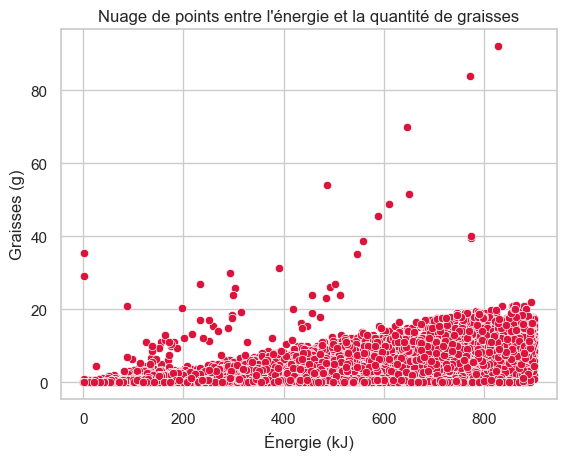

In [82]:
# Utilisation de la fonction avec les variables et la couleur souhaitée.
create_scatterplot(data=products_food, x="energy_100g", y="fat_100g", title="Nuage de points entre l'énergie et la quantité de graisses", x_label="Énergie (kJ)", y_label="Graisses (g)", point_color="#DC143C")

In [83]:
pg.linear_regression(X=products_food["energy_100g"], y=products_food["fat_100g"], add_intercept=True, alpha=0.05)

names      coef        se           T           pval       r2  \
0    Intercept -1.788241  0.050573  -35.359606  2.115779e-263  0.50521   
1  energy_100g  0.013410  0.000107  125.421089   0.000000e+00  0.50521   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.505178 -1.887370  -1.689112  
1  0.505178  0.013201   0.013620

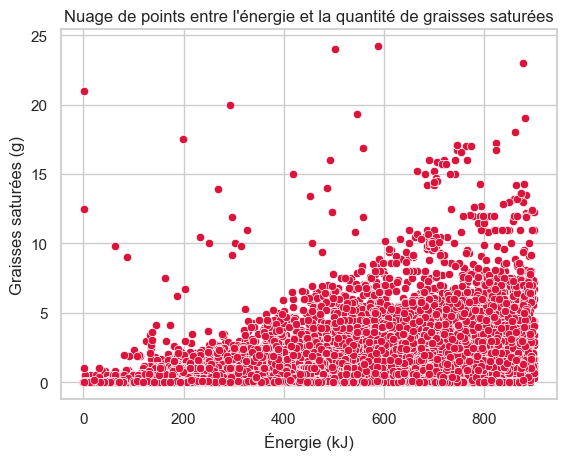

In [84]:
create_scatterplot(data=products_food, x="energy_100g", y="saturated-fat_100g", title="Nuage de points entre l'énergie et la quantité de graisses saturées", x_label="Énergie (kJ)", y_label="Graisses saturées (g)", point_color="#DC143C")

In [85]:
pg.linear_regression(X=products_food["energy_100g"], y=products_food["saturated-fat_100g"], add_intercept=True, alpha=0.05)

names      coef        se          T          pval        r2  \
0    Intercept -0.594496  0.027969 -21.255375  7.684290e-99  0.299228   
1  energy_100g  0.004796  0.000059  81.106787  0.000000e+00  0.299228   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.299182 -0.649318  -0.539673  
1  0.299182  0.004680   0.004912

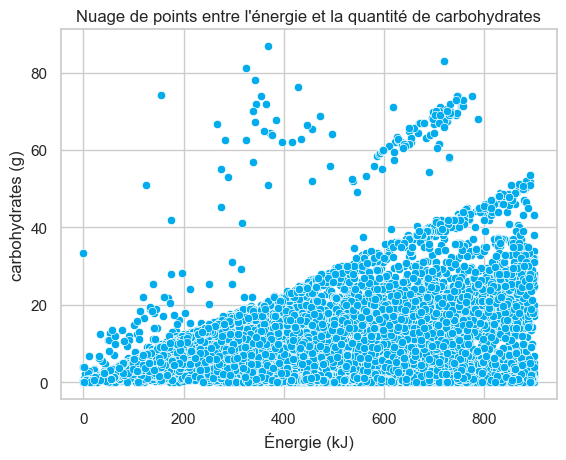

In [86]:
create_scatterplot(data=products_food, x="energy_100g", y="carbohydrates_100g", title="Nuage de points entre l'énergie et la quantité de carbohydrates", x_label="Énergie (kJ)", y_label="carbohydrates (g)", point_color="#00ACED")

In [87]:
pg.linear_regression(X=products_food["energy_100g"], y=products_food["carbohydrates_100g"], add_intercept=True, alpha=0.05)

names      coef        se          T           pval        r2  \
0    Intercept  4.476310  0.150743  29.694910  1.747217e-188  0.107364   
1  energy_100g  0.013719  0.000319  43.046459   0.000000e+00  0.107364   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.107306  4.180835   4.771785  
1  0.107306  0.013095   0.014344

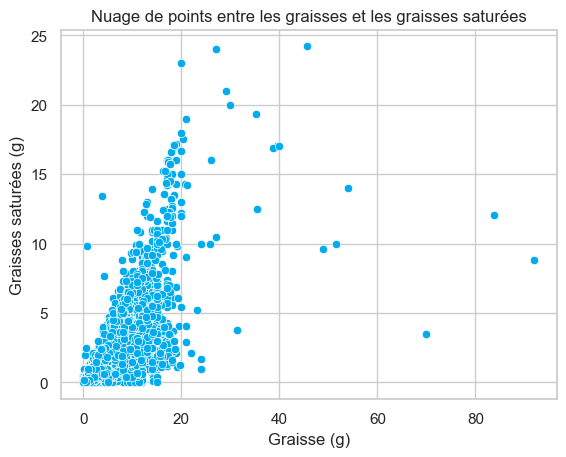

In [88]:
create_scatterplot(data=products_food, x="fat_100g", y="saturated-fat_100g", title="Nuage de points entre les graisses et les graisses saturées", x_label="Graisse (g)", y_label="Graisses saturées (g)", point_color="#00ACED")

In [89]:
pg.linear_regression(X=products_food["fat_100g"], y=products_food["saturated-fat_100g"], add_intercept=True, alpha=0.05)

names      coef        se           T     pval        r2    adj_r2  \
0  Intercept  0.062224  0.014092    4.415621  0.00001  0.577073  0.577045   
1   fat_100g  0.353019  0.002435  144.986391  0.00000  0.577073  0.577045   

   CI[2.5%]  CI[97.5%]  
0  0.034602   0.089845  
1  0.348247   0.357792

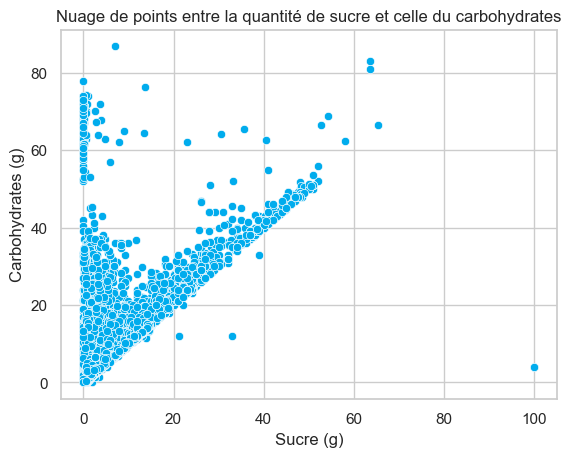

In [90]:
create_scatterplot(data=products_food, x="sugars_100g", y="carbohydrates_100g", title="Nuage de points entre la quantité de sucre et celle du carbohydrates", x_label="Sucre (g)", y_label="Carbohydrates (g)", point_color="#00ACED")

In [91]:
pg.linear_regression(X=products_food["sugars_100g"], y=products_food["carbohydrates_100g"], add_intercept=True, alpha=0.05)

names      coef        se          T  pval        r2    adj_r2  \
0    Intercept  5.475259  0.081776  66.954470   0.0  0.349446  0.349404   
1  sugars_100g  0.788452  0.008667  90.968988   0.0  0.349446  0.349404   

   CI[2.5%]  CI[97.5%]  
0  5.314969   5.635549  
1  0.771463   0.805441

## Variables qualitatives et quantitatives <a class="anchor" id="bivariée_quanti_quali"></a>

[Retour au sommaire](#sommaire) 

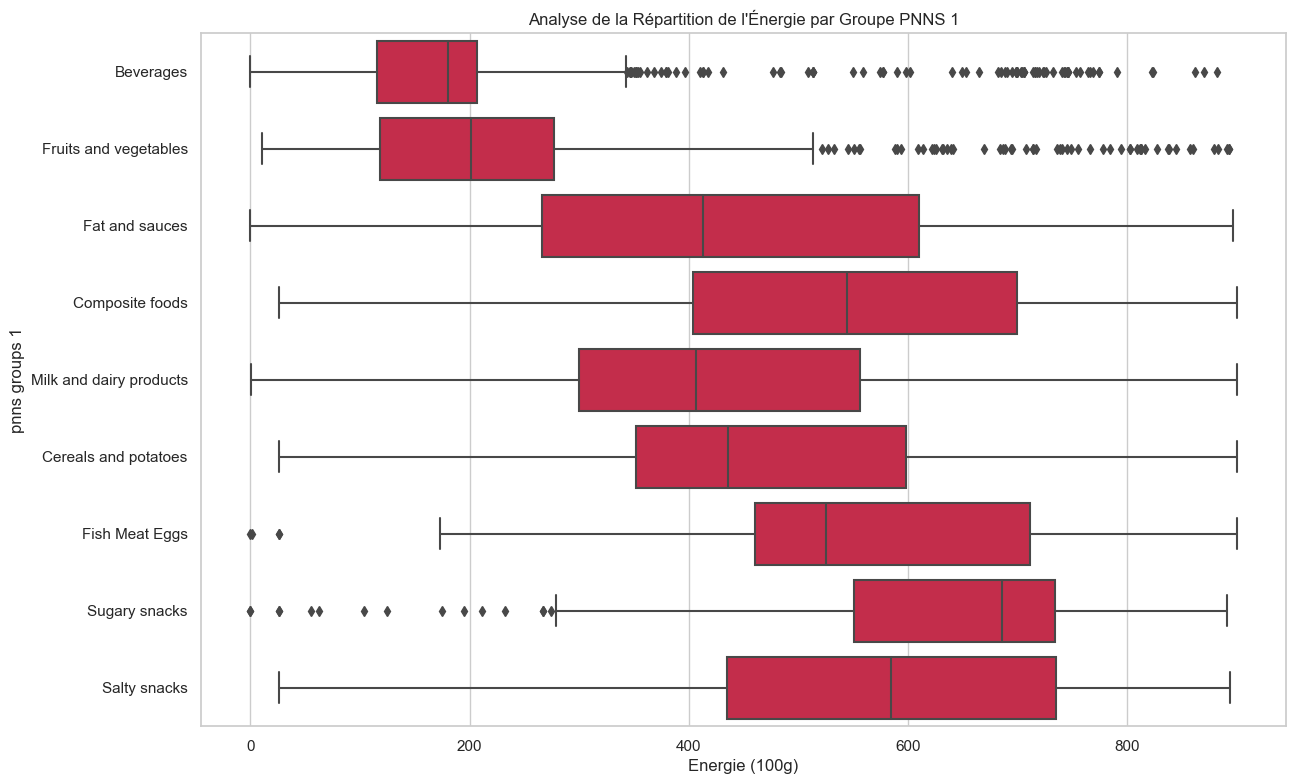

In [92]:
# Exemple d'utilisation de la fonction :
# Remplacez ces valeurs par les données spécifiques de votre analyse.
create_boxplot(products_food, "energy_100g", "pnns_groups_1", "Analyse de la Répartition de l'Énergie par Groupe PNNS 1", "Energie (100g)", "pnns groups 1", "crimson")

Comme on peut s'en douter Les groupes ``Fruits and Vegetables`` ainsi que ``Beverages`` présentent les apports caloriques les moins élevés, tandis que les ``Salty snacks`` et les ``Sugary Snacks`` affichent la plus forte densité calorique, illustrant ainsi une variation significative des valeurs énergétiques au sein de ces différentes catégories d'aliments.

In [93]:
pg.anova(data=products_food, dv="energy_100g", between="pnns_groups_1")

Source  ddof1  ddof2            F  p-unc       np2
0  pnns_groups_1      8  15399  1730.646844    0.0  0.473434

Le choix d'une analyse de variance (ANOVA) dans ce contexte, spécifiquement, permet d'évaluer si les moyennes des valeurs d'énergie pour 100 g (energy_100g) diffèrent significativement entre les différents groupes PNNS 1 (pnns_groups_1). Plus précisément, cette ANOVA vérifie si la variation des valeurs d'énergie est principalement due à la différenciation entre les groupes PNNS 1.

Analyse des résultats :

* Source : Il s'agit de la source de variation, qui est le facteur ``pnns_groups_1``.

* ddof1 : Le nombre de degrés de liberté associé au facteur ``pnns_groups_1``. Dans ce cas, il est de 12, car il y a 13 groupes PNNS 1 en tout.

* ddof2 : Le nombre de degrés de liberté de l'erreur (ou résiduel) de l'ANOVA. Il est de 17305, indiquant la variabilité restante dans les données.

* F : La statistique F est un rapport de deux variances (la variance entre les groupes et la variance résiduelle). Dans ce cas, le rapport est élevé (1096.405) et est significatif (p-value < 0.05), suggérant que les moyennes des valeurs d'énergie sont différentes entre les groupes PNNS 1.

* p-unc : La p-valeur (p-unc) est très proche de zéro (0.0), ce qui indique que l'effet de la catégorie "pnns_groups_1" sur la valeur d'énergie est très significatif.

* np2 : L'indice partiel carré (ηp²) est de 0.431913, ce qui signifie que 43,19 % de la variance totale dans les valeurs d'énergie est expliquée par la catégorie "pnns_groups_1". Cela suggère que la catégorie PNNS 1 a un effet substantiel sur la variation des valeurs d'énergie.

*Cette ANOVA montre que les groupes PNNS 1 ont un effet significatif sur la variation des valeurs d'énergie, avec des moyennes significativement différentes entre les groupes.*

In [94]:
variables = ["fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g"]
for variable in variables:
    anova_result = pg.anova(data=products_food, dv=variable, between="pnns_groups_1")
    print(f"Analyse ANOVA pour la variable '{variable}':")
    print(anova_result)

Analyse ANOVA pour la variable 'fat_100g':
          Source  ddof1  ddof2          F  p-unc       np2
0  pnns_groups_1      8  15399  720.46415    0.0  0.272352
Analyse ANOVA pour la variable 'saturated-fat_100g':
          Source  ddof1  ddof2          F  p-unc       np2
0  pnns_groups_1      8  15399  475.96873    0.0  0.198251
Analyse ANOVA pour la variable 'carbohydrates_100g':
          Source  ddof1  ddof2            F  p-unc       np2
0  pnns_groups_1      8  15399  1524.512648    0.0  0.441966
Analyse ANOVA pour la variable 'sugars_100g':
          Source  ddof1  ddof2            F  p-unc       np2
0  pnns_groups_1      8  15399  1282.109014    0.0  0.399787
Analyse ANOVA pour la variable 'fiber_100g':
          Source  ddof1  ddof2           F  p-unc       np2
0  pnns_groups_1      8  15399  361.712385    0.0  0.158189
Analyse ANOVA pour la variable 'proteins_100g':
          Source  ddof1  ddof2           F  p-unc       np2
0  pnns_groups_1      8  15399  6061.97847    0.0  0

Les résultats de l'analyse ANOVA montrent que la variable ``pnns_groups_1`` est significative pour toutes les variables que j'ai testées. Le p-value (p-unc) est inférieur à 0.05 pour chacune des variables, ce qui indique que la variable ``pnns_groups_1`` a un effet significatif sur les variables testées. De plus, le coefficient d'étadétermination partiel (np2) est assez élevé pour la plupart des variables, ce qui signifie que la variation de ``pnns_groups_1`` explique une proportion importante de la variance des variables.

*La variable ``pnns_groups_1`` est significative et a un impact important sur les variables testées. Elle joue un rôle significatif dans l'explication de la variance de ces variables.*

In [95]:
pg.kruskal(data=products_food, dv="energy_100g", between="pnns_groups_1")

Source  ddof1            H  p-unc
Kruskal  pnns_groups_1      8  7878.966212    0.0

Les medianes des différents groupes est égale

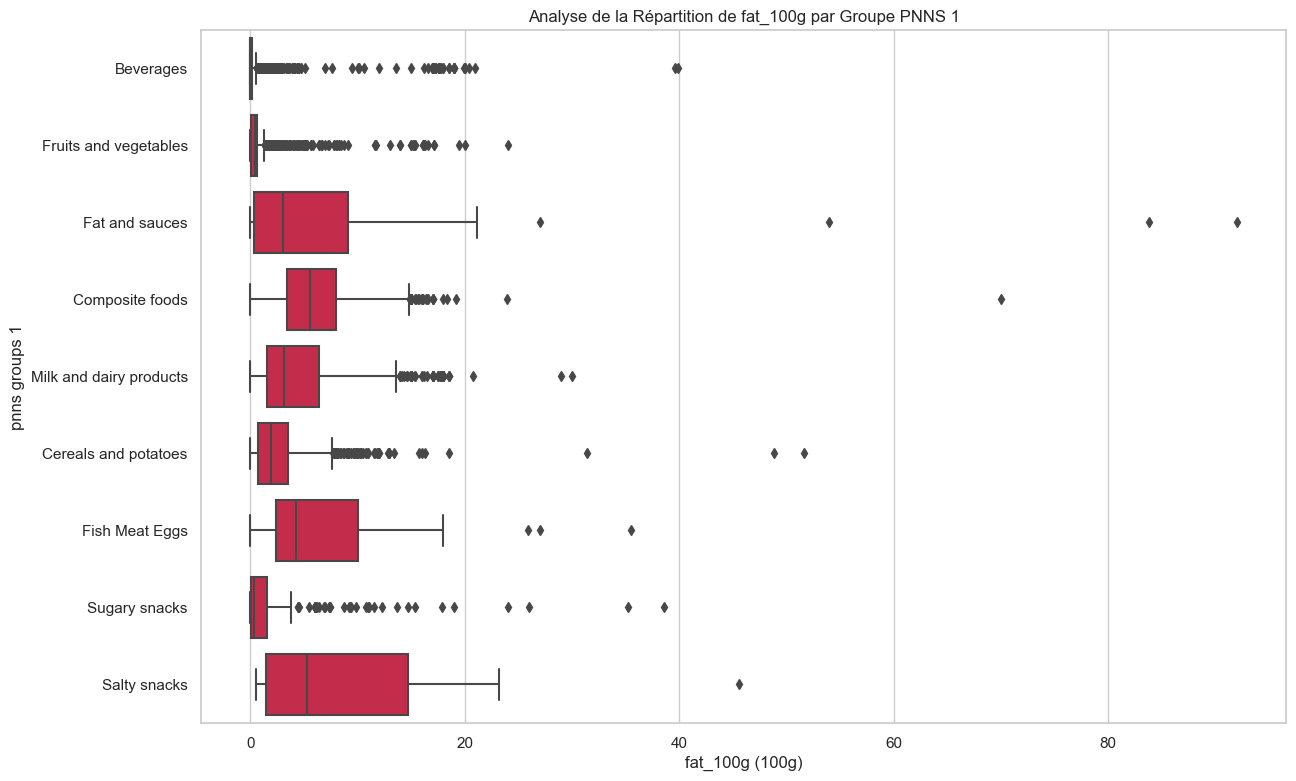

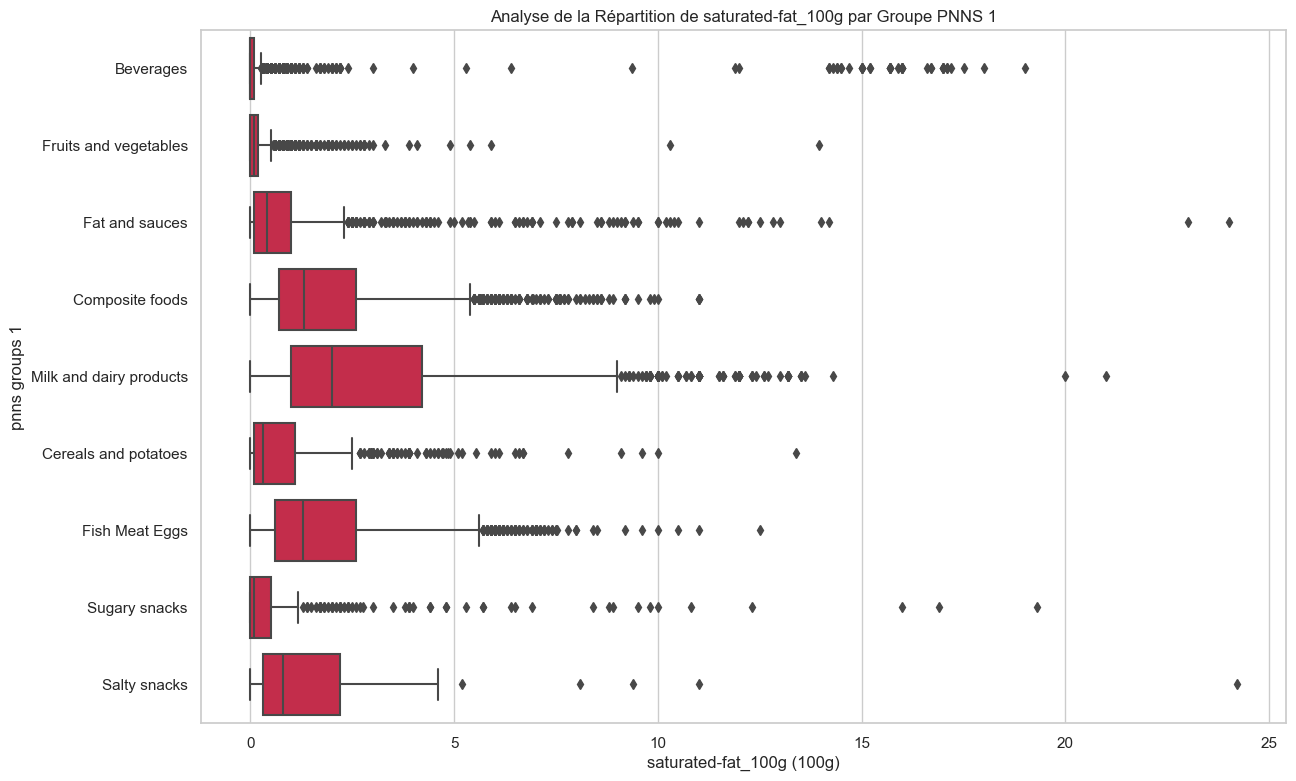

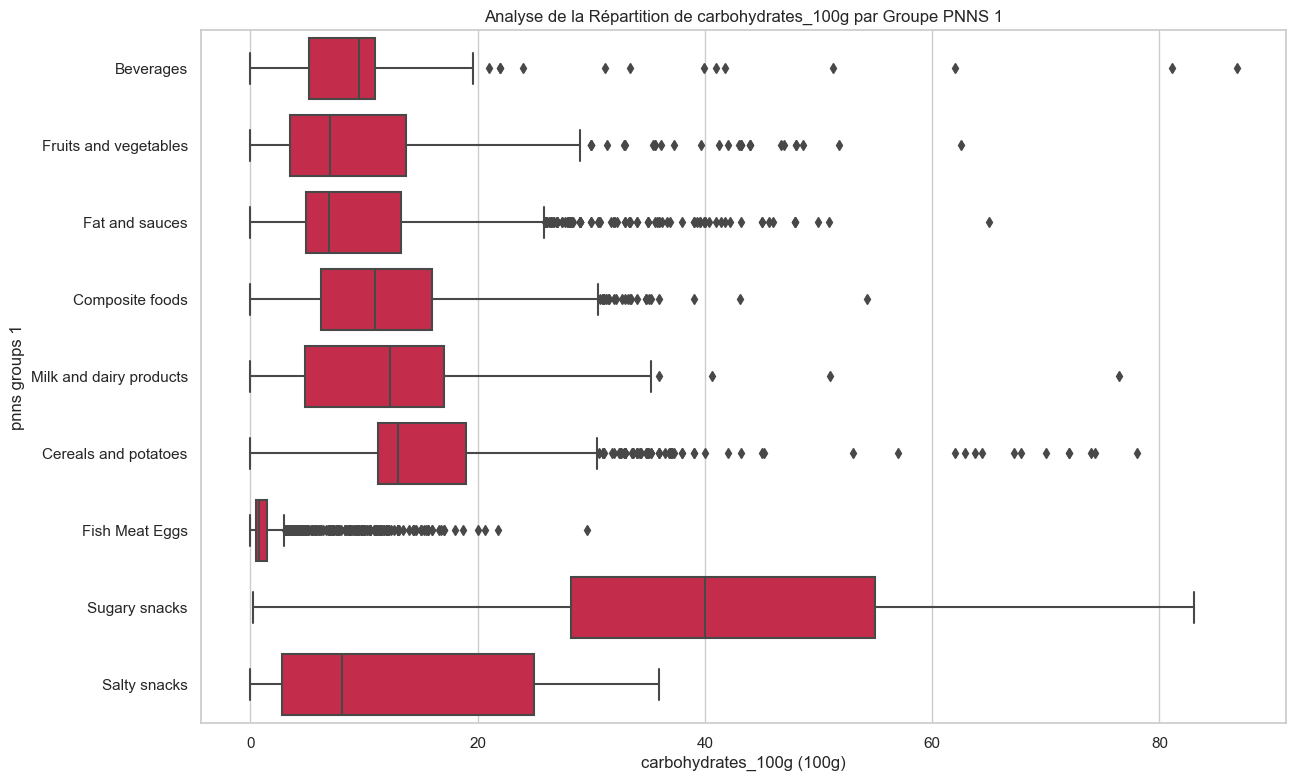

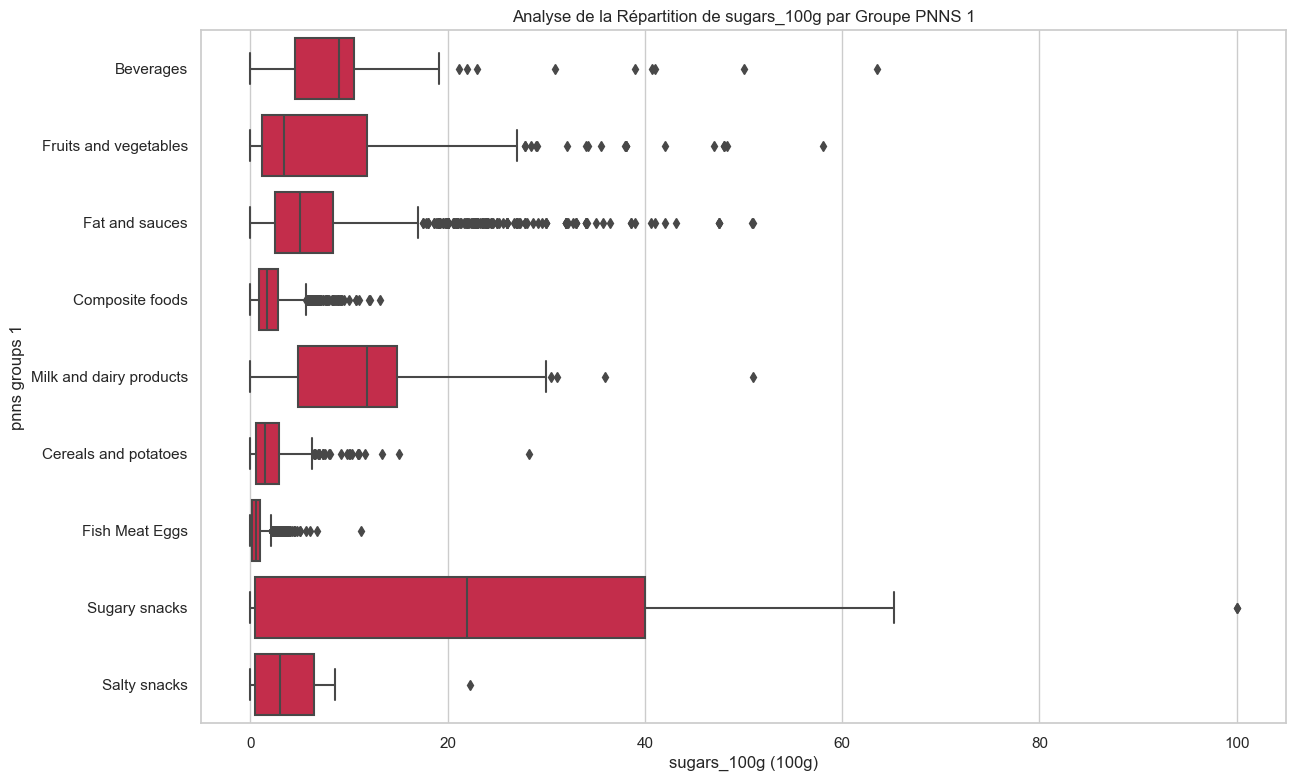

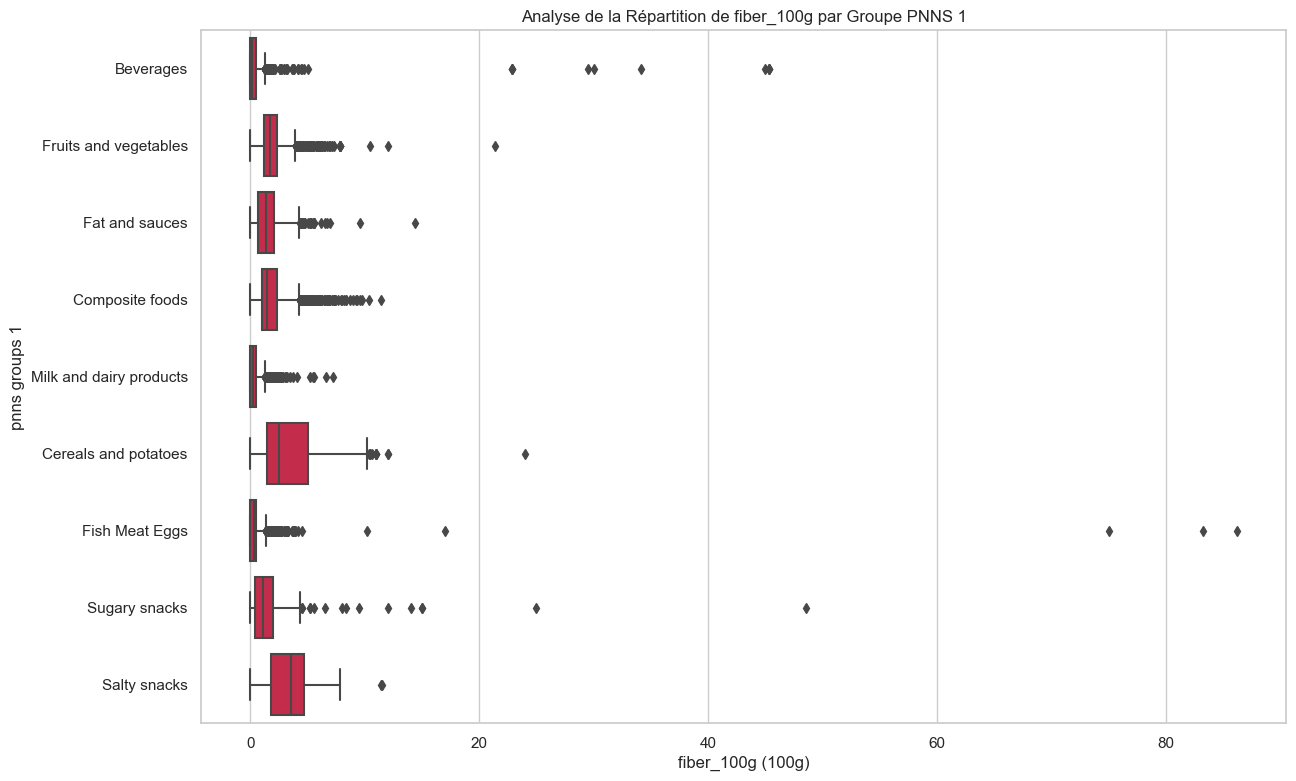

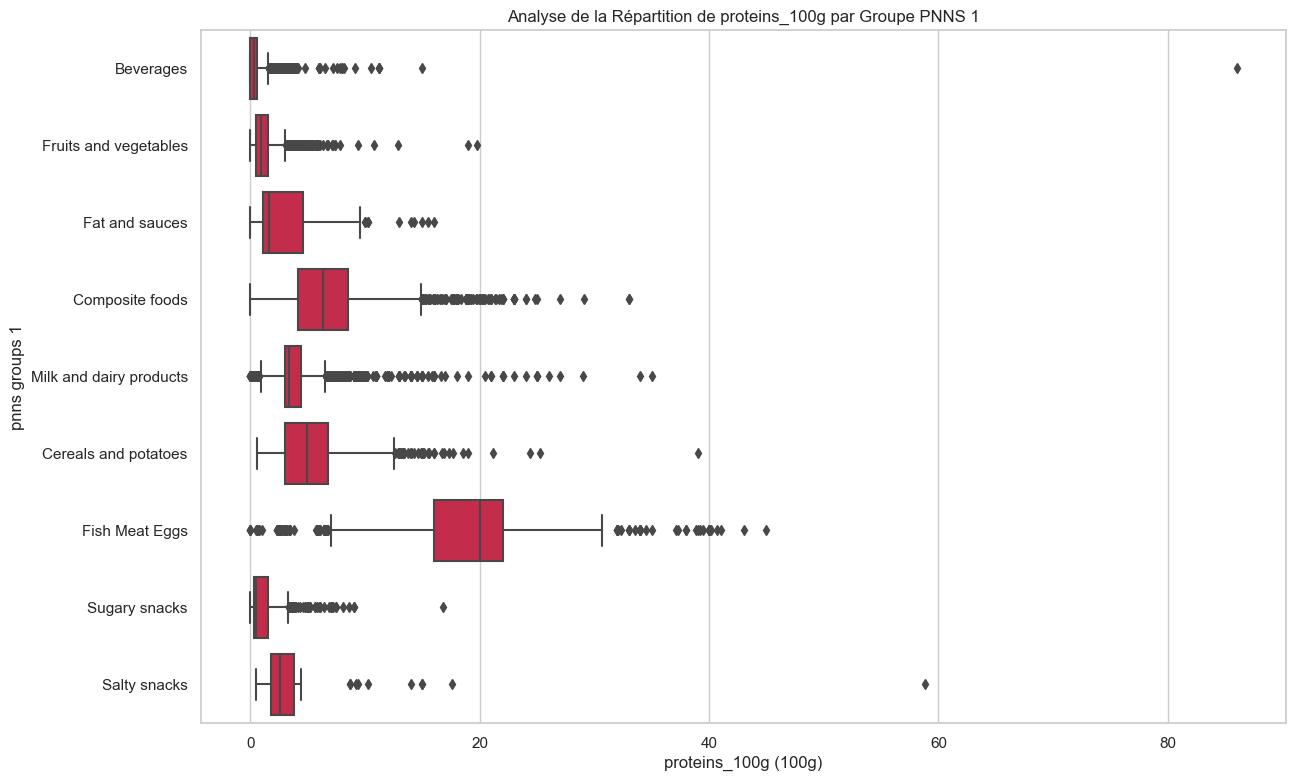

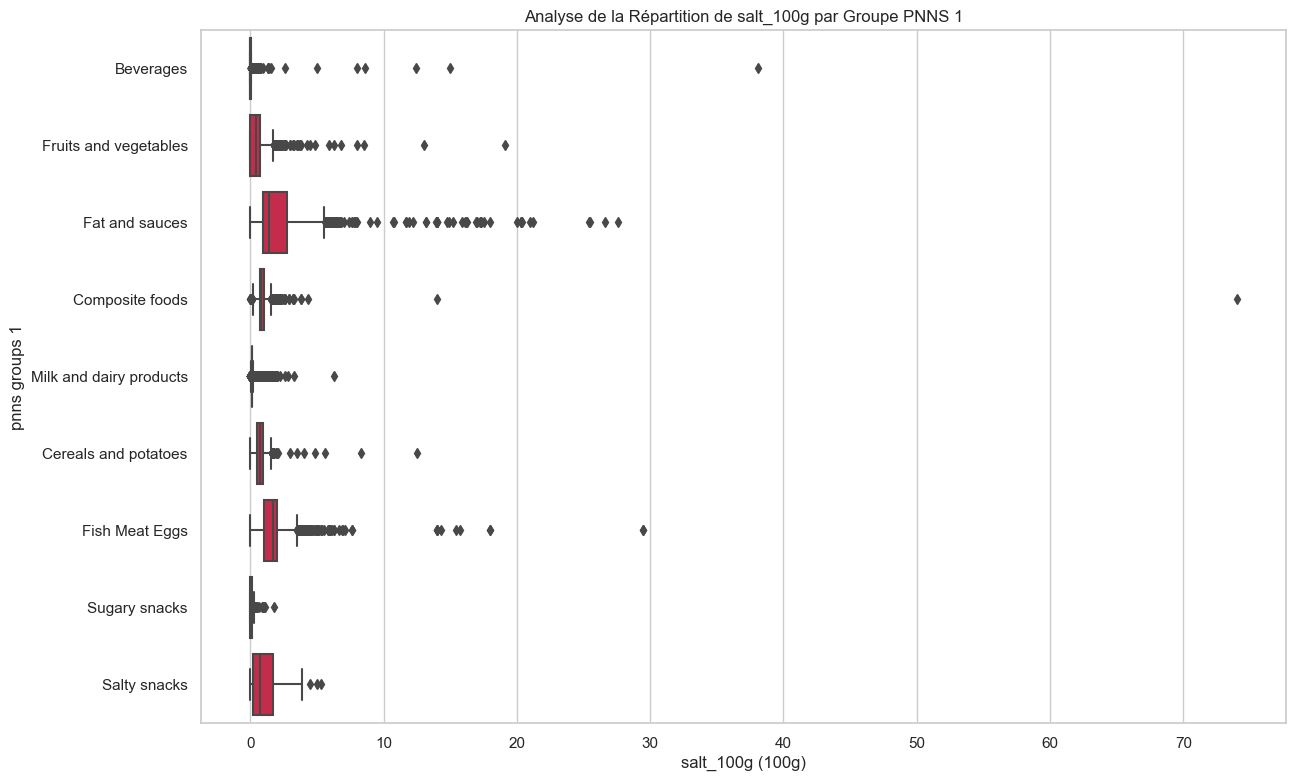

In [96]:
variables_to_analyze = ["fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g"]

for variable in variables_to_analyze:
    create_boxplot(products_food, variable, "pnns_groups_1", f"Analyse de la Répartition de {variable} par Groupe PNNS 1", f"{variable} (100g)", "pnns groups 1", "crimson")

## Entre variables qualitatives <a class="anchor" id="bivariée_qualitatives"></a>

[Retour au sommaire](#sommaire) 

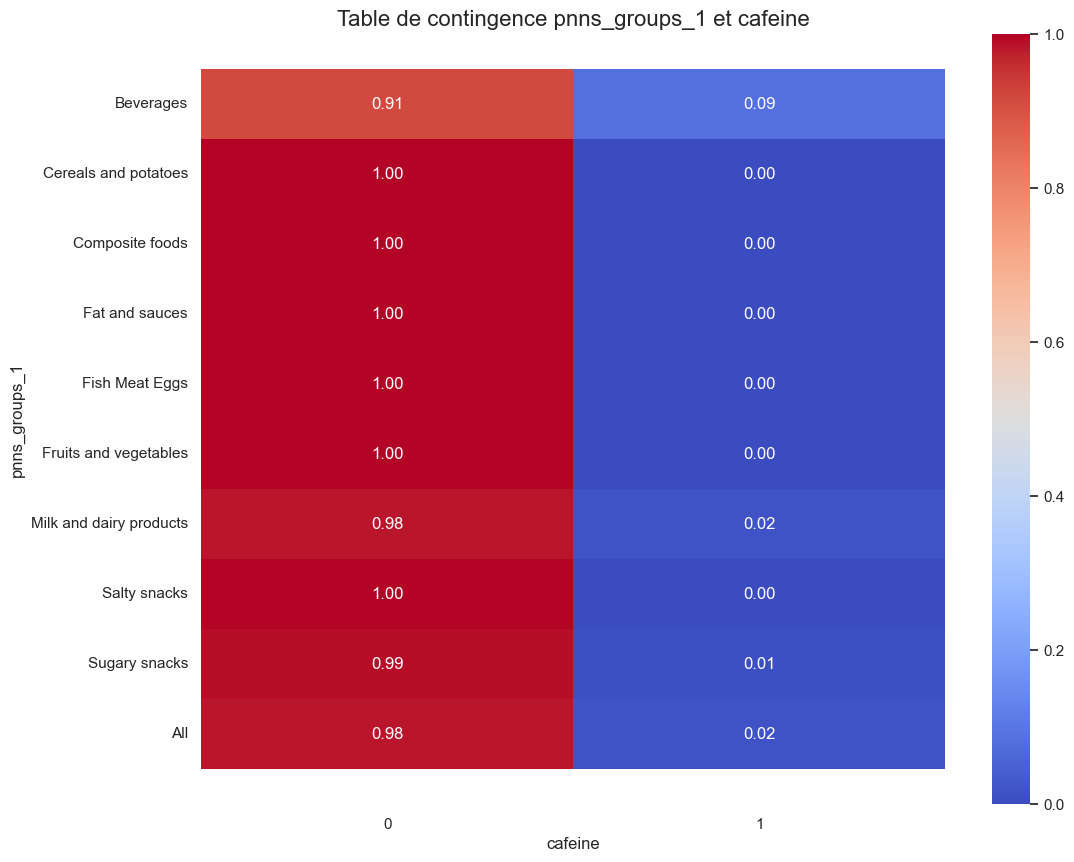

In [97]:
create_contingency_heatmap(products_food, 'pnns_groups_1', 'cafeine', 'Table de contingence pnns_groups_1 et cafeine', cmap="coolwarm")

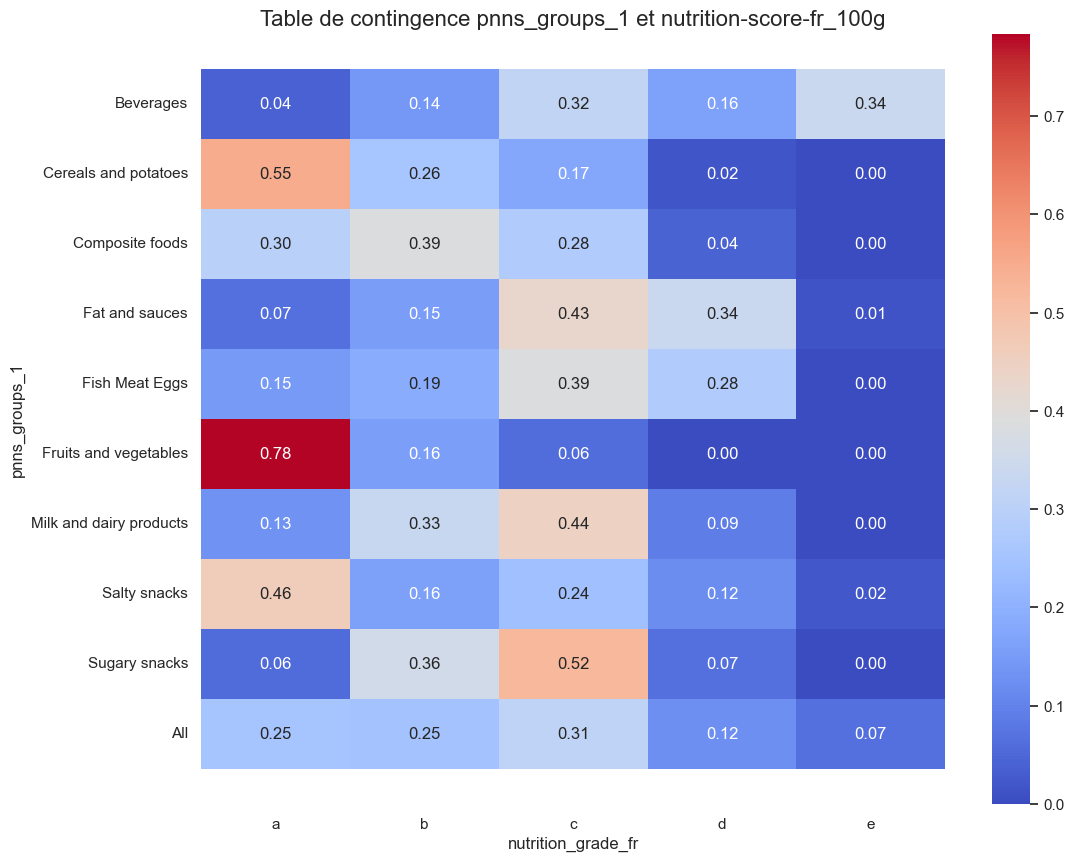

In [98]:
create_contingency_heatmap(products_food, 'pnns_groups_1', 'nutrition_grade_fr', 'Table de contingence pnns_groups_1 et nutrition-score-fr_100g', cmap="coolwarm")

# ACP <a class="anchor" id="acp"></a>

[Retour au sommaire](#sommaire) 

## Méthode du coude <a class="anchor" id="coude"></a>

[Retour au sommaire](#sommaire) 

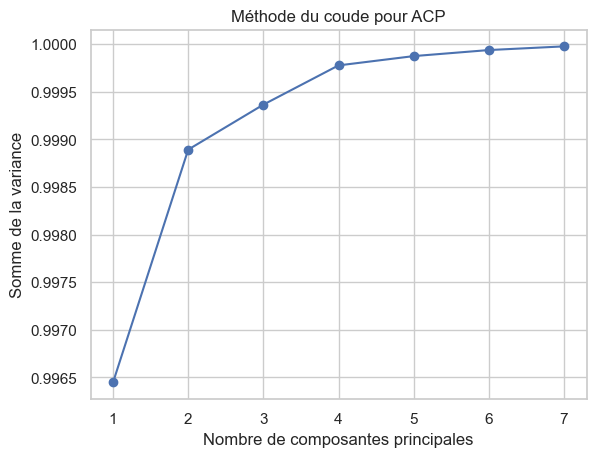

In [99]:
data_pca = products_food[["energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g"]]

n_comp = 8

X = data_pca.values
features = data_pca.columns
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

my_pca_coude(data_pca)

## Analyse en Composantes Principales (PCA) avec Visualisation : Exploration et Interprétation des Données Multidimensionnelles <a class="anchor" id="pca"></a>

[Retour au sommaire](#sommaire) 

Explained Variance Ratio: [35. 58. 72. 84.]


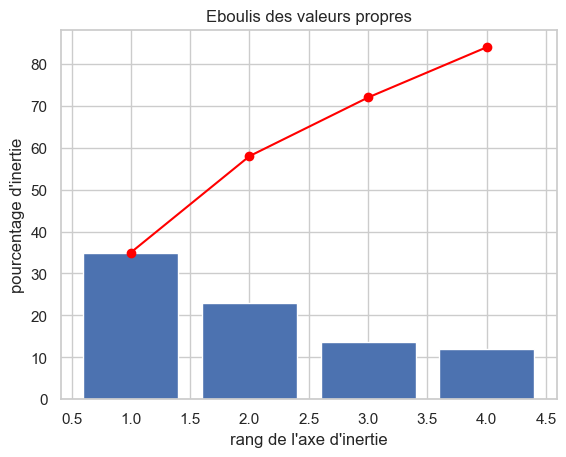

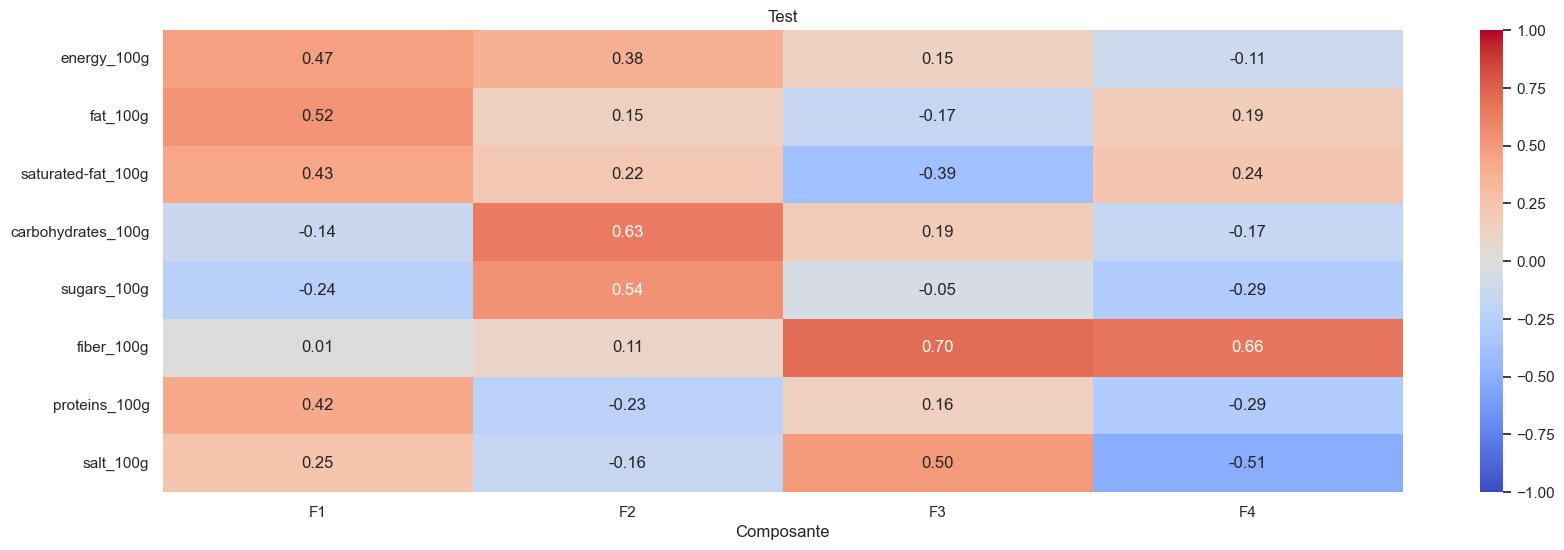

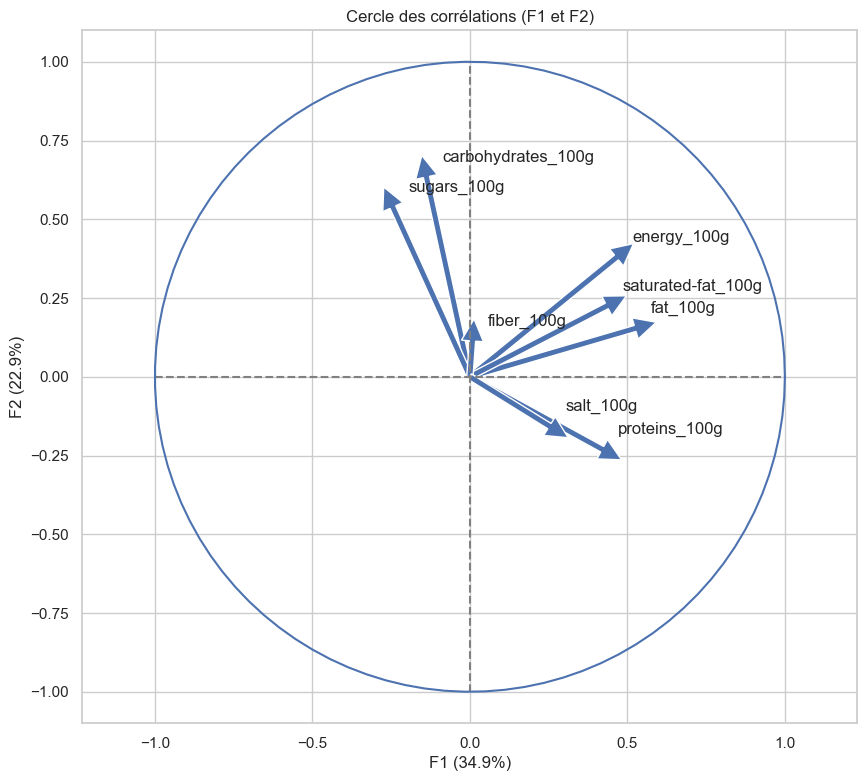

In [100]:
my_pca(4, data_pca, (0, 1), True)

In [101]:
f1= pca.components_[0]
print(f1)
f2= pca.components_[1]
print(f2)

[ 0.46536687  0.52460032  0.43475305 -0.13782005 -0.24455793  0.00825962
  0.42016093  0.25260957]
[ 0.37867726  0.15339002  0.2247969   0.63413032  0.53851119  0.11366176
 -0.2301297  -0.15667532]


## Projection des individus en 2 dimensions avec coloration de la variable cible ``pnns_groups_1`` <a class="anchor" id="projection"></a>

[Retour au sommaire](#sommaire) 

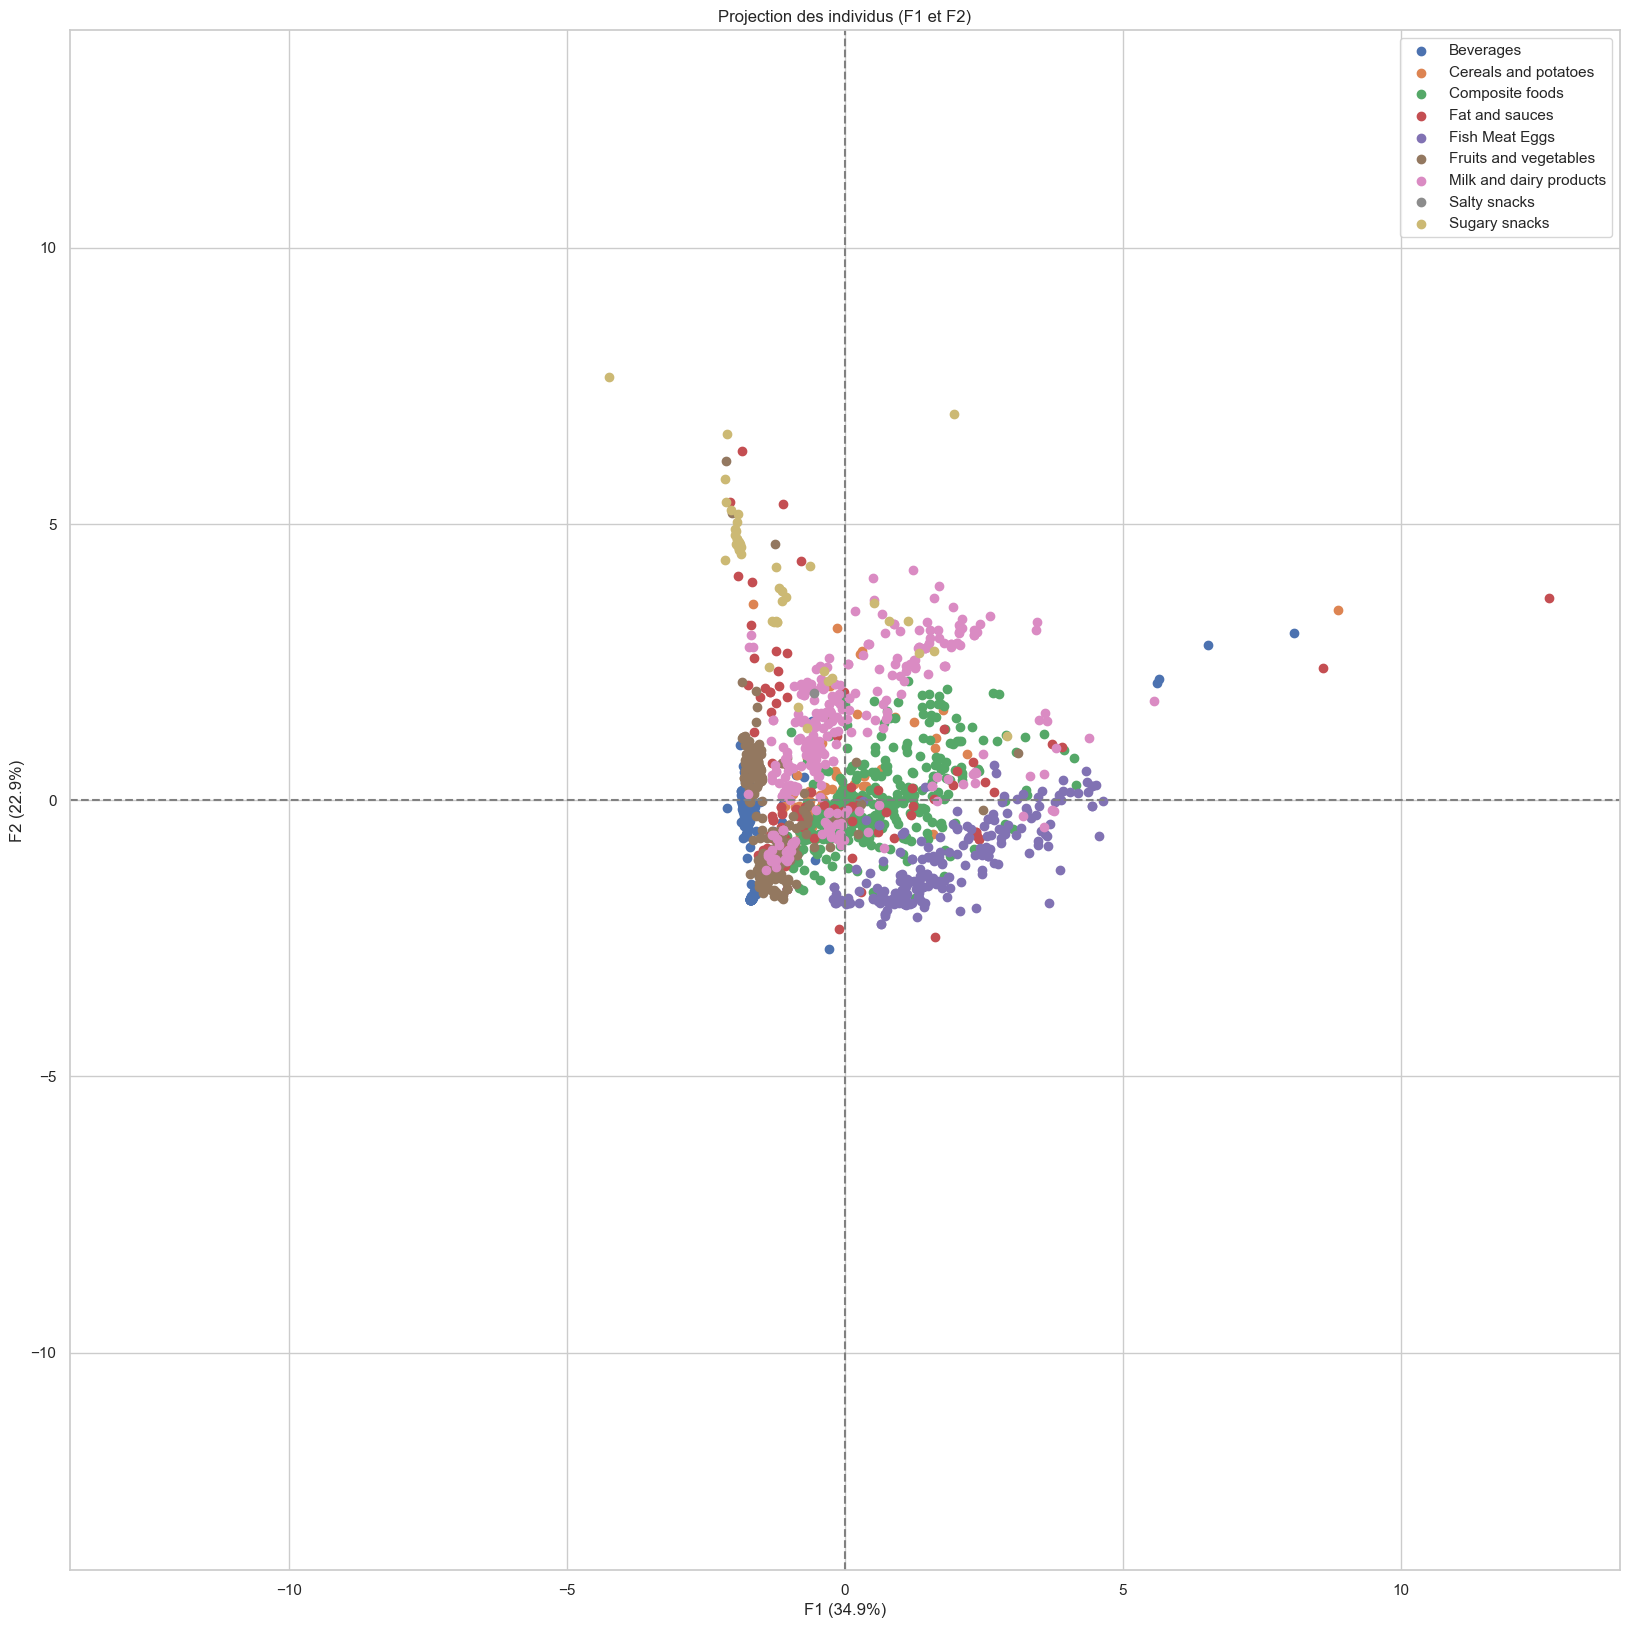

In [102]:
target_var = products_food[pd.isnull(products_food['pnns_groups_1'])==False]
X_reduced = pca.transform(X_scaled)
display_factorial_planes(X_reduced[0:1500], 2, pca, [(0,1)], illustrative_var = target_var['pnns_groups_1'][0:1500])
plt.show()

# Conclusion 

L'exploration approfondie de la variable "pnns_groups_1" a révélé son potentiel pour répondre à la problématique de suggestion de valeurs manquantes. Cette variable, qui classe les aliments en catégories nutritionnelles, affiche une fréquence de valeurs manquantes atteignant près de 20%. Cependant, malgré ce taux élevé de données manquantes, sa structure catégorielle et la variabilité de ses classes en font une option intéressante pour générer des suggestions.

L'analyse univariée a démontré une répartition hétérogène des données dans différentes catégories alimentaires. Les méthodes de traitement des valeurs manquantes ont été appliquées avec succès, permettant de comprendre et de remplir ces lacunes.

Les tests multivariés ont mis en évidence des associations et des corrélations entre cette variable et d'autres caractéristiques nutritionnelles, offrant ainsi une possibilité de prédiction ou de suggestion de valeurs manquantes sur la base de ces relations.

L'Approche de l'Analyse en Composantes Principales (ACP) a été utilisée pour mieux appréhender la structure des données nutritionnelles. La projection des individus dans l'espace ACP a mis en évidence la contribution significative de la variable "pnns_groups_1" dans la variance globale des données. Cela suggère que cette variable est pertinente et impactante dans la représentation des caractéristiques nutritionnelles des produits alimentaires.

In [103]:
composite_foods_values = products_food[products_food['pnns_groups_1'] == 'Composite foods']
composite_foods_values.sample(50)

code                                       product_name  \
3234   3165950217094                               Les Saladières Pasta   
10289  3350033089235                   Velouté poireaux pommes de terre   
5940   3256220133968                              Taboulé à l'Orientale   
2342   3069532301006                            Piperade à la Basquaise   
6183   3256221976885                   Cassoulet - Charcuterie Pur Porc   
16428  8002050038707                              Pizza Royale surgelée   
3890   3222473034055                          4 Mini gratins dauphinois   
5403   3250391535460                                Fusilli Box Fromage   
8913   3274470001486                                 Lasagnes au saumon   
9524   3302741846105                   Petit Salé aux lentilles vertes    
7170   3261055941886  Les Bons Plans! Boulettes de boeuf à l'Orienta...   
4469   3242272256953                         Cremio Box Thon à la crème   
1878   3036811363277  Soupe à la Campagnarde Lentilles et Saucisse f...   
11176  3459343200054                           Lasagnes à la Bolognaise   
13910  3596710413782    Pause Snack Jambon aux herbes, Tomate, Roquette   
2435   3083680573016            Piémontaise au Jambon et Tomate fraîche   
6786   3257981416956  Paëlla Poulet, Chorizo, Fruits de mer, à l'hui...   
603         20534004                      Wrap poulet rôti sauce Caesar   
5652   3251515404006  Les 2 gratins recette savoyarde, fromage à rac...   
4733   3245414145238                  Saucisses aux Lentilles Cuisinées   
7932   3263859849016                           Sauté de volaille et riz   
13325  3596690137043                          Cordon Bleu Double Cheese   
13362  3596710061808                       Taboulé oriental aux raisins   
16550  8055118489348                                      Soupe Toscane   
4367   3229820791791                                   Farce aux olives   
8280   3270160298099                                  Hachis Parmentier   
3575   3188720001662  Saumon Mariné & Purée de Courgette et Pomme de...   
9709   3326120042827                                2 Ficelles Picardes   
10546  3379670011492                 Paëlla (Volaille & Fruits de mer)    
14389  3700009211472                    Duo Ananas et Carotte au Surimi   
8333   3270160503148                              Purée de patate douce   
12167  3560070748938                  Chili con Carne (Au Bœuf) 2 Pers.   
16738  8480017052063      Beignets de Calamars à la Romaine sugelés Dia   
8422   3270160717828  1 galette complète (Œuf, Emmental, Jambon), Su...   
3581   3188720002140                Bœuf charolais & carottes cuisinées   
5546   3250392038205                               Poulet rôti crudités   
8465   3270160754311  4 mini-gratins de légumes Carotte jaune et rou...   
6493   3256224661030                     Paella au Poulet & riz cuisiné   
14982  3760226760023                  Champignons de Paris Ail & Persil   
6956   3257984547503                                   Trio Poulet Rôti   
8716   3270190214403                                 Linguine et poulet   
3085   3153571012341                     6 quenelles lyonnaises brochet   
12027  3560070575855    Tofu à l'indienne riz Basmati et lentilles Bio    
17168  8722700026532  Secrets de Grand-Mère Carottes, poireaux, hari...   
4125   3222475433979  Galettes au blé noir Pommes de Terre Lardons F...   
9538   3302742750029                         Gratin d'endives au jambon   
7413   3263851572318         Colin d'Alaska sauce citron et riz safrané   
14565  3700477609078                 Quinoa cuisiné au poulet et sésame   
9685   3321433008089              Panaché de homard, crabe et langouste   
520         20406691                                 Salade alsacienne    

                                                  brands  \
3234                                           Saupiquet   
10289                                           Monoprix   
5940      